<h1 align=center><font size = 7>Analysis of Emigration & Immigration</font></h1>

<h2 align=center><font size = 6> ITALY</font></h2>

<font size = 5> **Author**: Angelo Di Marco

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination.

The data source is the United Nations dedicated [webpage](https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp) about the monitoring of global population trends, *Population Division* - *International Migration*.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Importing Dataset](#1)<br>
    1.1 [Splitting Dataset into Emigrants and Immigrants](#1.1) <br>
2. [Data Wrangling](#2)<br>
3. [Exploratory Data Analysis](#3) <br>
    3.1 [Pre-Analysis of Selected Countries](#3.1) <br>
4. [Data Modeling: Insights](#4) <br>
    4.1 [Comparison Selected Groups of Countries](#4.1) <br>
    4.2 [Total Emigration and Immigration](#4.2) <br>
    4.2.1 [Top 5 Countries - Sorted by Total](#4.2.1) <br>
    4.2.2 [Top 15 Countries - Sorted by Total](#4.2.2) <br>
    4.2.3 [Top 15 Countries - Sorted by Total and Continent](#4.2.3) <br>
    4.2.4 [Top 15 Countries - Sorted by Total - *Word Clouds*](#4.2.4) <br>
    4.3 [Emigration and Immigration Trends](#4.3) <br>
    4.4 [Choropleth Maps](#4.4) <br>
</div>
<hr>

## Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS

import folium

------------------------

# 1. Importing Dataset<a id="1"></a>

In [3]:
df_italy = pd.read_excel('Italy.xlsx',
                       sheet_name='Italy by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [4]:
df_italy.shape

(386, 43)

In [5]:
df_italy.head()

Type    Coverage       OdName  AREA AreaName   REG          RegName  \
0  Emigrants  Foreigners  Afghanistan   935     Asia  5501    Southern Asia   
1  Emigrants  Foreigners      Albania   908   Europe   925  Southern Europe   
2  Emigrants  Foreigners      Algeria   903   Africa   912  Northern Africa   
3  Emigrants  Foreigners      Andorra   908   Europe   925  Southern Europe   
4  Emigrants  Foreigners       Angola   903   Africa   911    Middle Africa   

   DEV             DevName 1980  ... 2004 2005 2006 2007 2008  2009  2010  \
0  902  Developing regions   ..  ...    1    0    1    0    8    11    13   
1  901   Developed regions   ..  ...  674  929  910  836  925  1110  1495   
2  902  Developing regions   ..  ...  104   82   81   75  127   149   152   
3  901   Developed regions   ..  ...    0    0    2    3    2     3     0   
4  902  Developing regions   ..  ...   12   10   12    4    7     9    35   

   2011  2012  2013  
0    14     8    19  
1  1525  1794  2296  
2   165   140   159  
3     0     2     4  
4     7    11    22  

[5 rows x 43 columns]

In [6]:
df_italy.tail()

Type    Coverage                              OdName  AREA  \
381  Immigrants  Foreigners  Venezuela (Bolivarian Republic of)   904   
382  Immigrants  Foreigners                            Viet Nam   935   
383  Immigrants  Foreigners                               Yemen   935   
384  Immigrants  Foreigners                              Zambia   903   
385  Immigrants  Foreigners                            Zimbabwe   903   

                            AreaName  REG             RegName  DEV  \
381  Latin America and the Caribbean  931       South America  902   
382                             Asia  920  South-Eastern Asia  902   
383                             Asia  922        Western Asia  902   
384                           Africa  910      Eastern Africa  902   
385                           Africa  910      Eastern Africa  902   

                DevName 1980  ... 2004 2005 2006 2007 2008 2009 2010 2011  \
381  Developing regions   ..  ...  828  805  627  790  848  704  802  738   
382  Developing regions   ..  ...   58  136  183  272  326  301  306  230   
383  Developing regions   ..  ...   26   21   24   19   26   26   18   16   
384  Developing regions   ..  ...   19   31   28   11   25   18   17   23   
385  Developing regions   ..  ...   68   19    6   14   30   17   32   11   

    2012 2013  
381  584  528  
382  141  159  
383    8   21  
384   12   15  
385   17   11  

[5 rows x 43 columns]

In [7]:
df_italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      386 non-null    object
 1   Coverage  386 non-null    object
 2   OdName    386 non-null    object
 3   AREA      386 non-null    int64 
 4   AreaName  386 non-null    object
 5   REG       386 non-null    int64 
 6   RegName   386 non-null    object
 7   DEV       386 non-null    int64 
 8   DevName   386 non-null    object
 9   1980      386 non-null    object
 10  1981      386 non-null    object
 11  1982      386 non-null    object
 12  1983      386 non-null    object
 13  1984      386 non-null    object
 14  1985      386 non-null    object
 15  1986      386 non-null    object
 16  1987      386 non-null    object
 17  1988      386 non-null    object
 18  1989      386 non-null    object
 19  1990      386 non-null    object
 20  1991      386 non-null    object
 21  1992      386 no

In [8]:
df_italy.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

------------------

## 1.1 Splitting Dataset into Emigrants and Immigrants<a id="1.1"></a>

In [9]:
df_italy_emigrants = df_italy[df_italy['Type']=='Emigrants']
df_italy_emigrants

Type    Coverage       OdName  AREA AreaName   REG          RegName  \
0    Emigrants  Foreigners  Afghanistan   935     Asia  5501    Southern Asia   
1    Emigrants  Foreigners      Albania   908   Europe   925  Southern Europe   
2    Emigrants  Foreigners      Algeria   903   Africa   912  Northern Africa   
3    Emigrants  Foreigners      Andorra   908   Europe   925  Southern Europe   
4    Emigrants  Foreigners       Angola   903   Africa   911    Middle Africa   
..         ...         ...          ...   ...      ...   ...              ...   
187  Emigrants  Foreigners       Zambia   903   Africa   910   Eastern Africa   
188  Emigrants  Foreigners     Zimbabwe   903   Africa   910   Eastern Africa   
189  Emigrants  Foreigners    Stateless   999    World   999            World   
190  Emigrants  Foreigners      Unknown   999    World   999            World   
191  Emigrants  Foreigners        Total   999    World   999            World   

     DEV             DevName 1980  ...   2004   2005   2006   2007   2008  \
0    902  Developing regions   ..  ...      1      0      1      0      8   
1    901   Developed regions   ..  ...    674    929    910    836    925   
2    902  Developing regions   ..  ...    104     82     81     75    127   
3    901   Developed regions   ..  ...      0      0      2      3      2   
4    902  Developing regions   ..  ...     12     10     12      4      7   
..   ...                 ...  ...  ...    ...    ...    ...    ...    ...   
187  902  Developing regions   ..  ...      8      2      0      7      2   
188  902  Developing regions   ..  ...      7      0      4      0      3   
189  999               World   ..  ...      0      3      4      0      4   
190  999               World   ..  ...    369    321    337      0     25   
191  999               World   ..  ...  64849  65029  75230  65196  80947   

      2009   2010   2011    2012    2013  
0       11     13     14       8      19  
1     1110   1495   1525    1794    2296  
2      149    152    165     140     159  
3        3      0      0       2       4  
4        9     35      7      11      22  
..     ...    ...    ...     ...     ...  
187      2      0      4       0       7  
188      3      0      1       0       1  
189      5      5      4       5       1  
190      1      0    123     352     580  
191  80597  78771  82461  106216  125735  

[192 rows x 43 columns]

In [10]:
df_italy_immigrants = df_italy[df_italy['Type']=='Immigrants']
df_italy_immigrants

Type    Coverage                              OdName  AREA  \
192  Immigrants  Foreigners                         Afghanistan   935   
193  Immigrants  Foreigners                             Albania   908   
194  Immigrants  Foreigners                             Algeria   903   
195  Immigrants  Foreigners                             Andorra   908   
196  Immigrants  Foreigners                              Angola   903   
..          ...         ...                                 ...   ...   
381  Immigrants  Foreigners  Venezuela (Bolivarian Republic of)   904   
382  Immigrants  Foreigners                            Viet Nam   935   
383  Immigrants  Foreigners                               Yemen   935   
384  Immigrants  Foreigners                              Zambia   903   
385  Immigrants  Foreigners                            Zimbabwe   903   

                            AreaName   REG             RegName  DEV  \
192                             Asia  5501       Southern Asia  902   
193                           Europe   925     Southern Europe  901   
194                           Africa   912     Northern Africa  902   
195                           Europe   925     Southern Europe  901   
196                           Africa   911       Middle Africa  902   
..                               ...   ...                 ...  ...   
381  Latin America and the Caribbean   931       South America  902   
382                             Asia   920  South-Eastern Asia  902   
383                             Asia   922        Western Asia  902   
384                           Africa   910      Eastern Africa  902   
385                           Africa   910      Eastern Africa  902   

                DevName 1980  ...   2004   2005   2006   2007   2008   2009  \
192  Developing regions   ..  ...     64    145    171    856   1175   1017   
193   Developed regions   ..  ...  38807  28358  23099  23292  35715  27493   
194  Developing regions   ..  ...   2892   1190    976    920   1376   1132   
195   Developed regions   ..  ...     15      3      5      4     13     13   
196  Developing regions   ..  ...     98     80     76     45     85     83   
..                  ...  ...  ...    ...    ...    ...    ...    ...    ...   
381  Developing regions   ..  ...    828    805    627    790    848    704   
382  Developing regions   ..  ...     58    136    183    272    326    301   
383  Developing regions   ..  ...     26     21     24     19     26     26   
384  Developing regions   ..  ...     19     31     28     11     25     18   
385  Developing regions   ..  ...     68     19      6     14     30     17   

      2010   2011   2012   2013  
192    694    847   1109   1147  
193  22591  16613  14118  12165  
194   1199   1089    944    935  
195      7      3      4      1  
196     78     69     91     64  
..     ...    ...    ...    ...  
381    802    738    584    528  
382    306    230    141    159  
383     18     16      8     21  
384     17     23     12     15  
385     32     11     17     11  

[194 rows x 43 columns]

---------------------

# 2. Data Wrangling<a id="2"></a>

In [11]:
df_italy_emigrants.drop(['Type','Coverage','AREA','REG','DEV'], axis=1, inplace=True)
df_italy_emigrants.head(2)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


OdName AreaName          RegName             DevName 1980 1981 1982  \
0  Afghanistan     Asia    Southern Asia  Developing regions   ..   ..   ..   
1      Albania   Europe  Southern Europe   Developed regions   ..   ..   ..   

  1983 1984 1985  ... 2004 2005 2006 2007 2008  2009  2010  2011  2012  2013  
0   ..   ..   ..  ...    1    0    1    0    8    11    13    14     8    19  
1   ..   ..   ..  ...  674  929  910  836  925  1110  1495  1525  1794  2296  

[2 rows x 38 columns]

In [12]:
df_italy_immigrants.drop(['Type','Coverage','AREA','REG','DEV'], axis=1, inplace=True)
df_italy_immigrants.head(2)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


OdName AreaName          RegName             DevName 1980 1981 1982  \
192  Afghanistan     Asia    Southern Asia  Developing regions   ..   ..   ..   
193      Albania   Europe  Southern Europe   Developed regions   ..   ..   ..   

    1983 1984 1985  ...   2004   2005   2006   2007   2008   2009   2010  \
192   ..   ..   ..  ...     64    145    171    856   1175   1017    694   
193   ..   ..   ..  ...  38807  28358  23099  23292  35715  27493  22591   

      2011   2012   2013  
192    847   1109   1147  
193  16613  14118  12165  

[2 rows x 38 columns]

------------------

In [13]:
years = list(map(int, range(1980, 2014)))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [14]:
df_italy_emigrants.dtypes

OdName      object
AreaName    object
RegName     object
DevName     object
1980        object
1981        object
1982        object
1983        object
1984        object
1985        object
1986        object
1987        object
1988        object
1989        object
1990        object
1991        object
1992        object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

In [15]:
df_italy_emigrants[years]

1980 1981 1982 1983 1984 1985 1986 1987 1988 1989  ...   2004   2005  \
0     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...      1      0   
1     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...    674    929   
2     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...    104     82   
3     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...      0      0   
4     ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     12     10   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
187   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...      8      2   
188   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...      7      0   
189   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...      0      3   
190   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...    369    321   
191   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...  64849  65029   

      2006   2007   2008   2009   2010   2011    2012    2013  
0        1      0      8     11     13     14       8      19  
1      910    836    925   1110   1495   1525    1794    2296  
2       81     75    127    149    152    165     140     159  
3        2      3      2      3      0      0       2       4  
4       12      4      7      9     35      7      11      22  
..     ...    ...    ...    ...    ...    ...     ...     ...  
187      0      7      2      2      0      4       0       7  
188      4      0      3      3      0      1       0       1  
189      4      0      4      5      5      4       5       1  
190    337      0     25      1      0    123     352     580  
191  75230  65196  80947  80597  78771  82461  106216  125735  

[192 rows x 34 columns]

In [16]:
df_italy_emigrants[1981]

0      ..
1      ..
2      ..
3      ..
4      ..
       ..
187    ..
188    ..
189    ..
190    ..
191    ..
Name: 1981, Length: 192, dtype: object

In [17]:
df_italy_emigrants.loc[2, 1981]

'..'

In [18]:
df_italy_emigrants.replace('..', 0, inplace=True)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
df_italy_emigrants.head()

OdName AreaName          RegName             DevName  1980  1981  \
0  Afghanistan     Asia    Southern Asia  Developing regions     0     0   
1      Albania   Europe  Southern Europe   Developed regions     0     0   
2      Algeria   Africa  Northern Africa  Developing regions     0     0   
3      Andorra   Europe  Southern Europe   Developed regions     0     0   
4       Angola   Africa    Middle Africa  Developing regions     0     0   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0     0     0     0     0  ...     1     0     1     0     8    11    13   
1     0     0     0     0  ...   674   929   910   836   925  1110  1495   
2     0     0     0     0  ...   104    82    81    75   127   149   152   
3     0     0     0     0  ...     0     0     2     3     2     3     0   
4     0     0     0     0  ...    12    10    12     4     7     9    35   

   2011  2012  2013  
0    14     8    19  
1  1525  1794  2296  
2   165   140   159  
3     0     2     4  
4     7    11    22  

[5 rows x 38 columns]

In [20]:
df_italy_emigrants[years] = df_italy_emigrants[years].astype("float")

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_italy_emigrants.dtypes

OdName       object
AreaName     object
RegName      object
DevName      object
1980        float64
1981        float64
1982        float64
1983        float64
1984        float64
1985        float64
1986        float64
1987        float64
1988        float64
1989        float64
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
dtype: object

---------------------------

In [22]:
df_italy_immigrants.dtypes

OdName      object
AreaName    object
RegName     object
DevName     object
1980        object
1981        object
1982        object
1983        object
1984        object
1985        object
1986        object
1987        object
1988        object
1989        object
1990        object
1991        object
1992        object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

In [23]:
df_italy_immigrants[years]

1980 1981 1982 1983 1984 1985 1986 1987 1988 1989  ...   2004   2005  \
192   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     64    145   
193   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...  38807  28358   
194   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...   2892   1190   
195   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     15      3   
196   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     98     80   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
381   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...    828    805   
382   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     58    136   
383   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     26     21   
384   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     19     31   
385   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  ...     68     19   

      2006   2007   2008   2009   2010   2011   2012   2013  
192    171    856   1175   1017    694    847   1109   1147  
193  23099  23292  35715  27493  22591  16613  14118  12165  
194    976    920   1376   1132   1199   1089    944    935  
195      5      4     13     13      7      3      4      1  
196     76     45     85     83     78     69     91     64  
..     ...    ...    ...    ...    ...    ...    ...    ...  
381    627    790    848    704    802    738    584    528  
382    183    272    326    301    306    230    141    159  
383     24     19     26     26     18     16      8     21  
384     28     11     25     18     17     23     12     15  
385      6     14     30     17     32     11     17     11  

[194 rows x 34 columns]

In [24]:
df_italy_immigrants.replace('..', 0, inplace=True)

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
df_italy_immigrants.head()

OdName AreaName          RegName             DevName  1980  1981  \
192  Afghanistan     Asia    Southern Asia  Developing regions     0     0   
193      Albania   Europe  Southern Europe   Developed regions     0     0   
194      Algeria   Africa  Northern Africa  Developing regions     0     0   
195      Andorra   Europe  Southern Europe   Developed regions     0     0   
196       Angola   Africa    Middle Africa  Developing regions     0     0   

     1982  1983  1984  1985  ...   2004   2005   2006   2007   2008   2009  \
192     0     0     0     0  ...     64    145    171    856   1175   1017   
193     0     0     0     0  ...  38807  28358  23099  23292  35715  27493   
194     0     0     0     0  ...   2892   1190    976    920   1376   1132   
195     0     0     0     0  ...     15      3      5      4     13     13   
196     0     0     0     0  ...     98     80     76     45     85     83   

      2010   2011   2012   2013  
192    694    847   1109   1147  
193  22591  16613  14118  12165  
194   1199   1089    944    935  
195      7      3      4      1  
196     78     69     91     64  

[5 rows x 38 columns]

In [26]:
df_italy_immigrants[years] = df_italy_immigrants[years].astype("float")

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
df_italy_immigrants.dtypes

OdName       object
AreaName     object
RegName      object
DevName      object
1980        float64
1981        float64
1982        float64
1983        float64
1984        float64
1985        float64
1986        float64
1987        float64
1988        float64
1989        float64
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
dtype: object

---------------------

In [28]:
df_italy_emigrants.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region', 'DevName':'Development'}, inplace=True)
df_italy_emigrants.columns

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index([    'Country',   'Continent',      'Region', 'Development',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013],
      dtype='object')

In [29]:
df_italy_immigrants.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region', 'DevName':'Development'}, inplace=True)
df_italy_immigrants.columns

Index([    'Country',   'Continent',      'Region', 'Development',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013],
      dtype='object')

In [30]:
df_italy_emigrants.columns = list(map(str, df_italy_emigrants.columns))
df_italy_emigrants.columns

Index(['Country', 'Continent', 'Region', 'Development', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [31]:
df_italy_immigrants.columns = list(map(str, df_italy_immigrants.columns))
df_italy_immigrants.columns

Index(['Country', 'Continent', 'Region', 'Development', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [32]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [33]:
df_italy_emigrants.set_index('Country', inplace=True)
df_italy_emigrants.head()

Continent           Region         Development  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions   0.0   0.0   0.0   
Albania        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Algeria        Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Andorra        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Angola         Africa    Middle Africa  Developing regions   0.0   0.0   0.0   

             1983  1984  1985  1986  ...   2004   2005   2006   2007   2008  \
Country                              ...                                      
Afghanistan   0.0   0.0   0.0   0.0  ...    1.0    0.0    1.0    0.0    8.0   
Albania       0.0   0.0   0.0   0.0  ...  674.0  929.0  910.0  836.0  925.0   
Algeria       0.0   0.0   0.0   0.0  ...  104.0   82.0   81.0   75.0  127.0   
Andorra       0.0   0.0   0.0   0.0  ...    0.0    0.0    2.0    3.0    2.0   
Angola        0.0   0.0   0.0   0.0  ...   12.0   10.0   12.0    4.0    7.0   

               2009    2010    2011    2012    2013  
Country                                              
Afghanistan    11.0    13.0    14.0     8.0    19.0  
Albania      1110.0  1495.0  1525.0  1794.0  2296.0  
Algeria       149.0   152.0   165.0   140.0   159.0  
Andorra         3.0     0.0     0.0     2.0     4.0  
Angola          9.0    35.0     7.0    11.0    22.0  

[5 rows x 37 columns]

In [34]:
df_italy_immigrants.set_index('Country', inplace=True)
df_italy_immigrants.head()

Continent           Region         Development  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions   0.0   0.0   0.0   
Albania        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Algeria        Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Andorra        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Angola         Africa    Middle Africa  Developing regions   0.0   0.0   0.0   

             1983  1984  1985  1986  ...     2004     2005     2006     2007  \
Country                              ...                                       
Afghanistan   0.0   0.0   0.0   0.0  ...     64.0    145.0    171.0    856.0   
Albania       0.0   0.0   0.0   0.0  ...  38807.0  28358.0  23099.0  23292.0   
Algeria       0.0   0.0   0.0   0.0  ...   2892.0   1190.0    976.0    920.0   
Andorra       0.0   0.0   0.0   0.0  ...     15.0      3.0      5.0      4.0   
Angola        0.0   0.0   0.0   0.0  ...     98.0     80.0     76.0     45.0   

                2008     2009     2010     2011     2012     2013  
Country                                                            
Afghanistan   1175.0   1017.0    694.0    847.0   1109.0   1147.0  
Albania      35715.0  27493.0  22591.0  16613.0  14118.0  12165.0  
Algeria       1376.0   1132.0   1199.0   1089.0    944.0    935.0  
Andorra         13.0     13.0      7.0      3.0      4.0      1.0  
Angola          85.0     83.0     78.0     69.0     91.0     64.0  

[5 rows x 37 columns]

In [35]:
df_italy_emigrants['Total'] = df_italy_emigrants.sum(axis=1)
df_italy_emigrants.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region         Development  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions   0.0   0.0   0.0   
Albania        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Algeria        Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Andorra        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Angola         Africa    Middle Africa  Developing regions   0.0   0.0   0.0   

             1983  1984  1985  1986  ...   2005   2006   2007   2008    2009  \
Country                              ...                                       
Afghanistan   0.0   0.0   0.0   0.0  ...    0.0    1.0    0.0    8.0    11.0   
Albania       0.0   0.0   0.0   0.0  ...  929.0  910.0  836.0  925.0  1110.0   
Algeria       0.0   0.0   0.0   0.0  ...   82.0   81.0   75.0  127.0   149.0   
Andorra       0.0   0.0   0.0   0.0  ...    0.0    2.0    3.0    2.0     3.0   
Angola        0.0   0.0   0.0   0.0  ...   10.0   12.0    4.0    7.0     9.0   

               2010    2011    2012    2013    Total  
Country                                               
Afghanistan    13.0    14.0     8.0    19.0     87.0  
Albania      1495.0  1525.0  1794.0  2296.0  15395.0  
Algeria       152.0   165.0   140.0   159.0   1448.0  
Andorra         0.0     0.0     2.0     4.0     16.0  
Angola         35.0     7.0    11.0    22.0    186.0  

[5 rows x 38 columns]

In [36]:
df_italy_emigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [37]:
df_italy_emigrants.index.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China (including Hong Kong Special Administrative Region)',
 'China, Taiwan Province of China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'G

In [38]:
df_italy_immigrants['Total'] = df_italy_immigrants.sum(axis=1)
df_italy_immigrants.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region         Development  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions   0.0   0.0   0.0   
Albania        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Algeria        Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Andorra        Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Angola         Africa    Middle Africa  Developing regions   0.0   0.0   0.0   

             1983  1984  1985  1986  ...     2005     2006     2007     2008  \
Country                              ...                                       
Afghanistan   0.0   0.0   0.0   0.0  ...    145.0    171.0    856.0   1175.0   
Albania       0.0   0.0   0.0   0.0  ...  28358.0  23099.0  23292.0  35715.0   
Algeria       0.0   0.0   0.0   0.0  ...   1190.0    976.0    920.0   1376.0   
Andorra       0.0   0.0   0.0   0.0  ...      3.0      5.0      4.0     13.0   
Angola        0.0   0.0   0.0   0.0  ...     80.0     76.0     45.0     85.0   

                2009     2010     2011     2012     2013     Total  
Country                                                             
Afghanistan   1017.0    694.0    847.0   1109.0   1147.0    7555.0  
Albania      27493.0  22591.0  16613.0  14118.0  12165.0  435426.0  
Algeria       1132.0   1199.0   1089.0    944.0    935.0   20082.0  
Andorra         13.0      7.0      3.0      4.0      1.0      97.0  
Angola          83.0     78.0     69.0     91.0     64.0    1301.0  

[5 rows x 38 columns]

In [39]:
df_italy_immigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [40]:
df_italy_immigrants.index.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemal

---------------
---------------

# 3. Exploratory Data Analysis<a id="3"></a>

In [41]:
df_italy_emigrants.describe()

1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
count  192.0  192.0  192.0  192.0  192.0  192.0  192.0  192.0  192.0  192.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...          2005          2006         2007          2008  \
count  ...    192.000000    192.000000    192.00000    192.000000   
mean   ...    677.385417    783.645833    679.12500    843.197917   
std    ...   5859.100202   6843.113970   5696.63792   7016.926432   
min    ...      0.000000      0.000000      0.00000      0.000000   
25%    ...      1.000000      1.000000      0.00000      1.000000   
50%    ...      9.500000      8.500000      8.00000      9.000000   
75%    ...     80.500000     78.000000     76.50000     96.000000   
max    ...  65029.000000  75230.000000  65196.00000  80947.000000   

               2009          2010          2011           2012           2013  \
count    192.000000    192.000000    192.000000     192.000000     192.000000   
mean     839.552083    820.531250    858.968750    1106.416667    1309.739583   
std     6792.015783   6578.200233   6956.505492    9089.457022   10823.749126   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%        1.000000      1.000000      1.000000       1.000000       2.000000   
50%       11.000000     11.000000     11.500000      15.000000      14.500000   
75%      115.250000    102.000000    114.500000     123.500000     143.500000   
max    80597.000000  78771.000000  82461.000000  106216.000000  125735.000000   

              Total  
count  1.920000e+02  
mean   1.582316e+04  
std    1.374394e+05  
min    1.000000e+00  
25%    2.000000e+01  
50%    1.545000e+02  
75%    1.406000e+03  
max    1.519023e+06  

[8 rows x 35 columns]

In [42]:
df_italy_immigrants.describe()

1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
count  194.0  194.0  194.0  194.0  194.0  194.0  194.0  194.0  194.0  194.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...          2005          2006           2007           2008  \
count  ...    194.000000    194.000000     194.000000     194.000000   
mean   ...   1650.118557   1506.113402    2876.046392    2753.365979   
std    ...   5586.469827   5108.541575   19913.015983   13563.159538   
min    ...      0.000000      0.000000       0.000000       0.000000   
25%    ...      7.250000      9.000000       9.000000      13.250000   
50%    ...     87.500000    102.500000     107.500000     136.000000   
75%    ...    578.750000    550.000000     732.250000     851.000000   
max    ...  45338.000000  43052.000000  271443.000000  174554.000000   

                2009          2010          2011          2012          2013  \
count     194.000000    194.000000    194.000000    194.000000    194.000000   
mean     2282.778351   2364.891753   1973.469072   1794.474227   1573.149485   
std      8954.104191   8359.983427   7591.135557   6819.989820   5352.478886   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%        13.500000     12.250000     11.000000     10.250000     15.000000   
50%       117.500000    140.000000    128.000000    153.000000    123.000000   
75%       887.750000    823.000000    736.000000    739.250000    696.750000   
max    105597.000000  92116.000000  90096.000000  81666.000000  58227.000000   

              Total  
count  1.940000e+02  
mean   3.072571e+04  
std    1.185131e+05  
min    2.000000e+00  
25%    2.322500e+02  
50%    1.789000e+03  
75%    1.131150e+04  
max    1.172278e+06  

[8 rows x 35 columns]

In [43]:
df_italy_emigrants[years[0:13]].describe()

1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
count  192.0  192.0  192.0  192.0  192.0  192.0  192.0  192.0  192.0  192.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

        1990          1991          1992  
count  192.0    192.000000    192.000000  
mean     0.0    573.812500    564.822917  
std      0.0   5425.662955   5318.796007  
min      0.0      0.000000      0.000000  
25%      0.0      0.000000      0.000000  
50%      0.0      0.000000      0.000000  
75%      0.0      0.000000      0.000000  
max      0.0  55086.000000  54223.000000

In [44]:
df_italy_immigrants[years[0:13]].describe()

1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
count  194.0  194.0  194.0  194.0  194.0  194.0  194.0  194.0  194.0  194.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

        1990          1991          1992  
count  194.0    194.000000    194.000000  
mean     0.0    439.164948    402.180412  
std      0.0   4096.571628   3974.825503  
min      0.0      0.000000      0.000000  
25%      0.0      0.000000      0.000000  
50%      0.0      0.000000      0.000000  
75%      0.0      0.000000      0.000000  
max      0.0  56004.000000  54849.000000

In [45]:
df_italy_emigrants[['2001']].describe()

2001
count    192.000000
mean     584.135417
std     5298.927869
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max    56077.000000

In [46]:
df_italy_immigrants[['2001']].describe()

2001
count    194.000000
mean     182.556701
std     2542.720615
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max    35416.000000

--------------

In [47]:
df_italy_emigrants['Development'].value_counts().to_frame()

Development
Developing regions          139
Developed regions            50
World                         3

In [48]:
df_italy_immigrants['Development'].value_counts().to_frame()

Development
Developing regions          145
Developed regions            49

In [49]:
df_italy_emigrants['Development']

Country
Afghanistan    Developing regions
Albania         Developed regions
Algeria        Developing regions
Andorra         Developed regions
Angola         Developing regions
                      ...        
Zambia         Developing regions
Zimbabwe       Developing regions
Stateless                   World
Unknown                     World
Total                       World
Name: Development, Length: 192, dtype: object

In [50]:
df_italy_emigrants['Continent'].value_counts().to_frame()

Continent
Africa                                  51
Asia                                    49
Europe                                  44
Latin America and the Caribbean         33
Oceania                                  9
Northern America                         3
World                                    3

In [51]:
df_italy_immigrants['Continent'].value_counts().to_frame()

Continent
Africa                                  53
Asia                                    48
Europe                                  44
Latin America and the Caribbean         33
Oceania                                 14
Northern America                         2

In [52]:
df_italy_emigrants['Continent']

Country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
                ...  
Zambia         Africa
Zimbabwe       Africa
Stateless       World
Unknown         World
Total           World
Name: Continent, Length: 192, dtype: object

In [53]:
df_italy_emigrants['Region'].value_counts().to_frame()

Region
Western Asia                   18
Eastern Africa                 17
Western Africa                 16
Southern Europe                15
Caribbean                      13
South America                  12
South-Eastern Asia             11
Northern Europe                10
Eastern Europe                 10
Southern Asia                   9
Middle Africa                   9
Western Europe                  9
Central America                 8
Eastern Asia                    6
Northern Africa                 6
Central Asia                    5
World                           3
Northern America                3
Southern Africa                 3
Melanesia                       3
Polynesia                       3
Australia and New Zealand       2
Micronesia                      1

In [54]:
df_italy_immigrants['Region'].value_counts().to_frame()

Region
Western Asia                   18
Eastern Africa                 17
Western Africa                 16
Southern Europe                15
Caribbean                      13
South America                  12
South-Eastern Asia             11
Northern Europe                10
Eastern Europe                 10
Southern Asia                   9
Middle Africa                   9
Western Europe                  9
Central America                 8
Northern Africa                 6
Central Asia                    5
Eastern Asia                    5
Micronesia                      5
Southern Africa                 5
Melanesia                       4
Polynesia                       3
Australia and New Zealand       2
Northern America                2

------------------

## 3.1 Pre-Analysis of Selected Countries<a id="3.1"></a>

----------------------

### France

In [55]:
france_e = df_italy_emigrants.loc['France', years]
france_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: France, dtype: object

In [56]:
france_i = df_italy_immigrants.loc['France', years]
france_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: France, dtype: object

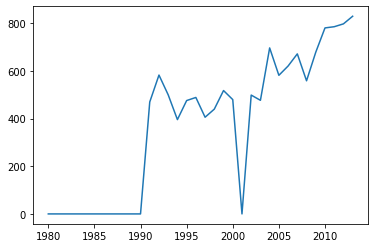

In [57]:
france_e.plot()

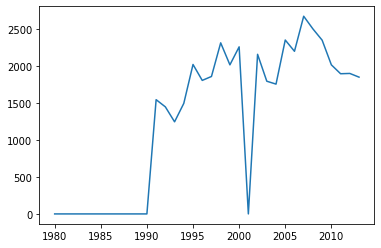

In [58]:
france_i.plot()

In [59]:
france_netvalue = france_i - france_e

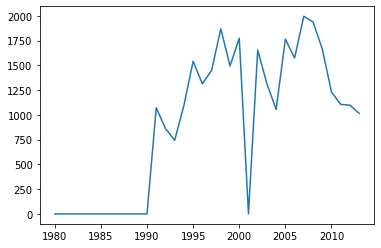

In [60]:
france_netvalue.plot()

--------------------

In [61]:
france_e_new = df_italy_emigrants.loc['France', years[11:]]
france_e_new.head()

1991    470
1992    583
1993    500
1994    396
1995    476
Name: France, dtype: object

In [62]:
france_i_new = df_italy_immigrants.loc['France', years[11:]]
france_i_new.head()

1991    1542
1992    1445
1993    1243
1994    1492
1995    2017
Name: France, dtype: object

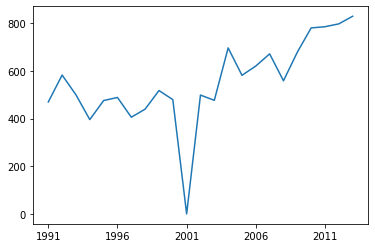

In [63]:
france_e_new.plot()

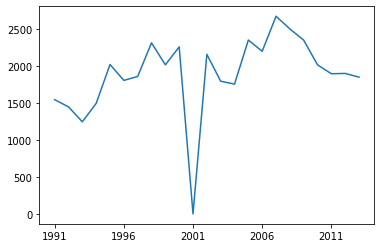

In [64]:
france_i_new.plot()

In [65]:
france_netvalue_new = france_i_new - france_e_new

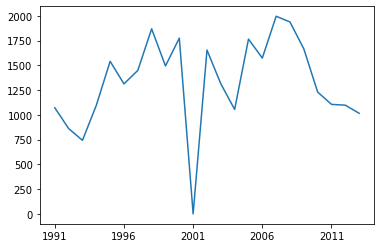

In [66]:
france_netvalue_new.plot()

----------------------

### Germany

In [67]:
germany_e = df_italy_emigrants.loc['Germany', years]
germany_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Germany, dtype: object

In [68]:
germany_i = df_italy_immigrants.loc['Germany', years]
germany_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Germany, dtype: object

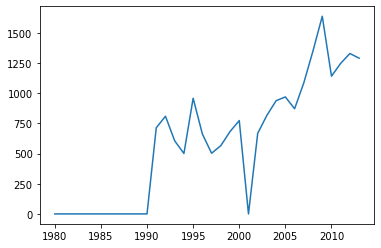

In [69]:
germany_e.plot()

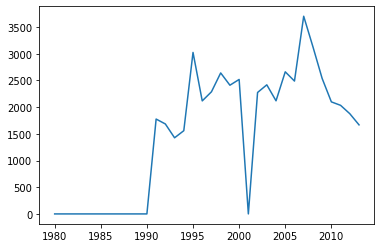

In [70]:
germany_i.plot()

In [71]:
germany_netvalue = germany_i - germany_e

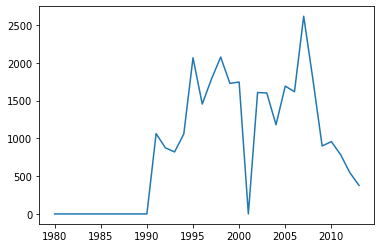

In [72]:
germany_netvalue.plot()

----------------------

### Algeria

In [73]:
algeria_e = df_italy_emigrants.loc['Algeria', years]
algeria_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Algeria, dtype: object

In [74]:
algeria_i = df_italy_immigrants.loc['Algeria', years]
algeria_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Algeria, dtype: object

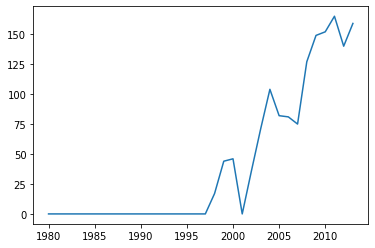

In [75]:
algeria_e.plot()

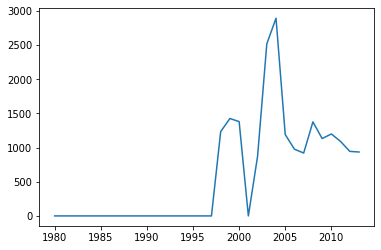

In [76]:
algeria_i.plot()

In [77]:
algeria_netvalue = algeria_i - algeria_e

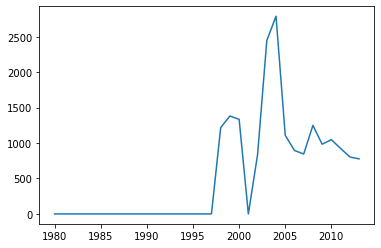

In [78]:
algeria_netvalue.plot()

----------------------

### Belgium

In [79]:
belgium_e = df_italy_emigrants.loc['Belgium', years]
belgium_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Belgium, dtype: object

In [80]:
belgium_i = df_italy_immigrants.loc['Belgium', years]
belgium_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Belgium, dtype: object

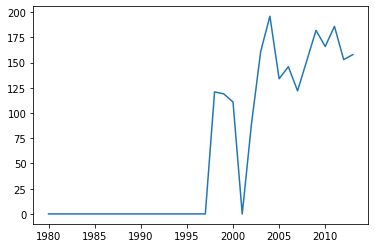

In [81]:
belgium_e.plot()

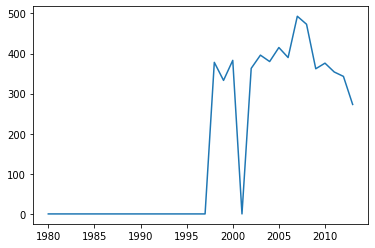

In [82]:
belgium_i.plot()

In [83]:
belgium_netvalue = belgium_i - belgium_e

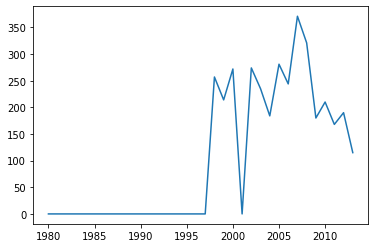

In [84]:
belgium_netvalue.plot()

----------------------

### United Kingdom

In [85]:
UK_e = df_italy_emigrants.loc['United Kingdom of Great Britain and Northern Ireland', years]
UK_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

In [86]:
UK_i = df_italy_immigrants.loc['United Kingdom of Great Britain and Northern Ireland', years]
UK_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

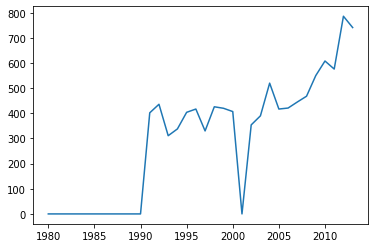

In [87]:
UK_e.plot()

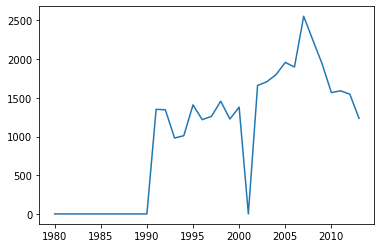

In [88]:
UK_i.plot()

In [89]:
UK_netvalue = UK_i - UK_e

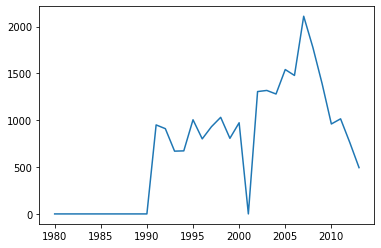

In [90]:
UK_netvalue.plot()

In [91]:
UK_e_new = df_italy_emigrants.loc['United Kingdom of Great Britain and Northern Ireland', years[11:]]
UK_e_new.head()

1991    402
1992    436
1993    311
1994    338
1995    404
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

In [92]:
UK_i_new = df_italy_immigrants.loc['United Kingdom of Great Britain and Northern Ireland', years[11:]]
UK_i_new.head()

1991    1352
1992    1346
1993     981
1994    1011
1995    1409
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

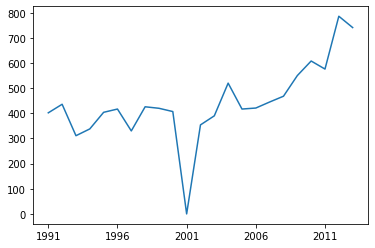

In [93]:
UK_e_new.plot()

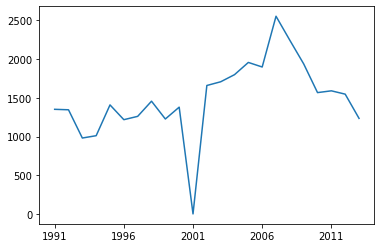

In [94]:
UK_i_new.plot()

In [95]:
UK_netvalue_new = UK_i_new - UK_e_new

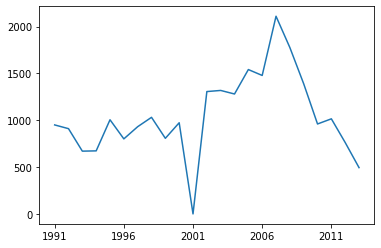

In [96]:
UK_netvalue_new.plot()

----------------------

### Sweden

In [97]:
sweden_e = df_italy_emigrants.loc['Sweden', years]
sweden_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Sweden, dtype: object

In [98]:
sweden_i = df_italy_immigrants.loc['Sweden', years]
sweden_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: Sweden, dtype: object

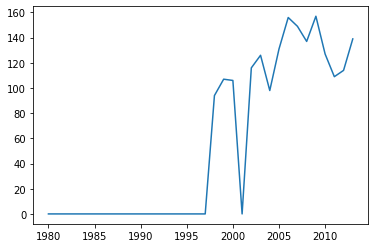

In [99]:
sweden_e.plot()

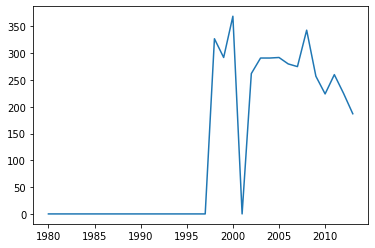

In [100]:
sweden_i.plot()

In [101]:
sweden_e_new = df_italy_emigrants.loc['Sweden', years[18:]]
sweden_e_new.head()

1998     94
1999    107
2000    106
2001      0
2002    116
Name: Sweden, dtype: object

In [102]:
sweden_i_new = df_italy_immigrants.loc['Sweden', years[18:]]
sweden_i_new.head()

1998    327
1999    292
2000    369
2001      0
2002    262
Name: Sweden, dtype: object

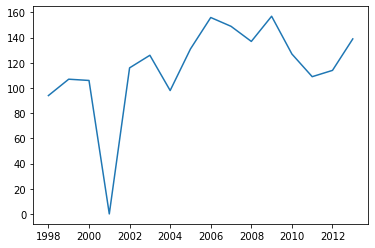

In [103]:
sweden_e_new.plot()

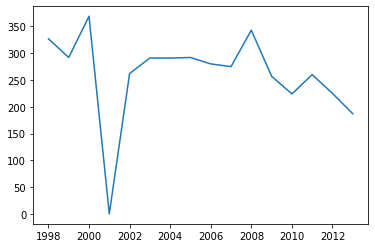

In [104]:
sweden_i_new.plot()

----------------------

### China

In [105]:
china_e = df_italy_emigrants.loc['China (including Hong Kong Special Administrative Region)', years]
china_e.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: China (including Hong Kong Special Administrative Region), dtype: object

In [106]:
china_i = df_italy_immigrants.loc['China', years]
china_i.head()

1980    0
1981    0
1982    0
1983    0
1984    0
Name: China, dtype: object

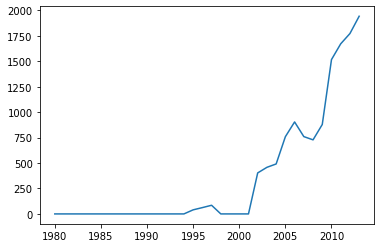

In [107]:
china_e.plot()

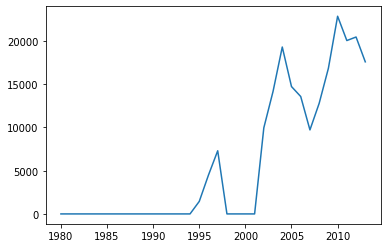

In [108]:
china_i.plot()

In [109]:
china_e_new = df_italy_emigrants.loc['China (including Hong Kong Special Administrative Region)', years[15:]]
china_e_new.head()

1995    40
1996    62
1997    85
1998     0
1999     0
Name: China (including Hong Kong Special Administrative Region), dtype: object

In [110]:
china_i_new = df_italy_immigrants.loc['China', years[15:]]
china_i_new.head()

1995    1448
1996    4500
1997    7305
1998       0
1999       0
Name: China, dtype: object

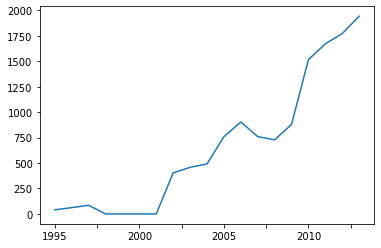

In [111]:
china_e_new.plot()

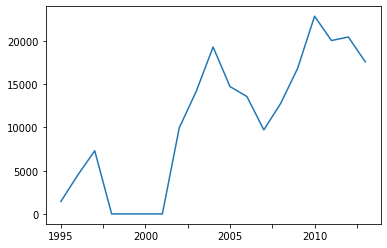

In [112]:
china_i_new.plot()

------------------------

# 4. Data Modeling - Insights<a id="4"></a>

## 4.1 Comparison Selected Groups of Countries<a id="4.1"></a>

### Denmark, Norway, Sweden, Finland

In [113]:
df_DNS_e = df_italy_emigrants.loc[['Denmark','Norway','Sweden','Finland'], years[18:]].transpose()
df_DNS_e.head()

Country  Denmark  Norway  Sweden  Finland
1998        71.0    22.0    94.0     54.0
1999        46.0    11.0   107.0     63.0
2000        52.0    14.0   106.0     64.0
2001         0.0     0.0     0.0      0.0
2002        50.0    40.0   116.0     49.0

In [114]:
df_DNS_i = df_italy_immigrants.loc[['Denmark','Norway','Sweden','Finland'], years[18:]].transpose()
df_DNS_i.head()

Country  Denmark  Norway  Sweden  Finland
1998       176.0    53.0   327.0    192.0
1999       157.0    77.0   292.0    191.0
2000       223.0    98.0   369.0    215.0
2001         0.0     0.0     0.0      0.0
2002       168.0    78.0   262.0    127.0

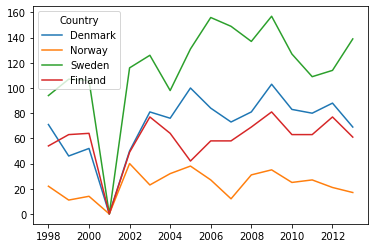

In [115]:
df_DNS_e.plot()

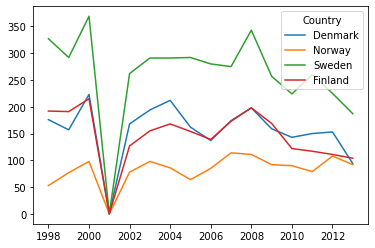

In [116]:
df_DNS_i.plot()

---------------------

### France, Germany, UK, Spain

In [117]:
df_FGUK_e = df_italy_emigrants.loc[['France','Germany','United Kingdom of Great Britain and Northern Ireland','Spain'], years[11:]].transpose()
df_FGUK_e.head()

Country  France  Germany  \
1991      470.0    714.0   
1992      583.0    810.0   
1993      500.0    606.0   
1994      396.0    501.0   
1995      476.0    959.0   

Country  United Kingdom of Great Britain and Northern Ireland  Spain  
1991                                                 402.0       0.0  
1992                                                 436.0       0.0  
1993                                                 311.0       0.0  
1994                                                 338.0       0.0  
1995                                                 404.0       0.0

In [118]:
df_FGUK_i = df_italy_immigrants.loc[['France','Germany','United Kingdom of Great Britain and Northern Ireland','Spain'], years[11:]].transpose()
df_FGUK_i.head()

Country  France  Germany  \
1991     1542.0   1777.0   
1992     1445.0   1685.0   
1993     1243.0   1426.0   
1994     1492.0   1559.0   
1995     2017.0   3025.0   

Country  United Kingdom of Great Britain and Northern Ireland  Spain  
1991                                                1352.0       0.0  
1992                                                1346.0       0.0  
1993                                                 981.0       0.0  
1994                                                1011.0       0.0  
1995                                                1409.0       0.0

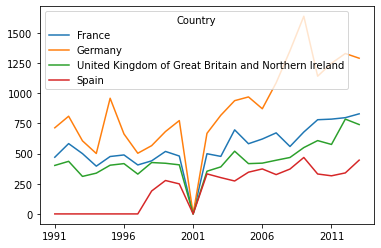

In [119]:
df_FGUK_e.plot()

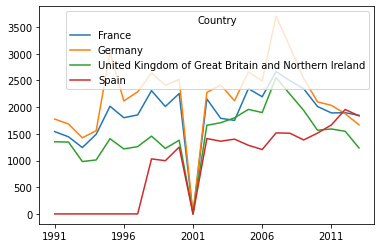

In [120]:
df_FGUK_i.plot()

---------------------

### Morocco, Algeria, Tunisia, Libya

In [121]:
df_north_africa_e = df_italy_emigrants.loc[['Morocco','Algeria','Tunisia','Libya','Egypt'], years[11:]].transpose()
df_north_africa_e.head()

Country  Morocco  Algeria  Tunisia  Libya  Egypt
1991       177.0      0.0    105.0    0.0   50.0
1992       193.0      0.0    116.0    0.0   56.0
1993       455.0      0.0    202.0    0.0   58.0
1994       299.0      0.0    106.0    0.0   63.0
1995       351.0      0.0    205.0    0.0  184.0

In [122]:
df_north_africa_i = df_italy_immigrants.loc[['Morocco','Algeria','Tunisia','Libya','Egypt'], years[11:]].transpose()
df_north_africa_i.head()

Country  Morocco  Algeria  Tunisia  Libya   Egypt
1991      9612.0      0.0   5121.0    0.0  1745.0
1992      6657.0      0.0   3160.0    0.0  1660.0
1993      5231.0      0.0   1543.0    0.0   856.0
1994      4575.0      0.0   1133.0    0.0   821.0
1995      4937.0      0.0   1146.0    0.0   740.0

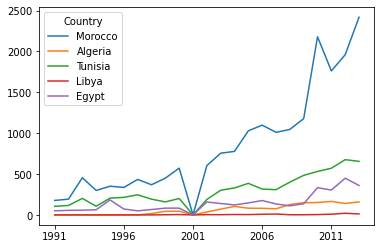

In [123]:
df_north_africa_e.plot()

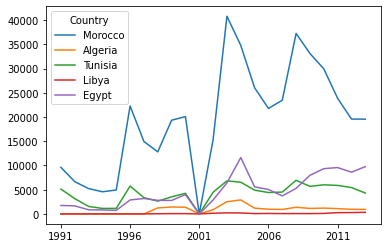

In [124]:
df_north_africa_i.plot()

----------------------

### Belgium, Nederlands, Portugal, Ireland

In [125]:
df_BNPI_e = df_italy_emigrants.loc[['Belgium','Netherlands','Portugal','Ireland'], years[18:]].transpose()
df_BNPI_e.head()

Country  Belgium  Netherlands  Portugal  Ireland
1998       121.0        176.0      95.0     36.0
1999       119.0        173.0     138.0     33.0
2000       111.0        172.0     111.0     29.0
2001         0.0          0.0       0.0      0.0
2002        89.0        171.0      99.0     38.0

In [126]:
df_BNPI_i = df_italy_immigrants.loc[['Belgium','Netherlands','Portugal','Ireland'], years[18:]].transpose()
df_BNPI_i.head()

Country  Belgium  Netherlands  Portugal  Ireland
1998       378.0        518.0     347.0    157.0
1999       333.0        472.0     285.0    147.0
2000       383.0        498.0     328.0    139.0
2001         0.0          0.0       0.0      0.0
2002       363.0        488.0     297.0    189.0

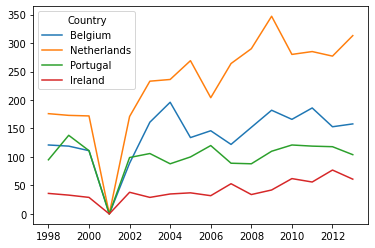

In [127]:
df_BNPI_e.plot()

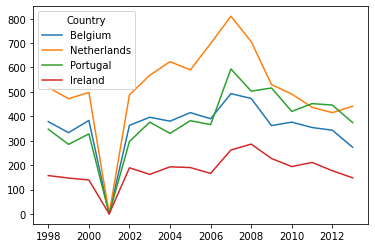

In [128]:
df_BNPI_i.plot()

----------------------

### China, India, Pakistan, Bangladesh

In [129]:
df_CIPB_e = df_italy_emigrants.loc[['China (including Hong Kong Special Administrative Region)','India','Pakistan','Bangladesh'], years[15:]].transpose()
df_CIPB_e.head()

Country  China (including Hong Kong Special Administrative Region)  India  \
1995                                                  40.0           44.0   
1996                                                  62.0          112.0   
1997                                                  85.0           61.0   
1998                                                   0.0           71.0   
1999                                                   0.0          127.0   

Country  Pakistan  Bangladesh  
1995         19.0         8.0  
1996         20.0         9.0  
1997         35.0        11.0  
1998         43.0        32.0  
1999         85.0        48.0

In [130]:
df_CIPB_i = df_italy_immigrants.loc[['China','India','Pakistan','Bangladesh'], years[15:]].transpose()
df_CIPB_i.head()

Country   China   India  Pakistan  Bangladesh
1995     1448.0   869.0     328.0       343.0
1996     4500.0  2756.0    1409.0      1573.0
1997     7305.0  3150.0    2140.0      2709.0
1998        0.0  3082.0    1896.0      1815.0
1999        0.0  3521.0    2276.0      1988.0

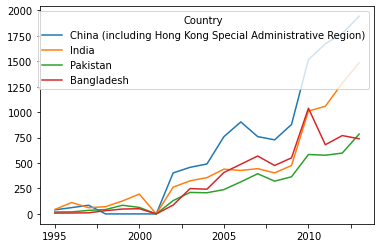

In [131]:
df_CIPB_e.plot()

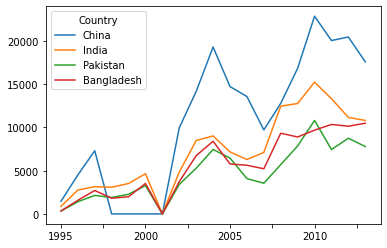

In [132]:
df_CIPB_i.plot()

----------------------

### USA, Canada, Australia

In [133]:
df_north_america_e = df_italy_emigrants.loc[['United States of America','Canada','Australia'], years[11:]].transpose()
df_north_america_e.head()

Country  United States of America  Canada  Australia
1991                        463.0   116.0        0.0
1992                        534.0   107.0        0.0
1993                        571.0    95.0        0.0
1994                        483.0    89.0        0.0
1995                        500.0    85.0        0.0

In [134]:
df_north_america_i = df_italy_immigrants.loc[['United States of America','Canada','Australia'], years[11:]].transpose()
df_north_america_i.head()

Country  United States of America  Canada  Australia
1991                       1427.0   367.0        0.0
1992                       1455.0   324.0        0.0
1993                        943.0   212.0        0.0
1994                        892.0   185.0        0.0
1995                        990.0   201.0        0.0

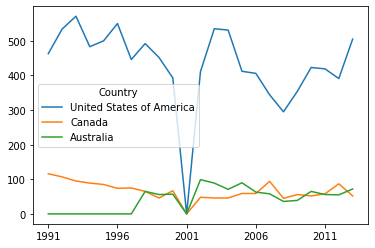

In [135]:
df_north_america_e.plot()

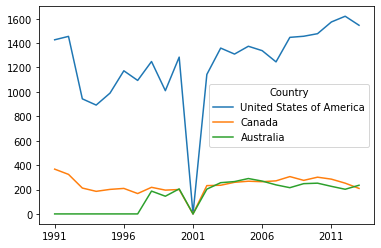

In [136]:
df_north_america_i.plot()

----------------------

### Brasil, Argentina, Chile

In [137]:
df_south_america_e = df_italy_emigrants.loc[['Brazil','Argentina','Chile'], years[11:]].transpose()
df_south_america_e.head()

Country  Brazil  Argentina  Chile
1991      133.0      167.0    0.0
1992      130.0      207.0    0.0
1993      120.0      206.0    0.0
1994      135.0      223.0    0.0
1995      207.0      268.0    0.0

In [138]:
df_south_america_i = df_italy_immigrants.loc[['Brazil','Argentina','Chile'], years[11:]].transpose()
df_south_america_i.head()

Country  Brazil  Argentina  Chile
1991     1465.0     2261.0    0.0
1992     1568.0     1551.0    0.0
1993     1489.0      596.0    0.0
1994     1475.0      419.0    0.0
1995     2223.0      834.0    0.0

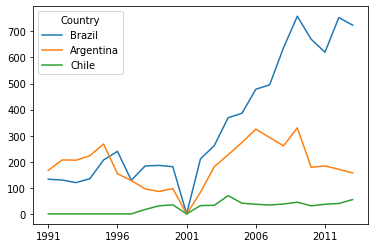

In [139]:
df_south_america_e.plot()

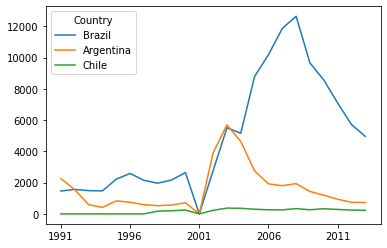

In [140]:
df_south_america_i.plot()

----------------------

### Mexico, Colombia, Venezuela

In [141]:
df_central_america_e = df_italy_emigrants.loc[['Mexico','Colombia','Venezuela (Bolivarian Republic of)','Chile'], years[11:]].transpose()
df_central_america_e.head()

Country  Mexico  Colombia  Venezuela (Bolivarian Republic of)  Chile
1991        0.0       0.0                                64.0    0.0
1992        0.0       0.0                                70.0    0.0
1993        0.0       0.0                                54.0    0.0
1994        0.0       0.0                                56.0    0.0
1995        0.0       0.0                                75.0    0.0

In [142]:
df_central_america_i = df_italy_immigrants.loc[['Mexico','Colombia','Venezuela (Bolivarian Republic of)','Chile'], years[11:]].transpose()
df_central_america_i.head()

Country  Mexico  Colombia  Venezuela (Bolivarian Republic of)  Chile
1991        0.0       0.0                               469.0    0.0
1992        0.0       0.0                               388.0    0.0
1993        0.0       0.0                               209.0    0.0
1994        0.0       0.0                               239.0    0.0
1995        0.0       0.0                               280.0    0.0

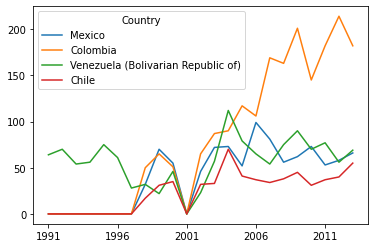

In [143]:
df_central_america_e.plot()

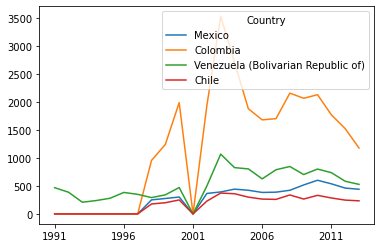

In [144]:
df_central_america_i.plot()

----------------------

### Syria, Lebanon, Israel, Jordan

In [145]:
df_middle_east_e = df_italy_emigrants.loc[['Syrian Arab Republic','Lebanon','Israel','Jordan'], years[18:]].transpose()
df_middle_east_e.head()

Country  Syrian Arab Republic  Lebanon  Israel  Jordan
1998                      7.0     33.0    34.0    13.0
1999                     10.0     32.0    21.0    10.0
2000                     15.0     25.0    42.0    16.0
2001                      0.0      0.0     0.0     0.0
2002                     25.0      9.0    38.0     4.0

In [146]:
df_middle_east_i = df_italy_immigrants.loc[['Syrian Arab Republic','Lebanon','Israel','Jordan'], years[18:]].transpose()
df_middle_east_i.head()

Country  Syrian Arab Republic  Lebanon  Israel  Jordan
1998                    117.0    155.0   152.0   125.0
1999                    179.0    170.0   128.0   160.0
2000                    218.0    188.0   151.0   192.0
2001                      0.0      0.0     0.0     0.0
2002                    173.0    200.0   155.0   111.0

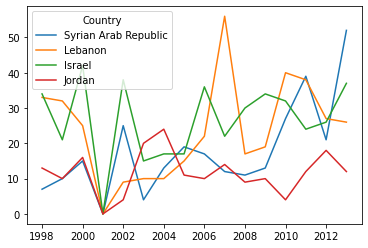

In [147]:
df_middle_east_e.plot()

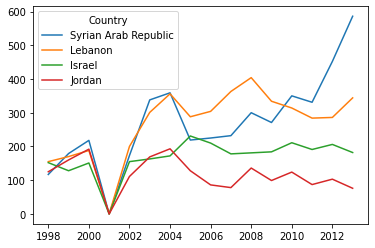

In [148]:
df_middle_east_i.plot()

----------------------

### Romania, Ukraine, Poland

In [149]:
df_east_europe_e = df_italy_emigrants.loc[['Romania','Ukraine', 'Poland'], years[15:]].transpose()
df_east_europe_e.head()

Country  Romania  Ukraine  Poland
1995        71.0      8.0   110.0
1996        87.0      5.0   108.0
1997       109.0      1.0   100.0
1998       119.0      8.0   129.0
1999       142.0      8.0   145.0

In [150]:
df_east_europe_i = df_italy_immigrants.loc[['Romania','Ukraine', 'Poland'], years[15:]].transpose()
df_east_europe_i.head()

Country  Romania  Ukraine  Poland
1995      2321.0    161.0  1381.0
1996      6701.0    430.0  3262.0
1997      6755.0    436.0  3783.0
1998      6818.0    741.0  2738.0
1999     10651.0   1401.0  2906.0

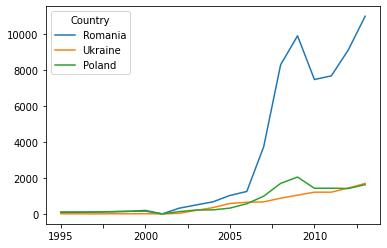

In [151]:
df_east_europe_e.plot()

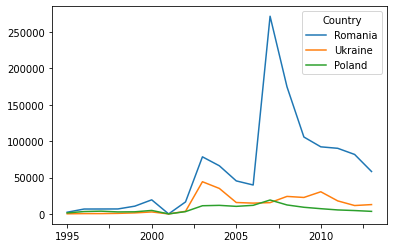

In [152]:
df_east_europe_i.plot()

--------------------

## 4.2 Total Emigration and Immigration<a id="4.2"></a>

### 4.2.1 Top 5 Countries - Sorted by Total<a id="4.2.1"></a>

In [153]:
df_italy_emigrants.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5_e = df_italy_emigrants.head(8)
df_top5_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Total       World            World               World   0.0   0.0   0.0   
Italy      Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Romania    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Germany    Europe   Western Europe   Developed regions   0.0   0.0   0.0   
Morocco    Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Unknown     World            World               World   0.0   0.0   0.0   
Albania    Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Poland     Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006     2007     2008  \
Country                          ...                                       
Total     0.0   0.0   0.0   0.0  ...  65029.0  75230.0  65196.0  80947.0   
Italy     0.0   0.0   0.0   0.0  ...  49078.0  58256.0  44880.0  53924.0   
Romania   0.0   0.0   0.0   0.0  ...   1028.0   1251.0   3742.0   8308.0   
Germany   0.0   0.0   0.0   0.0  ...    970.0    872.0   1087.0   1353.0   
Morocco   0.0   0.0   0.0   0.0  ...   1029.0   1098.0   1010.0   1046.0   
Unknown   0.0   0.0   0.0   0.0  ...    321.0    337.0      0.0     25.0   
Albania   0.0   0.0   0.0   0.0  ...    929.0    910.0    836.0    925.0   
Poland    0.0   0.0   0.0   0.0  ...    323.0    567.0    988.0   1700.0   

            2009     2010     2011      2012      2013      Total  
Country                                                            
Total    80597.0  78771.0  82461.0  106216.0  125735.0  1519023.0  
Italy    48327.0  45954.0  50057.0   67998.0   82095.0  1158473.0  
Romania   9924.0   7488.0   7693.0    9131.0   11014.0    61792.0  
Germany   1639.0   1142.0   1249.0    1330.0    1291.0    20137.0  
Morocco   1178.0   2179.0   1761.0    1960.0    2418.0    19450.0  
Unknown      1.0      0.0    123.0     352.0     580.0    15697.0  
Albania   1110.0   1495.0   1525.0    1794.0    2296.0    15395.0  
Poland    2053.0   1429.0   1433.0    1417.0    1628.0    12854.0  

[8 rows x 38 columns]

In [154]:
df_top5_e.drop(['Total','Italy','Unknown'], axis=0, inplace=True)
df_top5_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Romania    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Germany    Europe   Western Europe   Developed regions   0.0   0.0   0.0   
Morocco    Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Albania    Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Poland     Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...    2005    2006    2007    2008    2009  \
Country                          ...                                           
Romania   0.0   0.0   0.0   0.0  ...  1028.0  1251.0  3742.0  8308.0  9924.0   
Germany   0.0   0.0   0.0   0.0  ...   970.0   872.0  1087.0  1353.0  1639.0   
Morocco   0.0   0.0   0.0   0.0  ...  1029.0  1098.0  1010.0  1046.0  1178.0   
Albania   0.0   0.0   0.0   0.0  ...   929.0   910.0   836.0   925.0  1110.0   
Poland    0.0   0.0   0.0   0.0  ...   323.0   567.0   988.0  1700.0  2053.0   

           2010    2011    2012     2013    Total  
Country                                            
Romania  7488.0  7693.0  9131.0  11014.0  61792.0  
Germany  1142.0  1249.0  1330.0   1291.0  20137.0  
Morocco  2179.0  1761.0  1960.0   2418.0  19450.0  
Albania  1495.0  1525.0  1794.0   2296.0  15395.0  
Poland   1429.0  1433.0  1417.0   1628.0  12854.0  

[5 rows x 38 columns]

In [155]:
df_italy_immigrants.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5_i = df_italy_immigrants.head(6)
df_top5_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Romania    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Italy      Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Morocco    Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Albania    Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Ukraine    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
China        Asia     Eastern Asia  Developing regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006      2007      2008  \
Country                          ...                                         
Romania   0.0   0.0   0.0   0.0  ...  45338.0  39715.0  271443.0  174554.0   
Italy     0.0   0.0   0.0   0.0  ...  42893.0  43052.0   42818.0   38163.0   
Morocco   0.0   0.0   0.0   0.0  ...  26057.0  21784.0   23483.0   37275.0   
Albania   0.0   0.0   0.0   0.0  ...  28358.0  23099.0   23292.0   35715.0   
Ukraine   0.0   0.0   0.0   0.0  ...  15675.0  14821.0   15487.0   24039.0   
China     0.0   0.0   0.0   0.0  ...  14732.0  13579.0    9719.0   12791.0   

             2009     2010     2011     2012     2013      Total  
Country                                                           
Romania  105597.0  92116.0  90096.0  81666.0  58227.0  1172278.0  
Italy     36215.0  34357.0  31466.0  29467.0  28433.0   909461.0  
Morocco   33128.0  29960.0  23885.0  19590.0  19568.0   446187.0  
Albania   27493.0  22591.0  16613.0  14118.0  12165.0   435426.0  
Ukraine   22594.0  30416.0  17889.0  11510.0  12814.0   253865.0  
China     16843.0  22866.0  20055.0  20463.0  17592.0   205332.0  

[6 rows x 38 columns]

In [156]:
df_top5_i.drop(['Italy'], axis=0, inplace=True)
df_top5_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Romania    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Morocco    Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Albania    Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Ukraine    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
China        Asia     Eastern Asia  Developing regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006      2007      2008  \
Country                          ...                                         
Romania   0.0   0.0   0.0   0.0  ...  45338.0  39715.0  271443.0  174554.0   
Morocco   0.0   0.0   0.0   0.0  ...  26057.0  21784.0   23483.0   37275.0   
Albania   0.0   0.0   0.0   0.0  ...  28358.0  23099.0   23292.0   35715.0   
Ukraine   0.0   0.0   0.0   0.0  ...  15675.0  14821.0   15487.0   24039.0   
China     0.0   0.0   0.0   0.0  ...  14732.0  13579.0    9719.0   12791.0   

             2009     2010     2011     2012     2013      Total  
Country                                                           
Romania  105597.0  92116.0  90096.0  81666.0  58227.0  1172278.0  
Morocco   33128.0  29960.0  23885.0  19590.0  19568.0   446187.0  
Albania   27493.0  22591.0  16613.0  14118.0  12165.0   435426.0  
Ukraine   22594.0  30416.0  17889.0  11510.0  12814.0   253865.0  
China     16843.0  22866.0  20055.0  20463.0  17592.0   205332.0  

[5 rows x 38 columns]

In [157]:
df_top5_e = df_top5_e[years].transpose()
df_top5_e.head()

Country  Romania  Germany  Morocco  Albania  Poland
1980         0.0      0.0      0.0      0.0     0.0
1981         0.0      0.0      0.0      0.0     0.0
1982         0.0      0.0      0.0      0.0     0.0
1983         0.0      0.0      0.0      0.0     0.0
1984         0.0      0.0      0.0      0.0     0.0

In [158]:
df_top5_i = df_top5_i[years].transpose()
df_top5_i.head()

Country  Romania  Morocco  Albania  Ukraine  China
1980         0.0      0.0      0.0      0.0    0.0
1981         0.0      0.0      0.0      0.0    0.0
1982         0.0      0.0      0.0      0.0    0.0
1983         0.0      0.0      0.0      0.0    0.0
1984         0.0      0.0      0.0      0.0    0.0

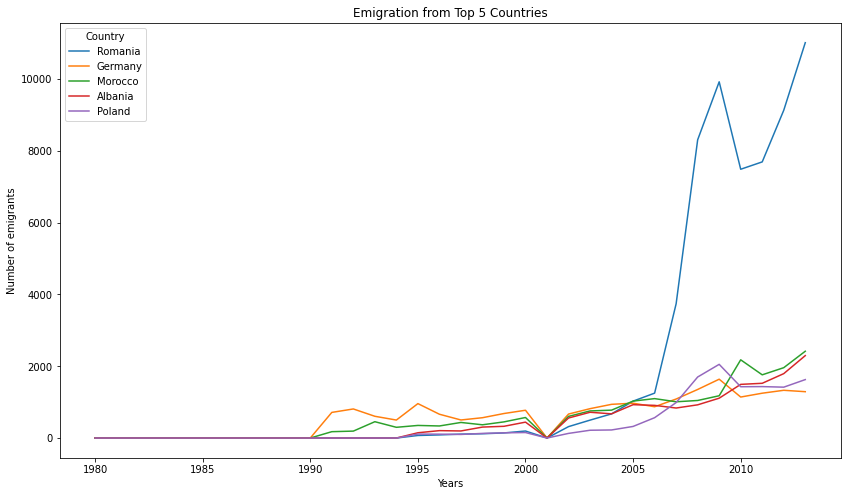

In [159]:
df_top5_e.plot(kind='line', figsize=(14, 8))

plt.title('Emigration from Top 5 Countries')
plt.ylabel('Number of emigrants')
plt.xlabel('Years')

plt.show()

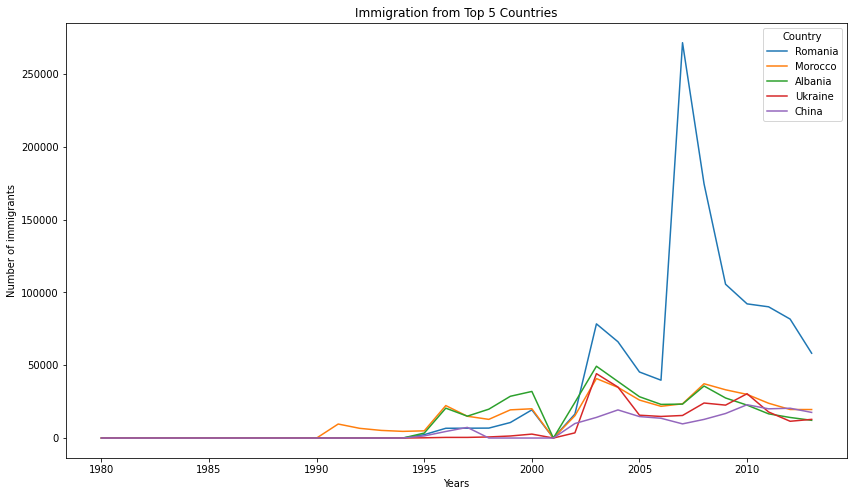

In [160]:
df_top5_i.plot(kind='line', figsize=(14, 8))

plt.title('Immigration from Top 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

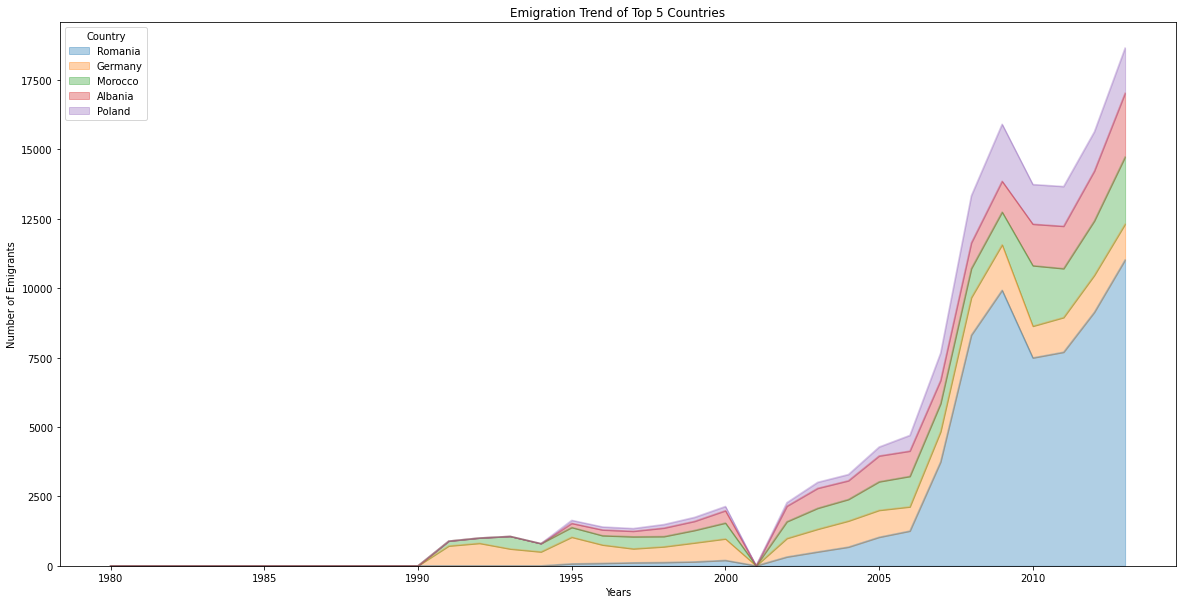

In [161]:
df_top5_e.index = df_top5_e.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_e.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Emigration Trend of Top 5 Countries')
plt.ylabel('Number of Emigrants')
plt.xlabel('Years')

plt.show()

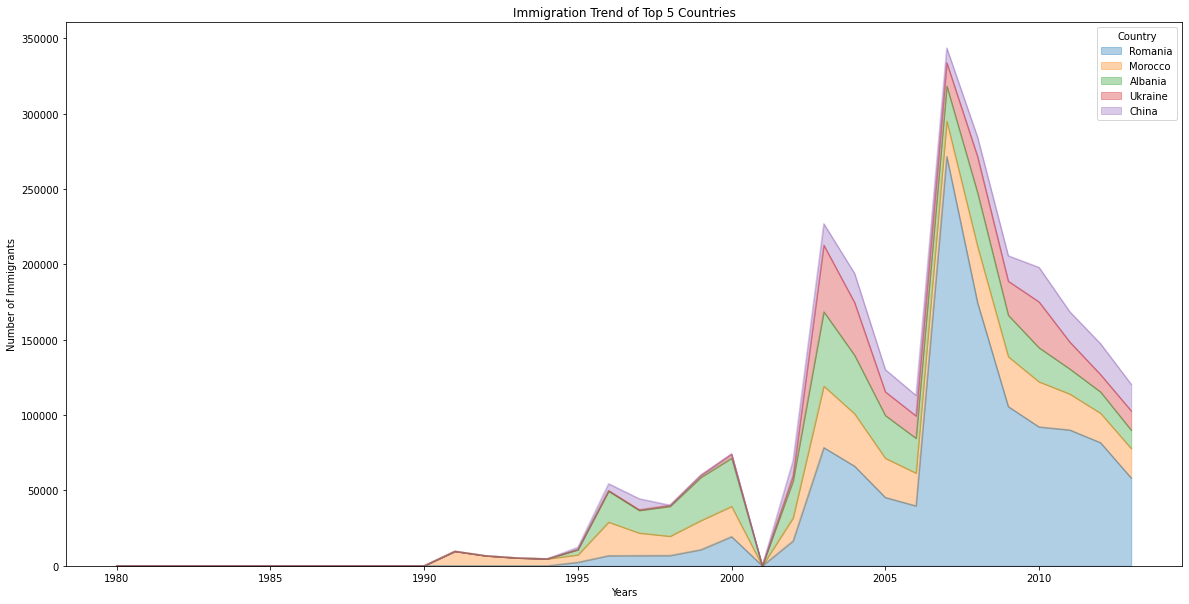

In [162]:
df_top5_i.index = df_top5_i.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_i.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

---------------

In [163]:
df_top5_e.drop(['Romania'], axis=1, inplace=True)
df_top5_no_Romania_e = df_top5_e
df_top5_no_Romania_e.head()

Country  Germany  Morocco  Albania  Poland
1980         0.0      0.0      0.0     0.0
1981         0.0      0.0      0.0     0.0
1982         0.0      0.0      0.0     0.0
1983         0.0      0.0      0.0     0.0
1984         0.0      0.0      0.0     0.0

In [164]:
df_top5_i.drop(['Romania'], axis=1, inplace=True)
df_top5_no_Romania_i = df_top5_i
df_top5_no_Romania_i.head()

Country  Morocco  Albania  Ukraine  China
1980         0.0      0.0      0.0    0.0
1981         0.0      0.0      0.0    0.0
1982         0.0      0.0      0.0    0.0
1983         0.0      0.0      0.0    0.0
1984         0.0      0.0      0.0    0.0

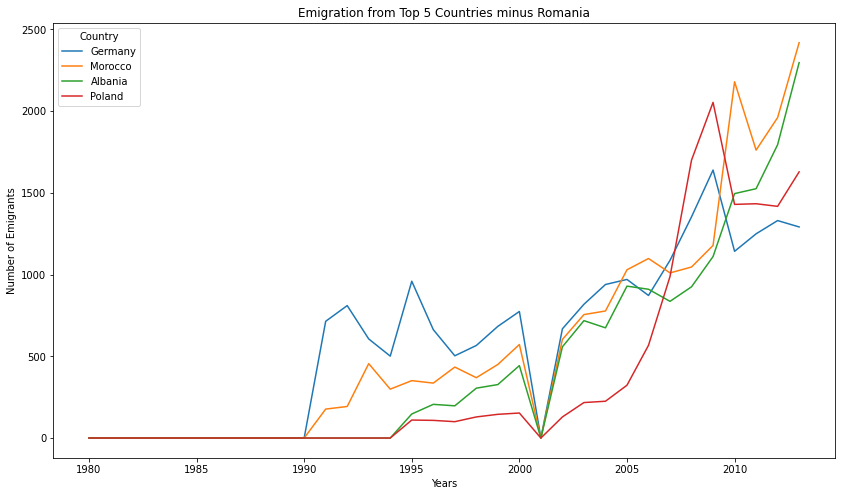

In [165]:
df_top5_no_Romania_e.plot(kind='line', figsize=(14, 8))

plt.title('Emigration from Top 5 Countries minus Romania')
plt.ylabel('Number of Emigrants')
plt.xlabel('Years')

plt.show()

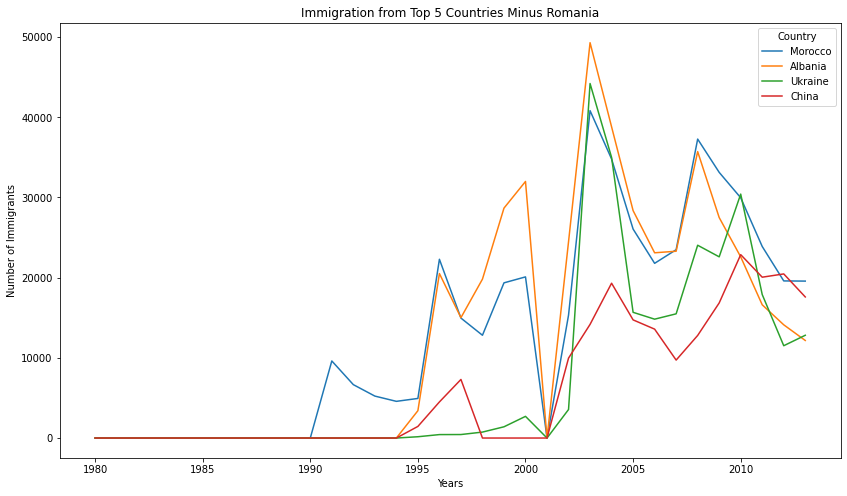

In [166]:
df_top5_no_Romania_i.plot(kind='line', figsize=(14, 8))

plt.title('Immigration from Top 5 Countries Minus Romania')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

---------------------

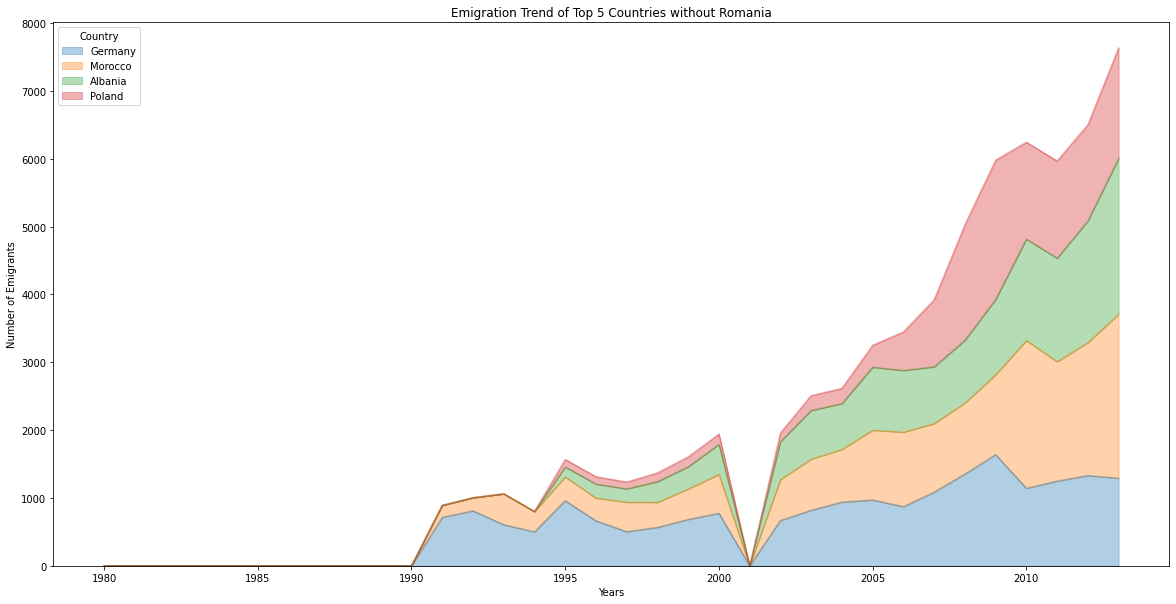

In [167]:
df_top5_no_Romania_e.index = df_top5_no_Romania_e.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_no_Romania_e.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Emigration Trend of Top 5 Countries without Romania')
plt.ylabel('Number of Emigrants')
plt.xlabel('Years')

plt.show()

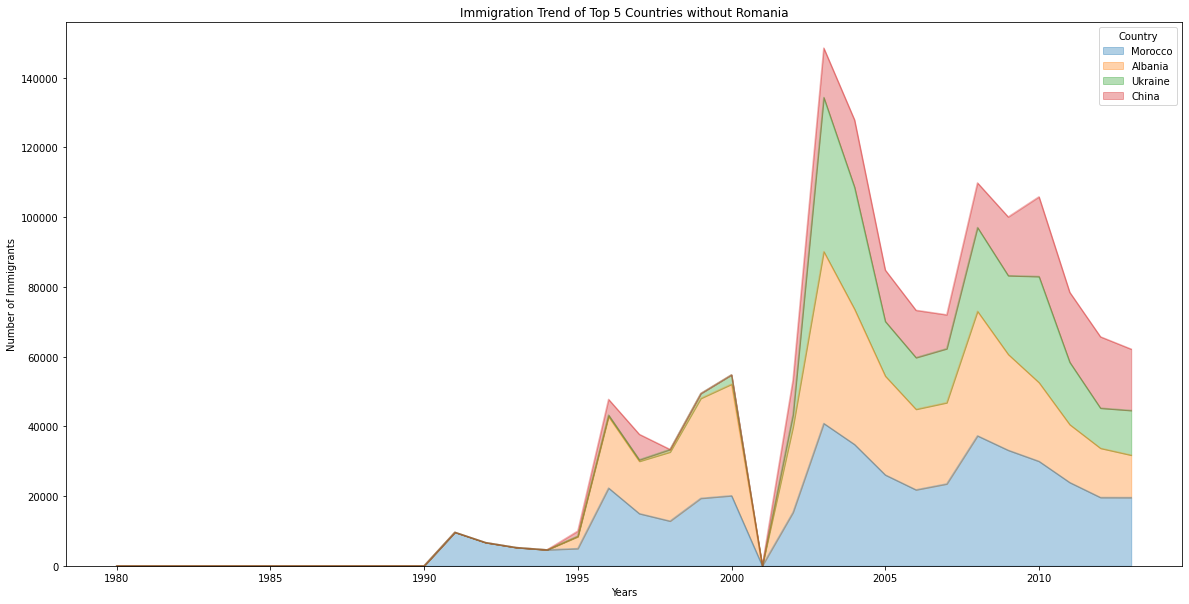

In [168]:
df_top5_no_Romania_i.index = df_top5_no_Romania_i.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5_no_Romania_i.plot(kind='area', 
             stacked=True,
             alpha=0.35,
             figsize=(20, 10),
             )

plt.title('Immigration Trend of Top 5 Countries without Romania')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

---------------

### 4.2.2 Top 15 Countries - Sorted by Total<a id="4.2.2"></a>

In [169]:
df_top15_e = df_italy_emigrants.head(18)
df_top15_e

Continent  \
Country                                                                               
Total                                                                         World   
Italy                                                                        Europe   
Romania                                                                      Europe   
Germany                                                                      Europe   
Morocco                                                                      Africa   
Unknown                                                                       World   
Albania                                                                      Europe   
Poland                                                                       Europe   
France                                                                       Europe   
China (including Hong Kong Special Administrati...                             Asia   
United Kingdom of Great Britain and Northern Ir...                           Europe   
Ukraine                                                                      Europe   
United States of America                                           Northern America   
India                                                                          Asia   
Brazil                                              Latin America and the Caribbean   
Tunisia                                                                      Africa   
Bangladesh                                                                     Asia   
Republic of Moldova                                                          Europe   

                                                              Region  \
Country                                                                
Total                                                          World   
Italy                                                Southern Europe   
Romania                                               Eastern Europe   
Germany                                               Western Europe   
Morocco                                              Northern Africa   
Unknown                                                        World   
Albania                                              Southern Europe   
Poland                                                Eastern Europe   
France                                                Western Europe   
China (including Hong Kong Special Administrati...      Eastern Asia   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
Ukraine                                               Eastern Europe   
United States of America                            Northern America   
India                                                  Southern Asia   
Brazil                                                 South America   
Tunisia                                              Northern Africa   
Bangladesh                                             Southern Asia   
Republic of Moldova                                   Eastern Europe   

                                                           Development  1980  \
Country                                                                        
Total                                                            World   0.0   
Italy                                                Developed regions   0.0   
Romania                                              Developed regions   0.0   
Germany                                              Developed regions   0.0   
Morocco                                             Developing regions   0.0   
Unknown                                                          World   0.0   
Albania                                              Developed regions   0.0   
Poland                                               Developed regions   0.0   
France                                               Developed regions   0.0   
China (inclu

In [170]:
df_top15_e.drop(['Total','Italy','Unknown'], axis=0, inplace=True)
df_top15_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent  \
Country                                                                               
Romania                                                                      Europe   
Germany                                                                      Europe   
Morocco                                                                      Africa   
Albania                                                                      Europe   
Poland                                                                       Europe   
France                                                                       Europe   
China (including Hong Kong Special Administrati...                             Asia   
United Kingdom of Great Britain and Northern Ir...                           Europe   
Ukraine                                                                      Europe   
United States of America                                           Northern America   
India                                                                          Asia   
Brazil                                              Latin America and the Caribbean   
Tunisia                                                                      Africa   
Bangladesh                                                                     Asia   
Republic of Moldova                                                          Europe   

                                                              Region  \
Country                                                                
Romania                                               Eastern Europe   
Germany                                               Western Europe   
Morocco                                              Northern Africa   
Albania                                              Southern Europe   
Poland                                                Eastern Europe   
France                                                Western Europe   
China (including Hong Kong Special Administrati...      Eastern Asia   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
Ukraine                                               Eastern Europe   
United States of America                            Northern America   
India                                                  Southern Asia   
Brazil                                                 South America   
Tunisia                                              Northern Africa   
Bangladesh                                             Southern Asia   
Republic of Moldova                                   Eastern Europe   

                                                           Development  1980  \
Country                                                                        
Romania                                              Developed regions   0.0   
Germany                                              Developed regions   0.0   
Morocco                                             Developing regions   0.0   
Albania                                              Developed regions   0.0   
Poland                                               Developed regions   0.0   
France                                               Developed regions   0.0   
China (including Hong Kong Special Administrati...  Developing regions   0.0   
United Kingdom of Great Britain and Northern Ir...   Developed regions   0.0   
Ukraine                                              Developed regions   0.0   
United States of America                             Developed regions   0.0   
India                                               Developing regions   0.0   
Brazil                                              Developing regions   0.0   
Tunisia                                             Developing regions   0.0   
Bangladesh                                          Developing regions   0.0   
Republic of Moldova                                  Developed regions   0.0   

        

---------------------

In [171]:
df_top15_i = df_italy_immigrants.head(16)
df_top15_i

Continent              Region  \
Country                                                                    
Romania                                       Europe      Eastern Europe   
Italy                                         Europe     Southern Europe   
Morocco                                       Africa     Northern Africa   
Albania                                       Europe     Southern Europe   
Ukraine                                       Europe      Eastern Europe   
China                                           Asia        Eastern Asia   
Republic of Moldova                           Europe      Eastern Europe   
India                                           Asia       Southern Asia   
Poland                                        Europe      Eastern Europe   
Philippines                                     Asia  South-Eastern Asia   
Brazil               Latin America and the Caribbean       South America   
Peru                 Latin America and the Caribbean       South America   
Egypt                                         Africa     Northern Africa   
Bangladesh                                      Asia       Southern Asia   
Tunisia                                       Africa     Northern Africa   
Ecuador              Latin America and the Caribbean       South America   

                            Development  1980  1981  1982  1983  1984  1985  \
Country                                                                       
Romania               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Italy                 Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Morocco              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Albania               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ukraine               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
China                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Republic of Moldova   Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
India                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Poland                Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Philippines          Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil               Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                 Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Egypt                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Bangladesh           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Tunisia              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   

                     1986  ...     2005     2006      2007      2008  \
Country                    ...                                         
Romania               0.0  ...  45338.0  39715.0  271443.0  174554.0   
Italy                 0.0  ...  42893.0  43052.0   42818.0   38163.0   
Morocco               0.0  ...  26057.0  21784.0   23483.0   37275.0   
Albania               0.0  ...  28358.0  23099.0   23292.0   35715.0   
Ukraine               0.0  ...  15675.0  14821.0   15487.0   24039.0   
China                 0.0  ...  14732.0  13579.0    9719.0   12791.0   
Republic of Moldova   0.0  ...   9311.0   7795.0   12989.0   22007.0   
India                 0.0  ...   7172.0   6292.0    7112.0   12469.0   
Poland                0.0  ...  10385.0  11791.0   19101.0   12314.0   
Philippines           0.0  ...   5546.0   4428.0    3951.0    7849.0   
Brazil                0.0  ...   8796.0  10183.0   11863.0   12645.0   
Peru                  0.0  ...   5402.0   4879.0    4451.0    7182.0   
Egypt                 0.0  ...   5584.0   5041.0    3726.0    5274.0   
Bangladesh            0.0  ...   5781.0   5631.0    5223.0    9332.0   
Tunisia               0.0  ...   4915.0   4414.0    4512.0    6947.0   
Ecuador               0.0  

In [172]:
df_top15_i.drop(['Italy'], axis=0, inplace=True)
df_top15_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent              Region  \
Country                                                                    
Romania                                       Europe      Eastern Europe   
Morocco                                       Africa     Northern Africa   
Albania                                       Europe     Southern Europe   
Ukraine                                       Europe      Eastern Europe   
China                                           Asia        Eastern Asia   
Republic of Moldova                           Europe      Eastern Europe   
India                                           Asia       Southern Asia   
Poland                                        Europe      Eastern Europe   
Philippines                                     Asia  South-Eastern Asia   
Brazil               Latin America and the Caribbean       South America   
Peru                 Latin America and the Caribbean       South America   
Egypt                                         Africa     Northern Africa   
Bangladesh                                      Asia       Southern Asia   
Tunisia                                       Africa     Northern Africa   
Ecuador              Latin America and the Caribbean       South America   

                            Development  1980  1981  1982  1983  1984  1985  \
Country                                                                       
Romania               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Morocco              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Albania               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ukraine               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
China                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Republic of Moldova   Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
India                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Poland                Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Philippines          Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil               Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                 Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Egypt                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Bangladesh           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Tunisia              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   

                     1986  ...     2005     2006      2007      2008  \
Country                    ...                                         
Romania               0.0  ...  45338.0  39715.0  271443.0  174554.0   
Morocco               0.0  ...  26057.0  21784.0   23483.0   37275.0   
Albania               0.0  ...  28358.0  23099.0   23292.0   35715.0   
Ukraine               0.0  ...  15675.0  14821.0   15487.0   24039.0   
China                 0.0  ...  14732.0  13579.0    9719.0   12791.0   
Republic of Moldova   0.0  ...   9311.0   7795.0   12989.0   22007.0   
India                 0.0  ...   7172.0   6292.0    7112.0   12469.0   
Poland                0.0  ...  10385.0  11791.0   19101.0   12314.0   
Philippines           0.0  ...   5546.0   4428.0    3951.0    7849.0   
Brazil                0.0  ...   8796.0  10183.0   11863.0   12645.0   
Peru                  0.0  ...   5402.0   4879.0    4451.0    7182.0   
Egypt                 0.0  ...   5584.0   5041.0    3726.0    5274.0   
Bangladesh            0.0  ...   5781.0   5631.0    5223.0    9332.0   
Tunisia               0.0  ...   4915.0   4414.0    4512.0    6947.0   
Ecuador               0.0  ...   8278.0   6047.0    4414.0    6874.0   

                         2009     2010     2011     2012     2013      Total  
Country                                                                       
Romania              10

-----------------

In [173]:
df_top15_e = df_top15_e[years].transpose()
df_top15_e.head()

Country  Romania  Germany  Morocco  Albania  Poland  France  \
1980         0.0      0.0      0.0      0.0     0.0     0.0   
1981         0.0      0.0      0.0      0.0     0.0     0.0   
1982         0.0      0.0      0.0      0.0     0.0     0.0   
1983         0.0      0.0      0.0      0.0     0.0     0.0   
1984         0.0      0.0      0.0      0.0     0.0     0.0   

Country  China (including Hong Kong Special Administrative Region)  \
1980                                                   0.0           
1981                                                   0.0           
1982                                                   0.0           
1983                                                   0.0           
1984                                                   0.0           

Country  United Kingdom of Great Britain and Northern Ireland  Ukraine  \
1980                                                   0.0         0.0   
1981                                                   0.0         0.0   
1982                                                   0.0         0.0   
1983                                                   0.0         0.0   
1984                                                   0.0         0.0   

Country  United States of America  India  Brazil  Tunisia  Bangladesh  \
1980                          0.0    0.0     0.0      0.0         0.0   
1981                          0.0    0.0     0.0      0.0         0.0   
1982                          0.0    0.0     0.0      0.0         0.0   
1983                          0.0    0.0     0.0      0.0         0.0   
1984                          0.0    0.0     0.0      0.0         0.0   

Country  Republic of Moldova  
1980                     0.0  
1981                     0.0  
1982                     0.0  
1983                     0.0  
1984                     0.0

In [174]:
df_top15_i = df_top15_i[years].transpose()
df_top15_i.head()

Country  Romania  Morocco  Albania  Ukraine  China  Republic of Moldova  \
1980         0.0      0.0      0.0      0.0    0.0                  0.0   
1981         0.0      0.0      0.0      0.0    0.0                  0.0   
1982         0.0      0.0      0.0      0.0    0.0                  0.0   
1983         0.0      0.0      0.0      0.0    0.0                  0.0   
1984         0.0      0.0      0.0      0.0    0.0                  0.0   

Country  India  Poland  Philippines  Brazil  Peru  Egypt  Bangladesh  Tunisia  \
1980       0.0     0.0          0.0     0.0   0.0    0.0         0.0      0.0   
1981       0.0     0.0          0.0     0.0   0.0    0.0         0.0      0.0   
1982       0.0     0.0          0.0     0.0   0.0    0.0         0.0      0.0   
1983       0.0     0.0          0.0     0.0   0.0    0.0         0.0      0.0   
1984       0.0     0.0          0.0     0.0   0.0    0.0         0.0      0.0   

Country  Ecuador  
1980         0.0  
1981         0.0  
1982         0.0  
1983         0.0  
1984         0.0

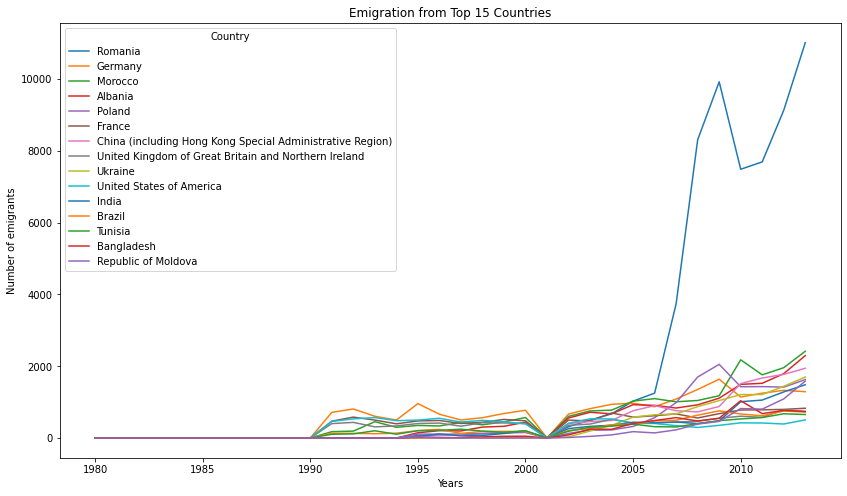

In [175]:
df_top15_e.plot(kind='line', figsize=(14, 8))

plt.title('Emigration from Top 15 Countries')
plt.ylabel('Number of emigrants')
plt.xlabel('Years')

plt.show()

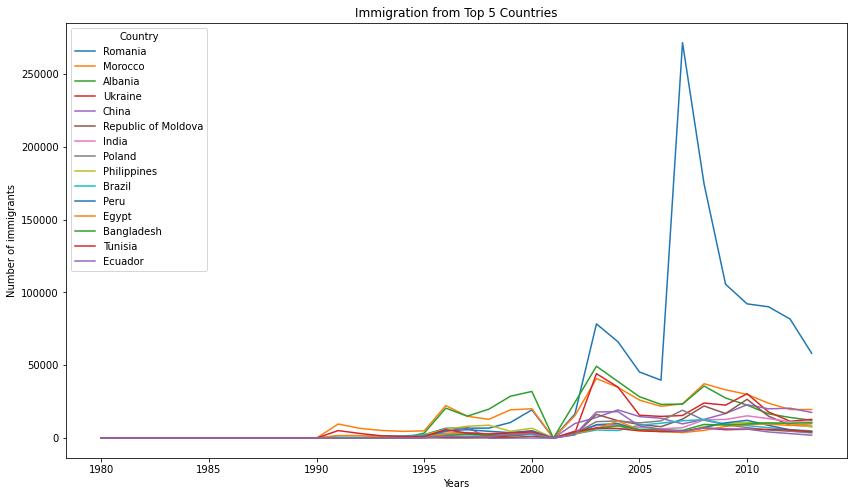

In [176]:
df_top15_i.plot(kind='line', figsize=(14, 8))

plt.title('Immigration from Top 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

----------------

In [177]:
df_top15_no_romania_e = df_italy_emigrants.head(18)
df_top15_no_romania_e

Continent  \
Country                                                                               
Total                                                                         World   
Italy                                                                        Europe   
Romania                                                                      Europe   
Germany                                                                      Europe   
Morocco                                                                      Africa   
Unknown                                                                       World   
Albania                                                                      Europe   
Poland                                                                       Europe   
France                                                                       Europe   
China (including Hong Kong Special Administrati...                             Asia   
United Kingdom of Great Britain and Northern Ir...                           Europe   
Ukraine                                                                      Europe   
United States of America                                           Northern America   
India                                                                          Asia   
Brazil                                              Latin America and the Caribbean   
Tunisia                                                                      Africa   
Bangladesh                                                                     Asia   
Republic of Moldova                                                          Europe   

                                                              Region  \
Country                                                                
Total                                                          World   
Italy                                                Southern Europe   
Romania                                               Eastern Europe   
Germany                                               Western Europe   
Morocco                                              Northern Africa   
Unknown                                                        World   
Albania                                              Southern Europe   
Poland                                                Eastern Europe   
France                                                Western Europe   
China (including Hong Kong Special Administrati...      Eastern Asia   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
Ukraine                                               Eastern Europe   
United States of America                            Northern America   
India                                                  Southern Asia   
Brazil                                                 South America   
Tunisia                                              Northern Africa   
Bangladesh                                             Southern Asia   
Republic of Moldova                                   Eastern Europe   

                                                           Development  1980  \
Country                                                                        
Total                                                            World   0.0   
Italy                                                Developed regions   0.0   
Romania                                              Developed regions   0.0   
Germany                                              Developed regions   0.0   
Morocco                                             Developing regions   0.0   
Unknown                                                          World   0.0   
Albania                                              Developed regions   0.0   
Poland                                               Developed regions   0.0   
France                                               Developed regions   0.0   
China (inclu

In [178]:
df_top15_no_romania_e.drop(['Total','Italy','Romania','Unknown'], axis=0, inplace=True)
df_top15_no_romania_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent  \
Country                                                                               
Germany                                                                      Europe   
Morocco                                                                      Africa   
Albania                                                                      Europe   
Poland                                                                       Europe   
France                                                                       Europe   
China (including Hong Kong Special Administrati...                             Asia   
United Kingdom of Great Britain and Northern Ir...                           Europe   
Ukraine                                                                      Europe   
United States of America                                           Northern America   
India                                                                          Asia   
Brazil                                              Latin America and the Caribbean   
Tunisia                                                                      Africa   
Bangladesh                                                                     Asia   
Republic of Moldova                                                          Europe   

                                                              Region  \
Country                                                                
Germany                                               Western Europe   
Morocco                                              Northern Africa   
Albania                                              Southern Europe   
Poland                                                Eastern Europe   
France                                                Western Europe   
China (including Hong Kong Special Administrati...      Eastern Asia   
United Kingdom of Great Britain and Northern Ir...   Northern Europe   
Ukraine                                               Eastern Europe   
United States of America                            Northern America   
India                                                  Southern Asia   
Brazil                                                 South America   
Tunisia                                              Northern Africa   
Bangladesh                                             Southern Asia   
Republic of Moldova                                   Eastern Europe   

                                                           Development  1980  \
Country                                                                        
Germany                                              Developed regions   0.0   
Morocco                                             Developing regions   0.0   
Albania                                              Developed regions   0.0   
Poland                                               Developed regions   0.0   
France                                               Developed regions   0.0   
China (including Hong Kong Special Administrati...  Developing regions   0.0   
United Kingdom of Great Britain and Northern Ir...   Developed regions   0.0   
Ukraine                                              Developed regions   0.0   
United States of America                             Developed regions   0.0   
India                                               Developing regions   0.0   
Brazil                                              Developing regions   0.0   
Tunisia                                             Developing regions   0.0   
Bangladesh                                          Developing regions   0.0   
Republic of Moldova                                  Developed regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                                                      
Germany                                              0.0   0.0   0.0   0.0   
Morocco      

-----------------

In [179]:
df_top15_no_romania_i = df_italy_immigrants.head(16)
df_top15_no_romania_i

Continent              Region  \
Country                                                                    
Romania                                       Europe      Eastern Europe   
Italy                                         Europe     Southern Europe   
Morocco                                       Africa     Northern Africa   
Albania                                       Europe     Southern Europe   
Ukraine                                       Europe      Eastern Europe   
China                                           Asia        Eastern Asia   
Republic of Moldova                           Europe      Eastern Europe   
India                                           Asia       Southern Asia   
Poland                                        Europe      Eastern Europe   
Philippines                                     Asia  South-Eastern Asia   
Brazil               Latin America and the Caribbean       South America   
Peru                 Latin America and the Caribbean       South America   
Egypt                                         Africa     Northern Africa   
Bangladesh                                      Asia       Southern Asia   
Tunisia                                       Africa     Northern Africa   
Ecuador              Latin America and the Caribbean       South America   

                            Development  1980  1981  1982  1983  1984  1985  \
Country                                                                       
Romania               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Italy                 Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Morocco              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Albania               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ukraine               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
China                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Republic of Moldova   Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
India                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Poland                Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Philippines          Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil               Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                 Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Egypt                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Bangladesh           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Tunisia              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   

                     1986  ...     2005     2006      2007      2008  \
Country                    ...                                         
Romania               0.0  ...  45338.0  39715.0  271443.0  174554.0   
Italy                 0.0  ...  42893.0  43052.0   42818.0   38163.0   
Morocco               0.0  ...  26057.0  21784.0   23483.0   37275.0   
Albania               0.0  ...  28358.0  23099.0   23292.0   35715.0   
Ukraine               0.0  ...  15675.0  14821.0   15487.0   24039.0   
China                 0.0  ...  14732.0  13579.0    9719.0   12791.0   
Republic of Moldova   0.0  ...   9311.0   7795.0   12989.0   22007.0   
India                 0.0  ...   7172.0   6292.0    7112.0   12469.0   
Poland                0.0  ...  10385.0  11791.0   19101.0   12314.0   
Philippines           0.0  ...   5546.0   4428.0    3951.0    7849.0   
Brazil                0.0  ...   8796.0  10183.0   11863.0   12645.0   
Peru                  0.0  ...   5402.0   4879.0    4451.0    7182.0   
Egypt                 0.0  ...   5584.0   5041.0    3726.0    5274.0   
Bangladesh            0.0  ...   5781.0   5631.0    5223.0    9332.0   
Tunisia               0.0  ...   4915.0   4414.0    4512.0    6947.0   
Ecuador               0.0  

In [180]:
df_top15_no_romania_i.drop(['Italy','Romania'], axis=0, inplace=True)
df_top15_no_romania_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent              Region  \
Country                                                                    
Morocco                                       Africa     Northern Africa   
Albania                                       Europe     Southern Europe   
Ukraine                                       Europe      Eastern Europe   
China                                           Asia        Eastern Asia   
Republic of Moldova                           Europe      Eastern Europe   
India                                           Asia       Southern Asia   
Poland                                        Europe      Eastern Europe   
Philippines                                     Asia  South-Eastern Asia   
Brazil               Latin America and the Caribbean       South America   
Peru                 Latin America and the Caribbean       South America   
Egypt                                         Africa     Northern Africa   
Bangladesh                                      Asia       Southern Asia   
Tunisia                                       Africa     Northern Africa   
Ecuador              Latin America and the Caribbean       South America   

                            Development  1980  1981  1982  1983  1984  1985  \
Country                                                                       
Morocco              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Albania               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ukraine               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
China                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Republic of Moldova   Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
India                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Poland                Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Philippines          Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil               Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                 Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Egypt                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Bangladesh           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Tunisia              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   

                     1986  ...     2005     2006     2007     2008     2009  \
Country                    ...                                                
Morocco               0.0  ...  26057.0  21784.0  23483.0  37275.0  33128.0   
Albania               0.0  ...  28358.0  23099.0  23292.0  35715.0  27493.0   
Ukraine               0.0  ...  15675.0  14821.0  15487.0  24039.0  22594.0   
China                 0.0  ...  14732.0  13579.0   9719.0  12791.0  16843.0   
Republic of Moldova   0.0  ...   9311.0   7795.0  12989.0  22007.0  16812.0   
India                 0.0  ...   7172.0   6292.0   7112.0  12469.0  12769.0   
Poland                0.0  ...  10385.0  11791.0  19101.0  12314.0   9123.0   
Philippines           0.0  ...   5546.0   4428.0   3951.0   7849.0   9995.0   
Brazil                0.0  ...   8796.0  10183.0  11863.0  12645.0   9658.0   
Peru                  0.0  ...   5402.0   4879.0   4451.0   7182.0  10421.0   
Egypt                 0.0  ...   5584.0   5041.0   3726.0   5274.0   7977.0   
Bangladesh            0.0  ...   5781.0   5631.0   5223.0   9332.0   8902.0   
Tunisia               0.0  ...   4915.0   4414.0   4512.0   6947.0   5692.0   
Ecuador               0.0  ...   8278.0   6047.0   4414.0   6874.0   6324.0   

                        2010     2011     2012     2013     Total  
Country                                                            
Morocco              29960.0  23885.0  19590.0  19568.0  446187.0  
Albania              22591.0  16613.0  14118.0  12165.0  435426.0  
Ukraine              304

In [181]:
df_top15_no_romania_e = df_top15_no_romania_e[years].transpose()
df_top15_no_romania_e.head()

Country  Germany  Morocco  Albania  Poland  France  \
1980         0.0      0.0      0.0     0.0     0.0   
1981         0.0      0.0      0.0     0.0     0.0   
1982         0.0      0.0      0.0     0.0     0.0   
1983         0.0      0.0      0.0     0.0     0.0   
1984         0.0      0.0      0.0     0.0     0.0   

Country  China (including Hong Kong Special Administrative Region)  \
1980                                                   0.0           
1981                                                   0.0           
1982                                                   0.0           
1983                                                   0.0           
1984                                                   0.0           

Country  United Kingdom of Great Britain and Northern Ireland  Ukraine  \
1980                                                   0.0         0.0   
1981                                                   0.0         0.0   
1982                                                   0.0         0.0   
1983                                                   0.0         0.0   
1984                                                   0.0         0.0   

Country  United States of America  India  Brazil  Tunisia  Bangladesh  \
1980                          0.0    0.0     0.0      0.0         0.0   
1981                          0.0    0.0     0.0      0.0         0.0   
1982                          0.0    0.0     0.0      0.0         0.0   
1983                          0.0    0.0     0.0      0.0         0.0   
1984                          0.0    0.0     0.0      0.0         0.0   

Country  Republic of Moldova  
1980                     0.0  
1981                     0.0  
1982                     0.0  
1983                     0.0  
1984                     0.0

In [182]:
df_top15_no_romania_i = df_top15_no_romania_i[years].transpose()
df_top15_no_romania_i.head()

Country  Morocco  Albania  Ukraine  China  Republic of Moldova  India  Poland  \
1980         0.0      0.0      0.0    0.0                  0.0    0.0     0.0   
1981         0.0      0.0      0.0    0.0                  0.0    0.0     0.0   
1982         0.0      0.0      0.0    0.0                  0.0    0.0     0.0   
1983         0.0      0.0      0.0    0.0                  0.0    0.0     0.0   
1984         0.0      0.0      0.0    0.0                  0.0    0.0     0.0   

Country  Philippines  Brazil  Peru  Egypt  Bangladesh  Tunisia  Ecuador  
1980             0.0     0.0   0.0    0.0         0.0      0.0      0.0  
1981             0.0     0.0   0.0    0.0         0.0      0.0      0.0  
1982             0.0     0.0   0.0    0.0         0.0      0.0      0.0  
1983             0.0     0.0   0.0    0.0         0.0      0.0      0.0  
1984             0.0     0.0   0.0    0.0         0.0      0.0      0.0

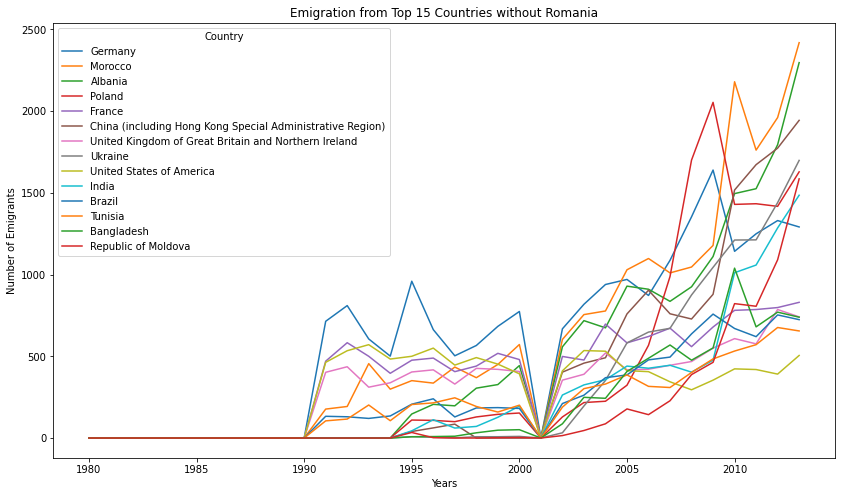

In [183]:
df_top15_no_romania_e.plot(kind='line', figsize=(14, 8))

plt.title('Emigration from Top 15 Countries without Romania')
plt.ylabel('Number of Emigrants')
plt.xlabel('Years')

plt.show()

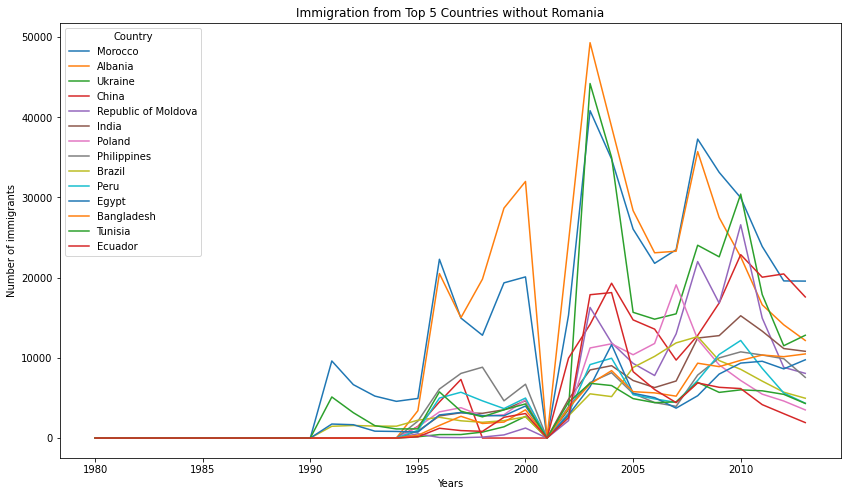

In [184]:
df_top15_no_romania_i.plot(kind='line', figsize=(14, 8))

plt.title('Immigration from Top 5 Countries without Romania')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

----------------

In [185]:
df_top15_e = df_italy_emigrants.head(18)
df_top15_e.drop(['Total','Italy','Unknown'], axis=0, inplace=True)
df_top15_e.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','China (including Hong Kong Special Administrative Region)':'China','United States of America':'USA','Republic of Moldova':'Moldova'}, inplace=True)
df_top15_e

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent            Region  \
Country                                                         
Romania                              Europe    Eastern Europe   
Germany                              Europe    Western Europe   
Morocco                              Africa   Northern Africa   
Albania                              Europe   Southern Europe   
Poland                               Europe    Eastern Europe   
France                               Europe    Western Europe   
China                                  Asia      Eastern Asia   
UK                                   Europe   Northern Europe   
Ukraine                              Europe    Eastern Europe   
USA                        Northern America  Northern America   
India                                  Asia     Southern Asia   
Brazil      Latin America and the Caribbean     South America   
Tunisia                              Africa   Northern Africa   
Bangladesh                             Asia     Southern Asia   
Moldova                              Europe    Eastern Europe   

                   Development  1980  1981  1982  1983  1984  1985  1986  ...  \
Country                                                                   ...   
Romania      Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Germany      Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Morocco     Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Albania      Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Poland       Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
France       Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
China       Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
UK           Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Ukraine      Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
USA          Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
India       Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Brazil      Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Tunisia     Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Bangladesh  Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Moldova      Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

              2005    2006    2007    2008    2009    2010    2011    2012  \
Country                                                                      
Romania     1028.0  1251.0  3742.0  8308.0  9924.0  7488.0  7693.0  9131.0   
Germany      970.0   872.0  1087.0  1353.0  1639.0  1142.0  1249.0  1330.0   
Morocco     1029.0  1098.0  1010.0  1046.0  1178.0  2179.0  1761.0  1960.0   
Albania      929.0   910.0   836.0   925.0  1110.0  1495.0  1525.0  1794.0   
Poland       323.0   567.0   988.0  1700.0  2053.0  1429.0  1433.0  1417.0   
France       582.0   621.0   672.0   559.0   679.0   781.0   786.0   798.0   
China        759.0   904.0   760.0   728.0   879.0  1517.0  1672.0  1773.0   
UK           417.0   421.0   445.0   468.0   550.0   608.0   576.0   786.0   
Ukraine      582.0   648.0   671.0   875.0  1044.0  1211.0  1212.0  1440.0   
USA          412.0   406.0   344.0   295.0   354.0   423.0   419.0   391.0   
India        440.0   427.0   445.0   403.0   476.0  1011.0  1058.0  1285.0   
Brazil       386.0   478.0   495.0   637.0   758.0   670.0   620.0   753.0   
Tunisia      386.0   316.0   309.0   401.0   484.0   532.0   571.0   676.0   
Bangladesh   407.0   488.0   569.0   476.0   551.0  1039.0   680.0   770.0   
Moldova      178.0   143.0   228.0   388.0   463.0   822.0   806.0  1090.0   

               2013    Total  
Country                       
Romania     11014.0  61792.0  
Germany      1291.0  20137.0  
Morocco      2418.0  19450.0  
Albania      2296.0  15395.0  
Poland       1628.0  12854.0  
France

In [186]:
df_top15_e.shape

(15, 38)

In [187]:
df_top15_e.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total = df_top15_e['Total']
df_top15_e_total

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Moldova        5892.0
Bangladesh     6457.0
Tunisia        6899.0
Brazil         8008.0
India          8585.0
USA            9910.0
Ukraine       10001.0
UK            10167.0
China         12474.0
France        12739.0
Poland        12854.0
Albania       15395.0
Morocco       19450.0
Germany       20137.0
Romania       61792.0
Name: Total, dtype: float64

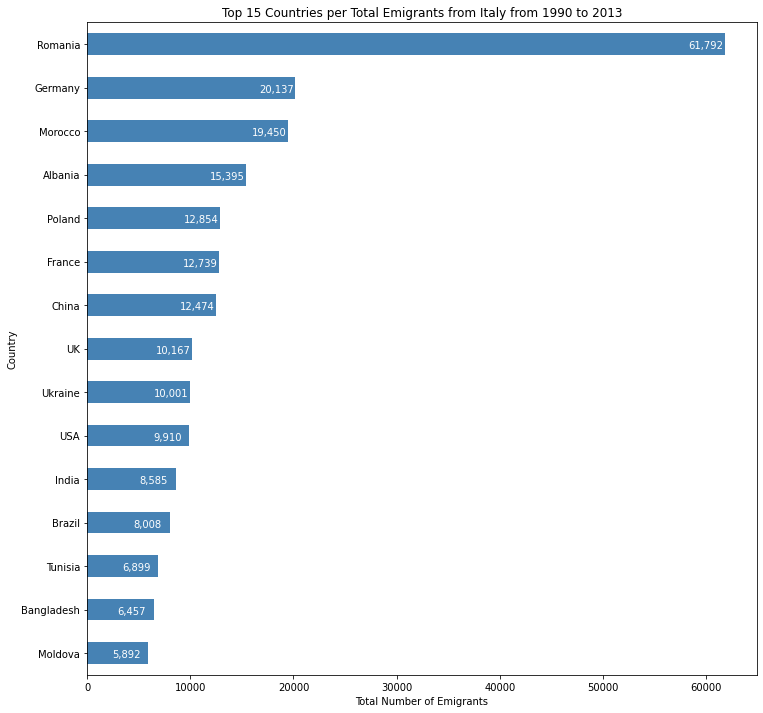

In [188]:
df_top15_e_total.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Italy from 1990 to 2013') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 3500, index - 0.10), color='white')


plt.show()

-------------

In [189]:
df_top15_i = df_italy_immigrants.head(16)
df_top15_i.drop(['Italy'], axis=0, inplace=True)
df_top15_i.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','China (including Hong Kong Special Administrative Region)':'China','United States of America':'USA','Republic of Moldova':'Moldova'}, inplace=True)
df_top15_i

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Continent              Region  \
Country                                                            
Romania                               Europe      Eastern Europe   
Morocco                               Africa     Northern Africa   
Albania                               Europe     Southern Europe   
Ukraine                               Europe      Eastern Europe   
China                                   Asia        Eastern Asia   
Moldova                               Europe      Eastern Europe   
India                                   Asia       Southern Asia   
Poland                                Europe      Eastern Europe   
Philippines                             Asia  South-Eastern Asia   
Brazil       Latin America and the Caribbean       South America   
Peru         Latin America and the Caribbean       South America   
Egypt                                 Africa     Northern Africa   
Bangladesh                              Asia       Southern Asia   
Tunisia                               Africa     Northern Africa   
Ecuador      Latin America and the Caribbean       South America   

                    Development  1980  1981  1982  1983  1984  1985  1986  \
Country                                                                     
Romania       Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Morocco      Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Albania       Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Ukraine       Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
China        Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Moldova       Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
India        Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Poland        Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Philippines  Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil       Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Peru         Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Egypt        Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Bangladesh   Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Tunisia      Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador      Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

             ...     2005     2006      2007      2008      2009     2010  \
Country      ...                                                            
Romania      ...  45338.0  39715.0  271443.0  174554.0  105597.0  92116.0   
Morocco      ...  26057.0  21784.0   23483.0   37275.0   33128.0  29960.0   
Albania      ...  28358.0  23099.0   23292.0   35715.0   27493.0  22591.0   
Ukraine      ...  15675.0  14821.0   15487.0   24039.0   22594.0  30416.0   
China        ...  14732.0  13579.0    9719.0   12791.0   16843.0  22866.0   
Moldova      ...   9311.0   7795.0   12989.0   22007.0   16812.0  26591.0   
India        ...   7172.0   6292.0    7112.0   12469.0   12769.0  15246.0   
Poland       ...  10385.0  11791.0   19101.0   12314.0    9123.0   7174.0   
Philippines  ...   5546.0   4428.0    3951.0    7849.0    9995.0  10745.0   
Brazil       ...   8796.0  10183.0   11863.0   12645.0    9658.0   8566.0   
Peru         ...   5402.0   4879.0    4451.0    7182.0   10421.0  12166.0   
Egypt        ...   5584.0   5041.0    3726.0    5274.0    7977.0   9345.0   
Bangladesh   ...   5781.0   5631.0    5223.0    9332.0    8902.0   9688.0   
Tunisia      ...   4915.0   4414.0    4512.0    6947.0    5692.0   6007.0   
Ecuador      ...   8278.0   6047.0    4414.0    6874.0    6324.0   6168.0   

                2011     2012     2013      Total  
Country                                            
Romania      90096.0  81666.0  58227.0  1172278.0  
Morocco      23885.0  19590.0  19568.0   446187.0  
Albania      16613.0  14118.0  12165.0   435426.0 

In [190]:
df_top15_i.shape

(15, 38)

In [191]:
df_top15_i.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total = df_top15_i['Total']
df_top15_i_total

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Ecuador          94542.0
Tunisia          97594.0
Bangladesh      106364.0
Egypt           107291.0
Peru            110229.0
Brazil          112664.0
Philippines     125759.0
Poland          128481.0
India           136744.0
Moldova         160070.0
China           205332.0
Ukraine         253865.0
Albania         435426.0
Morocco         446187.0
Romania        1172278.0
Name: Total, dtype: float64

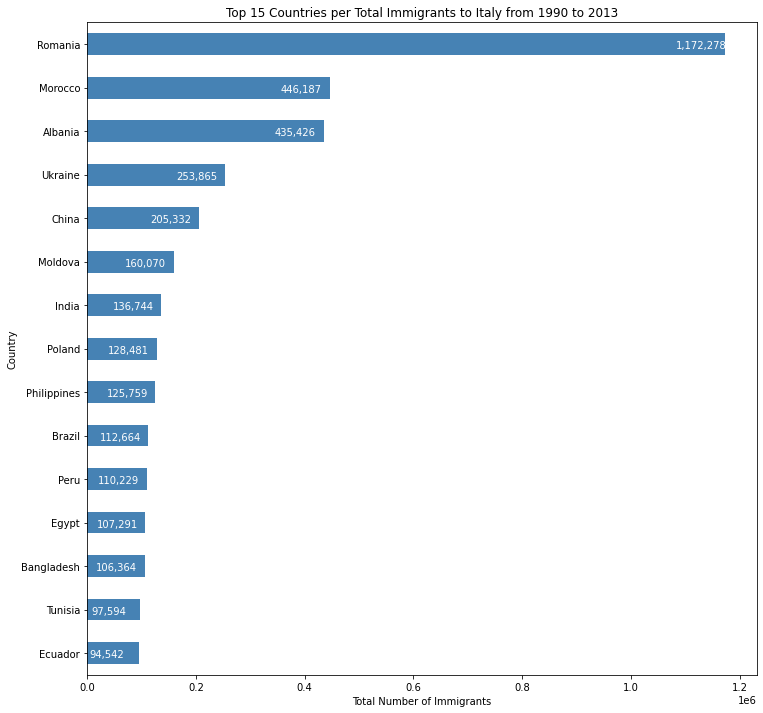

In [192]:
df_top15_i_total.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Italy from 1990 to 2013') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 90000, index - 0.10), color='white')


plt.show()

---------------

### 4.2.3 Top 15 Countries - Sorted by Total and Continent<a id="4.2.3"></a>

---------------

### Europe

In [193]:
df_top15_e_europe = df_italy_emigrants[df_italy_emigrants['Continent']=='Europe']
df_top15_e_europe.head(16)

Continent           Region  \
Country                                                                         
Italy                                                 Europe  Southern Europe   
Romania                                               Europe   Eastern Europe   
Germany                                               Europe   Western Europe   
Albania                                               Europe  Southern Europe   
Poland                                                Europe   Eastern Europe   
France                                                Europe   Western Europe   
United Kingdom of Great Britain and Northern Ir...    Europe  Northern Europe   
Ukraine                                               Europe   Eastern Europe   
Republic of Moldova                                   Europe   Eastern Europe   
The former Yugoslav Republic of Macedonia             Europe  Southern Europe   
Switzerland                                           Europe   Western Europe   
Spain                                                 Europe  Southern Europe   
Bulgaria                                              Europe   Eastern Europe   
Netherlands                                           Europe   Western Europe   
Croatia                                               Europe  Southern Europe   
Serbia                                                Europe  Southern Europe   

                                                          Development  1980  \
Country                                                                       
Italy                                               Developed regions   0.0   
Romania                                             Developed regions   0.0   
Germany                                             Developed regions   0.0   
Albania                                             Developed regions   0.0   
Poland                                              Developed regions   0.0   
France                                              Developed regions   0.0   
United Kingdom of Great Britain and Northern Ir...  Developed regions   0.0   
Ukraine                                             Developed regions   0.0   
Republic of Moldova                                 Developed regions   0.0   
The former Yugoslav Republic of Macedonia           Developed regions   0.0   
Switzerland                                         Developed regions   0.0   
Spain                                               Developed regions   0.0   
Bulgaria                                            Developed regions   0.0   
Netherlands                                         Developed regions   0.0   
Croatia                                             Developed regions   0.0   
Serbia                                              Developed regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                                                      
Italy                                                0.0   0.0   0.0   0.0   
Romania                                              0.0   0.0   0.0   0.0   
Germany                                              0.0   0.0   0.0   0.0   
Albania                                              0.0   0.0   0.0   0.0   
Poland                                               0.0   0.0   0.0   0.0   
France                                               0.0   0.0   0.0   0.0   
United Kingdom of Great Britain and Northern Ir...   0.0   0.0   0.0   0.0   
Ukraine                                              0.0   0.0   0.0   0.0   
Republic of Moldova                                  0.0   0.0   0.0   0.0   
The former Yugoslav Republic of Macedonia            0.0   0.0   0.0   0.0   
Switzerland                                          0.0   0.0   0.0   0.0   
Spain                                                0.0   0.0   0.0   0.0   
Bulgaria                                             0.0   0.0   0.0   0.0   

In [194]:
df_top15_e_europe = df_top15_e_europe.head(16)
df_top15_e_europe.drop(['Italy'], axis=0, inplace=True)
df_top15_e_europe.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia'}, inplace=True)
df_top15_e_europe

Continent           Region        Development  1980  1981  1982  \
Country                                                                       
Romania        Europe   Eastern Europe  Developed regions   0.0   0.0   0.0   
Germany        Europe   Western Europe  Developed regions   0.0   0.0   0.0   
Albania        Europe  Southern Europe  Developed regions   0.0   0.0   0.0   
Poland         Europe   Eastern Europe  Developed regions   0.0   0.0   0.0   
France         Europe   Western Europe  Developed regions   0.0   0.0   0.0   
UK             Europe  Northern Europe  Developed regions   0.0   0.0   0.0   
Ukraine        Europe   Eastern Europe  Developed regions   0.0   0.0   0.0   
Moldova        Europe   Eastern Europe  Developed regions   0.0   0.0   0.0   
Macedonia      Europe  Southern Europe  Developed regions   0.0   0.0   0.0   
Switzerland    Europe   Western Europe  Developed regions   0.0   0.0   0.0   
Spain          Europe  Southern Europe  Developed regions   0.0   0.0   0.0   
Bulgaria       Europe   Eastern Europe  Developed regions   0.0   0.0   0.0   
Netherlands    Europe   Western Europe  Developed regions   0.0   0.0   0.0   
Croatia        Europe  Southern Europe  Developed regions   0.0   0.0   0.0   
Serbia         Europe  Southern Europe  Developed regions   0.0   0.0   0.0   

             1983  1984  1985  1986  ...    2005    2006    2007    2008  \
Country                              ...                                   
Romania       0.0   0.0   0.0   0.0  ...  1028.0  1251.0  3742.0  8308.0   
Germany       0.0   0.0   0.0   0.0  ...   970.0   872.0  1087.0  1353.0   
Albania       0.0   0.0   0.0   0.0  ...   929.0   910.0   836.0   925.0   
Poland        0.0   0.0   0.0   0.0  ...   323.0   567.0   988.0  1700.0   
France        0.0   0.0   0.0   0.0  ...   582.0   621.0   672.0   559.0   
UK            0.0   0.0   0.0   0.0  ...   417.0   421.0   445.0   468.0   
Ukraine       0.0   0.0   0.0   0.0  ...   582.0   648.0   671.0   875.0   
Moldova       0.0   0.0   0.0   0.0  ...   178.0   143.0   228.0   388.0   
Macedonia     0.0   0.0   0.0   0.0  ...   175.0   320.0   291.0   312.0   
Switzerland   0.0   0.0   0.0   0.0  ...   187.0   207.0   220.0   254.0   
Spain         0.0   0.0   0.0   0.0  ...   346.0   373.0   326.0   372.0   
Bulgaria      0.0   0.0   0.0   0.0  ...    85.0    77.0   272.0   540.0   
Netherlands   0.0   0.0   0.0   0.0  ...   269.0   204.0   264.0   290.0   
Croatia       0.0   0.0   0.0   0.0  ...   274.0   265.0   214.0   290.0   
Serbia        0.0   0.0   0.0   0.0  ...     0.0     0.0   309.0   339.0   

               2009    2010    2011    2012     2013    Total  
Country                                                        
Romania      9924.0  7488.0  7693.0  9131.0  11014.0  61792.0  
Germany      1639.0  1142.0  1249.0  1330.0   1291.0  20137.0  
Albania      1110.0  1495.0  1525.0  1794.0   2296.0  15395.0  
Poland       2053.0  1429.0  1433.0  1417.0   1628.0  12854.0  
France        679.0   781.0   786.0   798.0    830.0  12739.0  
UK            550.0   608.0   576.0   786.0    741.0  10167.0  
Ukraine      1044.0  1211.0  1212.0  1440.0   1698.0  10001.0  
Moldova       463.0   822.0   806.0  1090.0   1585.0   5892.0  
Macedonia     387.0   552.0   471.0   649.0    821.0   5093.0  
Switzerland   304.0   293.0   247.0   253.0    277.0   4954.0  
Spain         468.0   331.0   316.0   340.0    446.0   4940.0  
Bulgaria      640.0   448.0   401.0   539.0    728.0   3910.0  
Netherlands   347.0   280.0   285.0   277.0    313.0   3690.0  
Croatia       358.0   257.0   213.0   350.0    261.0   3626.0  
Serbia        435.0   515.0   372.0   675.0    319.0   2964.0  

[15 rows x 38 columns]

In [195]:
df_top15_e_europe.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_europe = df_top15_e_europe['Total']
df_top15_e_total_europe

Country
Serbia          2964.0
Croatia         3626.0
Netherlands     3690.0
Bulgaria        3910.0
Spain           4940.0
Switzerland     4954.0
Macedonia       5093.0
Moldova         5892.0
Ukraine        10001.0
UK             10167.0
France         12739.0
Poland         12854.0
Albania        15395.0
Germany        20137.0
Romania        61792.0
Name: Total, dtype: float64

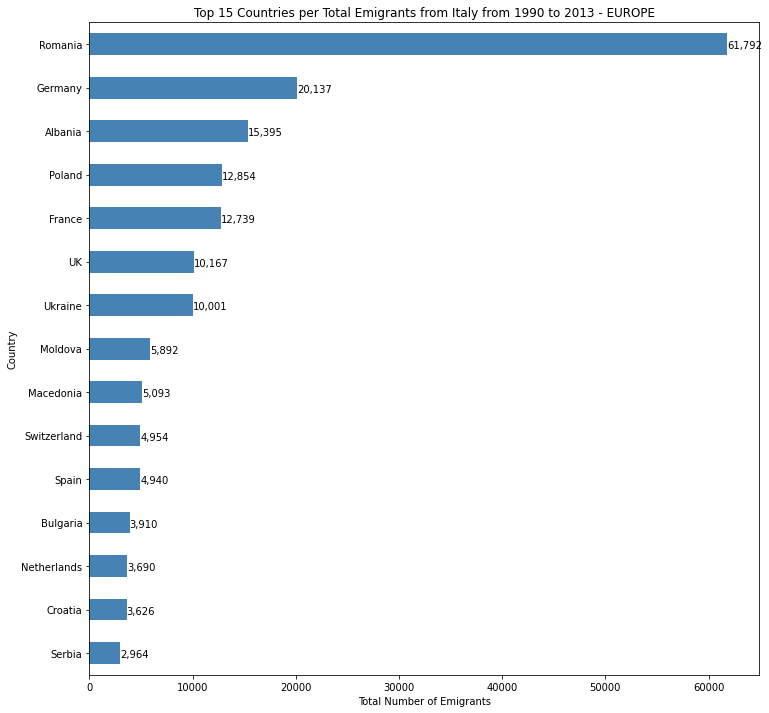

In [196]:
df_top15_e_total_europe.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Italy from 1990 to 2013 - EUROPE') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_europe): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='Black')


plt.show()

------------

In [197]:
df_top15_i_europe = df_italy_immigrants[df_italy_immigrants['Continent']=='Europe']
df_top15_i_europe.head(16)

Continent           Region  \
Country                                                                         
Romania                                               Europe   Eastern Europe   
Italy                                                 Europe  Southern Europe   
Albania                                               Europe  Southern Europe   
Ukraine                                               Europe   Eastern Europe   
Republic of Moldova                                   Europe   Eastern Europe   
Poland                                                Europe   Eastern Europe   
Bulgaria                                              Europe   Eastern Europe   
The former Yugoslav Republic of Macedonia             Europe  Southern Europe   
Russian Federation                                    Europe   Eastern Europe   
Germany                                               Europe   Western Europe   
France                                                Europe   Western Europe   
United Kingdom of Great Britain and Northern Ir...    Europe  Northern Europe   
Serbia                                                Europe  Southern Europe   
Spain                                                 Europe  Southern Europe   
Bosnia and Herzegovina                                Europe  Southern Europe   
Croatia                                               Europe  Southern Europe   

                                                          Development  1980  \
Country                                                                       
Romania                                             Developed regions   0.0   
Italy                                               Developed regions   0.0   
Albania                                             Developed regions   0.0   
Ukraine                                             Developed regions   0.0   
Republic of Moldova                                 Developed regions   0.0   
Poland                                              Developed regions   0.0   
Bulgaria                                            Developed regions   0.0   
The former Yugoslav Republic of Macedonia           Developed regions   0.0   
Russian Federation                                  Developed regions   0.0   
Germany                                             Developed regions   0.0   
France                                              Developed regions   0.0   
United Kingdom of Great Britain and Northern Ir...  Developed regions   0.0   
Serbia                                              Developed regions   0.0   
Spain                                               Developed regions   0.0   
Bosnia and Herzegovina                              Developed regions   0.0   
Croatia                                             Developed regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                                                      
Romania                                              0.0   0.0   0.0   0.0   
Italy                                                0.0   0.0   0.0   0.0   
Albania                                              0.0   0.0   0.0   0.0   
Ukraine                                              0.0   0.0   0.0   0.0   
Republic of Moldova                                  0.0   0.0   0.0   0.0   
Poland                                               0.0   0.0   0.0   0.0   
Bulgaria                                             0.0   0.0   0.0   0.0   
The former Yugoslav Republic of Macedonia            0.0   0.0   0.0   0.0   
Russian Federation                                   0.0   0.0   0.0   0.0   
Germany                                              0.0   0.0   0.0   0.0   
France                                               0.0   0.0   0.0   0.0   
United Kingdom of Great Britain and Northern Ir...   0.0   0.0   0.0   0.0   
Serbia                                               0.0   0.0   0.0   0.0   

In [198]:
df_top15_i_europe = df_top15_i_europe.head(16)
df_top15_i_europe.drop(['Italy'], axis=0, inplace=True)
df_top15_i_europe.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia'}, inplace=True)
df_top15_i_europe

Continent           Region        Development  1980  \
Country                                                                      
Romania                   Europe   Eastern Europe  Developed regions   0.0   
Albania                   Europe  Southern Europe  Developed regions   0.0   
Ukraine                   Europe   Eastern Europe  Developed regions   0.0   
Moldova                   Europe   Eastern Europe  Developed regions   0.0   
Poland                    Europe   Eastern Europe  Developed regions   0.0   
Bulgaria                  Europe   Eastern Europe  Developed regions   0.0   
Macedonia                 Europe  Southern Europe  Developed regions   0.0   
Russian Federation        Europe   Eastern Europe  Developed regions   0.0   
Germany                   Europe   Western Europe  Developed regions   0.0   
France                    Europe   Western Europe  Developed regions   0.0   
UK                        Europe  Northern Europe  Developed regions   0.0   
Serbia                    Europe  Southern Europe  Developed regions   0.0   
Spain                     Europe  Southern Europe  Developed regions   0.0   
Bosnia and Herzegovina    Europe  Southern Europe  Developed regions   0.0   
Croatia                   Europe  Southern Europe  Developed regions   0.0   

                        1981  1982  1983  1984  1985  1986  ...     2005  \
Country                                                     ...            
Romania                  0.0   0.0   0.0   0.0   0.0   0.0  ...  45338.0   
Albania                  0.0   0.0   0.0   0.0   0.0   0.0  ...  28358.0   
Ukraine                  0.0   0.0   0.0   0.0   0.0   0.0  ...  15675.0   
Moldova                  0.0   0.0   0.0   0.0   0.0   0.0  ...   9311.0   
Poland                   0.0   0.0   0.0   0.0   0.0   0.0  ...  10385.0   
Bulgaria                 0.0   0.0   0.0   0.0   0.0   0.0  ...   2361.0   
Macedonia                0.0   0.0   0.0   0.0   0.0   0.0  ...   4500.0   
Russian Federation       0.0   0.0   0.0   0.0   0.0   0.0  ...   2881.0   
Germany                  0.0   0.0   0.0   0.0   0.0   0.0  ...   2662.0   
France                   0.0   0.0   0.0   0.0   0.0   0.0  ...   2347.0   
UK                       0.0   0.0   0.0   0.0   0.0   0.0  ...   1958.0   
Serbia                   0.0   0.0   0.0   0.0   0.0   0.0  ...      0.0   
Spain                    0.0   0.0   0.0   0.0   0.0   0.0  ...   1286.0   
Bosnia and Herzegovina   0.0   0.0   0.0   0.0   0.0   0.0  ...   1378.0   
Croatia                  0.0   0.0   0.0   0.0   0.0   0.0  ...   1081.0   

                           2006      2007      2008      2009     2010  \
Country                                                                  
Romania                 39715.0  271443.0  174554.0  105597.0  92116.0   
Albania                 23099.0   23292.0   35715.0   27493.0  22591.0   
Ukraine                 14821.0   15487.0   24039.0   22594.0  30416.0   
Moldova                  7795.0   12989.0   22007.0   16812.0  26591.0   
Poland                  11791.0   19101.0   12314.0    9123.0   7174.0   
Bulgaria                 2145.0   13362.0    8436.0    6244.0   5877.0   
Macedonia                5105.0    4088.0    5794.0    4942.0   3359.0   
Russian Federation       2880.0    3004.0    3752.0    4061.0   5138.0   
Germany                  2489.0    3703.0    3132.0    2538.0   2099.0   
France                   2195.0    2668.0    2497.0    2345.0   2012.0   
UK                       1899.0    2555.0    2244.0    1939.0   1568.0   
Serbia                      0.0    4881.0    5581.0    4778.0   5056.0   
Spain                    1206.0    1517.0    1512.0    1386.0   1514.0   
Bosnia and Herzegovina   1375.0    1146.0    1959.0    1435.0    997.0   
Croatia                   959.0     727.0     852.0     680.0    730.0   

                           2011     2012     2013      Total  
Country                                                       
Romania           

In [199]:
df_top15_i_europe.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_europe = df_top15_i_europe['Total']
df_top15_i_total_europe

Country
Croatia                     15062.0
Bosnia and Herzegovina      18744.0
Spain                       21334.0
Serbia                      24102.0
UK                          34347.0
France                      43367.0
Germany                     50462.0
Russian Federation          55769.0
Macedonia                   62515.0
Bulgaria                    64663.0
Poland                     128481.0
Moldova                    160070.0
Ukraine                    253865.0
Albania                    435426.0
Romania                   1172278.0
Name: Total, dtype: float64

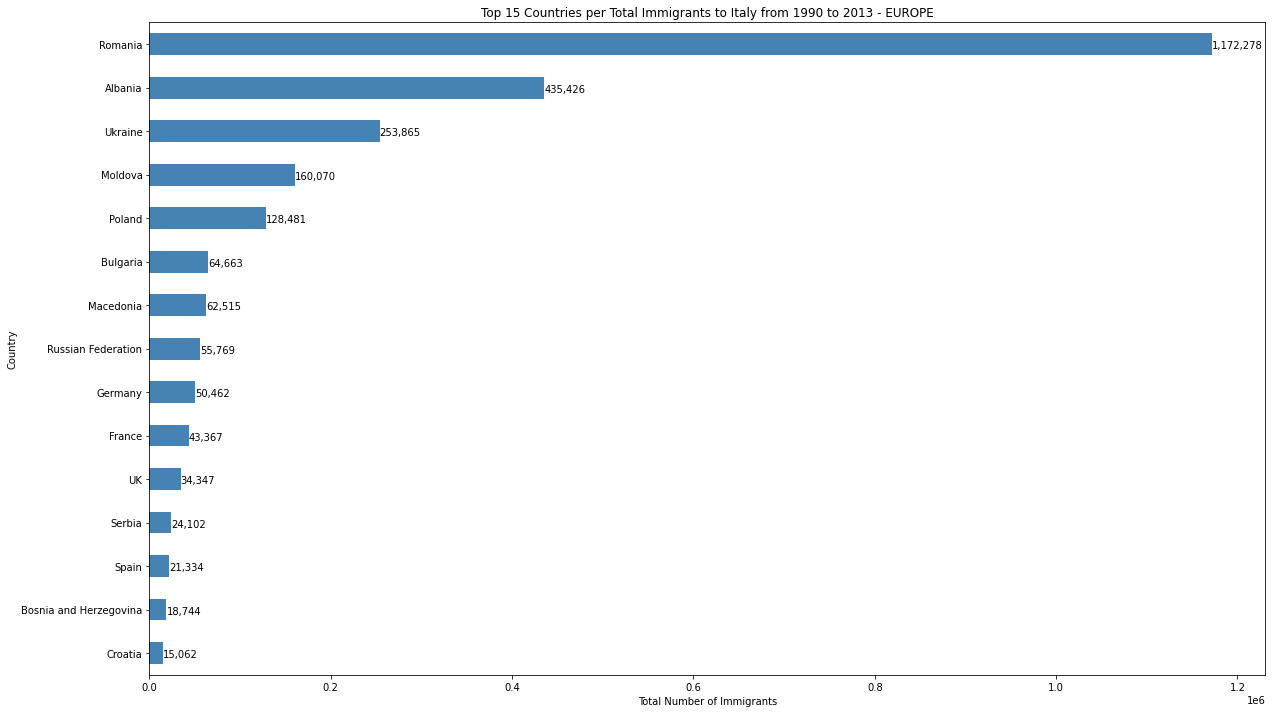

In [200]:
df_top15_i_total_europe.plot(kind='barh', figsize=(20, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Italy from 1990 to 2013 - EUROPE') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_europe): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### Africa

In [201]:
df_top15_e_africa = df_italy_emigrants[df_italy_emigrants['Continent']=='Africa']
df_top15_e_africa.head(15)

Continent           Region         Development  1980  1981  \
Country                                                                    
Morocco          Africa  Northern Africa  Developing regions   0.0   0.0   
Tunisia          Africa  Northern Africa  Developing regions   0.0   0.0   
Senegal          Africa   Western Africa  Developing regions   0.0   0.0   
Egypt            Africa  Northern Africa  Developing regions   0.0   0.0   
Ghana            Africa   Western Africa  Developing regions   0.0   0.0   
Nigeria          Africa   Western Africa  Developing regions   0.0   0.0   
Algeria          Africa  Northern Africa  Developing regions   0.0   0.0   
Côte d'Ivoire    Africa   Western Africa  Developing regions   0.0   0.0   
Somalia          Africa   Eastern Africa  Developing regions   0.0   0.0   
Ethiopia         Africa   Eastern Africa  Developing regions   0.0   0.0   
Cameroon         Africa    Middle Africa  Developing regions   0.0   0.0   
Burkina Faso     Africa   Western Africa  Developing regions   0.0   0.0   
Eritrea          Africa   Eastern Africa  Developing regions   0.0   0.0   
Congo            Africa    Middle Africa  Developing regions   0.0   0.0   
Mauritius        Africa   Eastern Africa  Developing regions   0.0   0.0   

               1982  1983  1984  1985  1986  ...    2005    2006    2007  \
Country                                      ...                           
Morocco         0.0   0.0   0.0   0.0   0.0  ...  1029.0  1098.0  1010.0   
Tunisia         0.0   0.0   0.0   0.0   0.0  ...   386.0   316.0   309.0   
Senegal         0.0   0.0   0.0   0.0   0.0  ...   193.0   211.0   132.0   
Egypt           0.0   0.0   0.0   0.0   0.0  ...   147.0   176.0   134.0   
Ghana           0.0   0.0   0.0   0.0   0.0  ...   137.0   151.0   126.0   
Nigeria         0.0   0.0   0.0   0.0   0.0  ...   155.0    95.0    81.0   
Algeria         0.0   0.0   0.0   0.0   0.0  ...    82.0    81.0    75.0   
Côte d'Ivoire   0.0   0.0   0.0   0.0   0.0  ...    46.0    50.0    57.0   
Somalia         0.0   0.0   0.0   0.0   0.0  ...    63.0    56.0    67.0   
Ethiopia        0.0   0.0   0.0   0.0   0.0  ...    19.0    34.0    30.0   
Cameroon        0.0   0.0   0.0   0.0   0.0  ...    16.0    33.0     8.0   
Burkina Faso    0.0   0.0   0.0   0.0   0.0  ...    46.0    24.0    27.0   
Eritrea         0.0   0.0   0.0   0.0   0.0  ...    24.0    29.0    29.0   
Congo           0.0   0.0   0.0   0.0   0.0  ...    19.0    38.0    17.0   
Mauritius       0.0   0.0   0.0   0.0   0.0  ...    15.0    13.0    22.0   

                 2008    2009    2010    2011    2012    2013    Total  
Country                                                                 
Morocco        1046.0  1178.0  2179.0  1761.0  1960.0  2418.0  19450.0  
Tunisia         401.0   484.0   532.0   571.0   676.0   655.0   6899.0  
Senegal         178.0   216.0   234.0   246.0   397.0   434.0   3419.0  
Egypt           111.0   137.0   333.0   304.0   449.0   360.0   3336.0  
Ghana           146.0   178.0   253.0   208.0   210.0   233.0   2735.0  
Nigeria          96.0   115.0   191.0   162.0   188.0   229.0   1816.0  
Algeria         127.0   149.0   152.0   165.0   140.0   159.0   1448.0  
Côte d'Ivoire    96.0   116.0    86.0   119.0   114.0   177.0   1025.0  
Somalia          20.0    20.0    26.0    34.0    34.0    33.0    972.0  
Ethiopia         17.0    20.0    33.0    18.0    53.0    43.0    604.0  
Cameroon         24.0    32.0    48.0    62.0    58.0    76.0    457.0  
Burkina Faso     31.0    35.0    62.0    40.0    64.0    56.0    445.0  
Eritrea          19.0    23.0    36.0    35.0    63.0    25.0    401.0  
Congo            41.0    47.0    14.0    26.0    33.0    15.0    322.0  
Mauritius        11.0    12.0    13.0    19.0    21.0    40.0    275.0  

[15 rows x 38 columns]

In [202]:
df_top15_e_africa = df_top15_e_africa.head(15)
df_top15_e_africa

Continent           Region         Development  1980  1981  \
Country                                                                    
Morocco          Africa  Northern Africa  Developing regions   0.0   0.0   
Tunisia          Africa  Northern Africa  Developing regions   0.0   0.0   
Senegal          Africa   Western Africa  Developing regions   0.0   0.0   
Egypt            Africa  Northern Africa  Developing regions   0.0   0.0   
Ghana            Africa   Western Africa  Developing regions   0.0   0.0   
Nigeria          Africa   Western Africa  Developing regions   0.0   0.0   
Algeria          Africa  Northern Africa  Developing regions   0.0   0.0   
Côte d'Ivoire    Africa   Western Africa  Developing regions   0.0   0.0   
Somalia          Africa   Eastern Africa  Developing regions   0.0   0.0   
Ethiopia         Africa   Eastern Africa  Developing regions   0.0   0.0   
Cameroon         Africa    Middle Africa  Developing regions   0.0   0.0   
Burkina Faso     Africa   Western Africa  Developing regions   0.0   0.0   
Eritrea          Africa   Eastern Africa  Developing regions   0.0   0.0   
Congo            Africa    Middle Africa  Developing regions   0.0   0.0   
Mauritius        Africa   Eastern Africa  Developing regions   0.0   0.0   

               1982  1983  1984  1985  1986  ...    2005    2006    2007  \
Country                                      ...                           
Morocco         0.0   0.0   0.0   0.0   0.0  ...  1029.0  1098.0  1010.0   
Tunisia         0.0   0.0   0.0   0.0   0.0  ...   386.0   316.0   309.0   
Senegal         0.0   0.0   0.0   0.0   0.0  ...   193.0   211.0   132.0   
Egypt           0.0   0.0   0.0   0.0   0.0  ...   147.0   176.0   134.0   
Ghana           0.0   0.0   0.0   0.0   0.0  ...   137.0   151.0   126.0   
Nigeria         0.0   0.0   0.0   0.0   0.0  ...   155.0    95.0    81.0   
Algeria         0.0   0.0   0.0   0.0   0.0  ...    82.0    81.0    75.0   
Côte d'Ivoire   0.0   0.0   0.0   0.0   0.0  ...    46.0    50.0    57.0   
Somalia         0.0   0.0   0.0   0.0   0.0  ...    63.0    56.0    67.0   
Ethiopia        0.0   0.0   0.0   0.0   0.0  ...    19.0    34.0    30.0   
Cameroon        0.0   0.0   0.0   0.0   0.0  ...    16.0    33.0     8.0   
Burkina Faso    0.0   0.0   0.0   0.0   0.0  ...    46.0    24.0    27.0   
Eritrea         0.0   0.0   0.0   0.0   0.0  ...    24.0    29.0    29.0   
Congo           0.0   0.0   0.0   0.0   0.0  ...    19.0    38.0    17.0   
Mauritius       0.0   0.0   0.0   0.0   0.0  ...    15.0    13.0    22.0   

                 2008    2009    2010    2011    2012    2013    Total  
Country                                                                 
Morocco        1046.0  1178.0  2179.0  1761.0  1960.0  2418.0  19450.0  
Tunisia         401.0   484.0   532.0   571.0   676.0   655.0   6899.0  
Senegal         178.0   216.0   234.0   246.0   397.0   434.0   3419.0  
Egypt           111.0   137.0   333.0   304.0   449.0   360.0   3336.0  
Ghana           146.0   178.0   253.0   208.0   210.0   233.0   2735.0  
Nigeria          96.0   115.0   191.0   162.0   188.0   229.0   1816.0  
Algeria         127.0   149.0   152.0   165.0   140.0   159.0   1448.0  
Côte d'Ivoire    96.0   116.0    86.0   119.0   114.0   177.0   1025.0  
Somalia          20.0    20.0    26.0    34.0    34.0    33.0    972.0  
Ethiopia         17.0    20.0    33.0    18.0    53.0    43.0    604.0  
Cameroon         24.0    32.0    48.0    62.0    58.0    76.0    457.0  
Burkina Faso     31.0    35.0    62.0    40.0    64.0    56.0    445.0  
Eritrea          19.0    23.0    36.0    35.0    63.0    25.0    401.0  
Congo            41.0    47.0    14.0    26.0    33.0    15.0    322.0  
Mauritius        11.0    12.0    13.0    19.0    21.0    40.0    275.0  

[15 rows x 38 columns]

In [203]:
df_top15_e_africa.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_africa = df_top15_e_africa['Total']
df_top15_e_total_africa

Country
Mauritius          275.0
Congo              322.0
Eritrea            401.0
Burkina Faso       445.0
Cameroon           457.0
Ethiopia           604.0
Somalia            972.0
Côte d'Ivoire     1025.0
Algeria           1448.0
Nigeria           1816.0
Ghana             2735.0
Egypt             3336.0
Senegal           3419.0
Tunisia           6899.0
Morocco          19450.0
Name: Total, dtype: float64

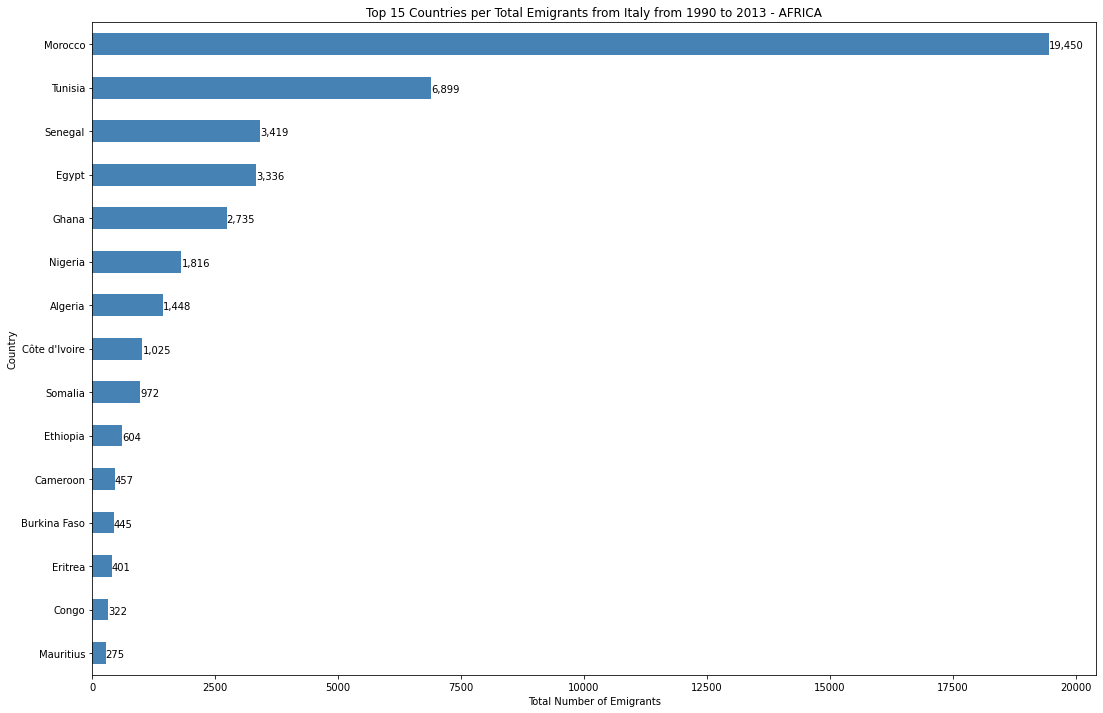

In [204]:
df_top15_e_total_africa.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Italy from 1990 to 2013 - AFRICA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_africa): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [205]:
df_top15_i_africa = df_italy_immigrants[df_italy_immigrants['Continent']=='Africa']
df_top15_i_africa.head(15)

Continent           Region         Development  1980  1981  \
Country                                                                    
Morocco          Africa  Northern Africa  Developing regions   0.0   0.0   
Egypt            Africa  Northern Africa  Developing regions   0.0   0.0   
Tunisia          Africa  Northern Africa  Developing regions   0.0   0.0   
Senegal          Africa   Western Africa  Developing regions   0.0   0.0   
Nigeria          Africa   Western Africa  Developing regions   0.0   0.0   
Ghana            Africa   Western Africa  Developing regions   0.0   0.0   
Côte d'Ivoire    Africa   Western Africa  Developing regions   0.0   0.0   
Algeria          Africa  Northern Africa  Developing regions   0.0   0.0   
Somalia          Africa   Eastern Africa  Developing regions   0.0   0.0   
Eritrea          Africa   Eastern Africa  Developing regions   0.0   0.0   
Ethiopia         Africa   Eastern Africa  Developing regions   0.0   0.0   
Burkina Faso     Africa   Western Africa  Developing regions   0.0   0.0   
Cameroon         Africa    Middle Africa  Developing regions   0.0   0.0   
Togo             Africa   Western Africa  Developing regions   0.0   0.0   
Congo            Africa    Middle Africa  Developing regions   0.0   0.0   

               1982  1983  1984  1985  1986  ...     2005     2006     2007  \
Country                                      ...                              
Morocco         0.0   0.0   0.0   0.0   0.0  ...  26057.0  21784.0  23483.0   
Egypt           0.0   0.0   0.0   0.0   0.0  ...   5584.0   5041.0   3726.0   
Tunisia         0.0   0.0   0.0   0.0   0.0  ...   4915.0   4414.0   4512.0   
Senegal         0.0   0.0   0.0   0.0   0.0  ...   2910.0   2280.0   2282.0   
Nigeria         0.0   0.0   0.0   0.0   0.0  ...   2664.0   2616.0   2475.0   
Ghana           0.0   0.0   0.0   0.0   0.0  ...   1969.0   1981.0   2107.0   
Côte d'Ivoire   0.0   0.0   0.0   0.0   0.0  ...   1009.0   1119.0   1474.0   
Algeria         0.0   0.0   0.0   0.0   0.0  ...   1190.0    976.0    920.0   
Somalia         0.0   0.0   0.0   0.0   0.0  ...    749.0    327.0    393.0   
Eritrea         0.0   0.0   0.0   0.0   0.0  ...   1556.0   1480.0   2714.0   
Ethiopia        0.0   0.0   0.0   0.0   0.0  ...    861.0   1071.0   1127.0   
Burkina Faso    0.0   0.0   0.0   0.0   0.0  ...    856.0    524.0    410.0   
Cameroon        0.0   0.0   0.0   0.0   0.0  ...    699.0    625.0    657.0   
Togo            0.0   0.0   0.0   0.0   0.0  ...    325.0    497.0    496.0   
Congo           0.0   0.0   0.0   0.0   0.0  ...    369.0    248.0    244.0   

                  2008     2009     2010     2011     2012     2013     Total  
Country                                                                        
Morocco        37275.0  33128.0  29960.0  23885.0  19590.0  19568.0  446187.0  
Egypt           5274.0   7977.0   9345.0   9572.0   8623.0   9754.0  107291.0  
Tunisia         6947.0   5692.0   6007.0   5888.0   5447.0   4313.0   97594.0  
Senegal         4770.0   4858.0   8851.0   6608.0   5493.0   6451.0   78893.0  
Nigeria         3717.0   3998.0   4842.0   4487.0   6739.0   6310.0   61652.0  
Ghana           4440.0   3177.0   3627.0   3134.0   4007.0   3503.0   46224.0  
Côte d'Ivoire   2255.0   1970.0   1915.0   1734.0   2715.0   1800.0   22497.0  
Algeria         1376.0   1132.0   1199.0   1089.0    944.0    935.0   20082.0  
Somalia         1070.0   1545.0   1185.0    711.0    868.0    982.0   14861.0  
Eritrea         1210.0   1586.0   1106.0    641.0    613.0    807.0   13875.0  
Ethiopia        1009.0    978.0    830.0    749.0    837.0    691.0   12926.0  
Burkina Faso    1334.0   1105.0   1255.0    913.0   1015.0    829.0   12488.0  
Cameroon         964.0   1141.0   1226.0    983.0   1262.0   1117.0   11524.0  
Togo             631.0    453.0    407.0    382.0    514.0    447.0    5070.0  
Congo            352.0    371.0    367.0    260.0    335.0    194.0    4674.0  

[15 rows x 38 co

In [206]:
df_top15_i_africa = df_top15_i_africa.head(15)
df_top15_i_africa

Continent           Region         Development  1980  1981  \
Country                                                                    
Morocco          Africa  Northern Africa  Developing regions   0.0   0.0   
Egypt            Africa  Northern Africa  Developing regions   0.0   0.0   
Tunisia          Africa  Northern Africa  Developing regions   0.0   0.0   
Senegal          Africa   Western Africa  Developing regions   0.0   0.0   
Nigeria          Africa   Western Africa  Developing regions   0.0   0.0   
Ghana            Africa   Western Africa  Developing regions   0.0   0.0   
Côte d'Ivoire    Africa   Western Africa  Developing regions   0.0   0.0   
Algeria          Africa  Northern Africa  Developing regions   0.0   0.0   
Somalia          Africa   Eastern Africa  Developing regions   0.0   0.0   
Eritrea          Africa   Eastern Africa  Developing regions   0.0   0.0   
Ethiopia         Africa   Eastern Africa  Developing regions   0.0   0.0   
Burkina Faso     Africa   Western Africa  Developing regions   0.0   0.0   
Cameroon         Africa    Middle Africa  Developing regions   0.0   0.0   
Togo             Africa   Western Africa  Developing regions   0.0   0.0   
Congo            Africa    Middle Africa  Developing regions   0.0   0.0   

               1982  1983  1984  1985  1986  ...     2005     2006     2007  \
Country                                      ...                              
Morocco         0.0   0.0   0.0   0.0   0.0  ...  26057.0  21784.0  23483.0   
Egypt           0.0   0.0   0.0   0.0   0.0  ...   5584.0   5041.0   3726.0   
Tunisia         0.0   0.0   0.0   0.0   0.0  ...   4915.0   4414.0   4512.0   
Senegal         0.0   0.0   0.0   0.0   0.0  ...   2910.0   2280.0   2282.0   
Nigeria         0.0   0.0   0.0   0.0   0.0  ...   2664.0   2616.0   2475.0   
Ghana           0.0   0.0   0.0   0.0   0.0  ...   1969.0   1981.0   2107.0   
Côte d'Ivoire   0.0   0.0   0.0   0.0   0.0  ...   1009.0   1119.0   1474.0   
Algeria         0.0   0.0   0.0   0.0   0.0  ...   1190.0    976.0    920.0   
Somalia         0.0   0.0   0.0   0.0   0.0  ...    749.0    327.0    393.0   
Eritrea         0.0   0.0   0.0   0.0   0.0  ...   1556.0   1480.0   2714.0   
Ethiopia        0.0   0.0   0.0   0.0   0.0  ...    861.0   1071.0   1127.0   
Burkina Faso    0.0   0.0   0.0   0.0   0.0  ...    856.0    524.0    410.0   
Cameroon        0.0   0.0   0.0   0.0   0.0  ...    699.0    625.0    657.0   
Togo            0.0   0.0   0.0   0.0   0.0  ...    325.0    497.0    496.0   
Congo           0.0   0.0   0.0   0.0   0.0  ...    369.0    248.0    244.0   

                  2008     2009     2010     2011     2012     2013     Total  
Country                                                                        
Morocco        37275.0  33128.0  29960.0  23885.0  19590.0  19568.0  446187.0  
Egypt           5274.0   7977.0   9345.0   9572.0   8623.0   9754.0  107291.0  
Tunisia         6947.0   5692.0   6007.0   5888.0   5447.0   4313.0   97594.0  
Senegal         4770.0   4858.0   8851.0   6608.0   5493.0   6451.0   78893.0  
Nigeria         3717.0   3998.0   4842.0   4487.0   6739.0   6310.0   61652.0  
Ghana           4440.0   3177.0   3627.0   3134.0   4007.0   3503.0   46224.0  
Côte d'Ivoire   2255.0   1970.0   1915.0   1734.0   2715.0   1800.0   22497.0  
Algeria         1376.0   1132.0   1199.0   1089.0    944.0    935.0   20082.0  
Somalia         1070.0   1545.0   1185.0    711.0    868.0    982.0   14861.0  
Eritrea         1210.0   1586.0   1106.0    641.0    613.0    807.0   13875.0  
Ethiopia        1009.0    978.0    830.0    749.0    837.0    691.0   12926.0  
Burkina Faso    1334.0   1105.0   1255.0    913.0   1015.0    829.0   12488.0  
Cameroon         964.0   1141.0   1226.0    983.0   1262.0   1117.0   11524.0  
Togo             631.0    453.0    407.0    382.0    514.0    447.0    5070.0  
Congo            352.0    371.0    367.0    260.0    335.0    194.0    4674.0  

[15 rows x 38 co

In [207]:
df_top15_i_africa.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_africa = df_top15_i_africa['Total']
df_top15_i_total_africa

Country
Congo              4674.0
Togo               5070.0
Cameroon          11524.0
Burkina Faso      12488.0
Ethiopia          12926.0
Eritrea           13875.0
Somalia           14861.0
Algeria           20082.0
Côte d'Ivoire     22497.0
Ghana             46224.0
Nigeria           61652.0
Senegal           78893.0
Tunisia           97594.0
Egypt            107291.0
Morocco          446187.0
Name: Total, dtype: float64

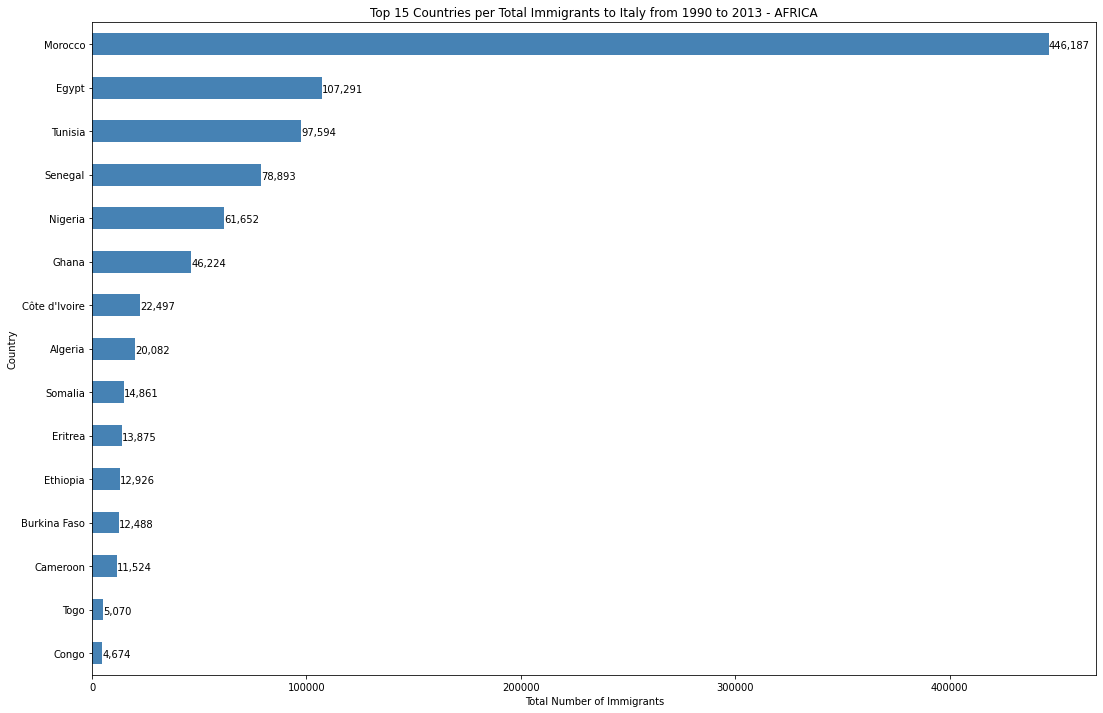

In [208]:
df_top15_i_total_africa.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Italy from 1990 to 2013 - AFRICA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_africa): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### Asia

In [209]:
df_top15_e_asia = df_italy_emigrants[df_italy_emigrants['Continent']=='Asia']
df_top15_e_asia.head(16)

Continent  \
Country                                                        
China (including Hong Kong Special Administrati...      Asia   
India                                                   Asia   
Bangladesh                                              Asia   
Pakistan                                                Asia   
Sri Lanka                                               Asia   
Philippines                                             Asia   
Japan                                                   Asia   
Turkey                                                  Asia   
Iran (Islamic Republic of)                              Asia   
Republic of Korea                                       Asia   
Thailand                                                Asia   
Israel                                                  Asia   
Lebanon                                                 Asia   
Syrian Arab Republic                                    Asia   
Indonesia                                               Asia   
Georgia                                                 Asia   

                                                                Region  \
Country                                                                  
China (including Hong Kong Special Administrati...        Eastern Asia   
India                                                    Southern Asia   
Bangladesh                                               Southern Asia   
Pakistan                                                 Southern Asia   
Sri Lanka                                                Southern Asia   
Philippines                                         South-Eastern Asia   
Japan                                                     Eastern Asia   
Turkey                                                    Western Asia   
Iran (Islamic Republic of)                               Southern Asia   
Republic of Korea                                         Eastern Asia   
Thailand                                            South-Eastern Asia   
Israel                                                    Western Asia   
Lebanon                                                   Western Asia   
Syrian Arab Republic                                      Western Asia   
Indonesia                                           South-Eastern Asia   
Georgia                                                   Western Asia   

                                                           Development  1980  \
Country                                                                        
China (including Hong Kong Special Administrati...  Developing regions   0.0   
India                                               Developing regions   0.0   
Bangladesh                                          Developing regions   0.0   
Pakistan                                            Developing regions   0.0   
Sri Lanka                                           Developing regions   0.0   
Philippines                                         Developing regions   0.0   
Japan                                                Developed regions   0.0   
Turkey                                              Developing regions   0.0   
Iran (Islamic Republic of)                          Developing regions   0.0   
Republic of Korea                                   Developing regions   0.0   
Thailand                                            Developing regions   0.0   
Israel                                              Developing regions   0.0   
Lebanon                                             Developing regions   0.0   
Syrian Arab Republic                                Developing regions   0.0   
Indonesia                                           Developing regions   0.0   
Georgia                                             Developing regions   0.0   

                                                    1981  1982  1983  1984  \
Country                                       

In [210]:
df_top15_e_asia = df_top15_e_asia.head(15)
df_top15_e_asia.rename(index={'China (including Hong Kong Special Administrative Region)':'China','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria'}, inplace=True)
df_top15_e_asia

Continent              Region         Development  1980  \
Country                                                                     
China                  Asia        Eastern Asia  Developing regions   0.0   
India                  Asia       Southern Asia  Developing regions   0.0   
Bangladesh             Asia       Southern Asia  Developing regions   0.0   
Pakistan               Asia       Southern Asia  Developing regions   0.0   
Sri Lanka              Asia       Southern Asia  Developing regions   0.0   
Philippines            Asia  South-Eastern Asia  Developing regions   0.0   
Japan                  Asia        Eastern Asia   Developed regions   0.0   
Turkey                 Asia        Western Asia  Developing regions   0.0   
Iran                   Asia       Southern Asia  Developing regions   0.0   
Republic of Korea      Asia        Eastern Asia  Developing regions   0.0   
Thailand               Asia  South-Eastern Asia  Developing regions   0.0   
Israel                 Asia        Western Asia  Developing regions   0.0   
Lebanon                Asia        Western Asia  Developing regions   0.0   
Syria                  Asia        Western Asia  Developing regions   0.0   
Indonesia              Asia  South-Eastern Asia  Developing regions   0.0   

                   1981  1982  1983  1984  1985  1986  ...   2005   2006  \
Country                                                ...                 
China               0.0   0.0   0.0   0.0   0.0   0.0  ...  759.0  904.0   
India               0.0   0.0   0.0   0.0   0.0   0.0  ...  440.0  427.0   
Bangladesh          0.0   0.0   0.0   0.0   0.0   0.0  ...  407.0  488.0   
Pakistan            0.0   0.0   0.0   0.0   0.0   0.0  ...  239.0  315.0   
Sri Lanka           0.0   0.0   0.0   0.0   0.0   0.0  ...  279.0  277.0   
Philippines         0.0   0.0   0.0   0.0   0.0   0.0  ...  278.0  287.0   
Japan               0.0   0.0   0.0   0.0   0.0   0.0  ...  319.0  274.0   
Turkey              0.0   0.0   0.0   0.0   0.0   0.0  ...   55.0   75.0   
Iran                0.0   0.0   0.0   0.0   0.0   0.0  ...   32.0   15.0   
Republic of Korea   0.0   0.0   0.0   0.0   0.0   0.0  ...   80.0   31.0   
Thailand            0.0   0.0   0.0   0.0   0.0   0.0  ...   31.0   52.0   
Israel              0.0   0.0   0.0   0.0   0.0   0.0  ...   17.0   36.0   
Lebanon             0.0   0.0   0.0   0.0   0.0   0.0  ...   15.0   22.0   
Syria               0.0   0.0   0.0   0.0   0.0   0.0  ...   19.0   17.0   
Indonesia           0.0   0.0   0.0   0.0   0.0   0.0  ...   28.0   22.0   

                    2007   2008   2009    2010    2011    2012    2013  \
Country                                                                  
China              760.0  728.0  879.0  1517.0  1672.0  1773.0  1943.0   
India              445.0  403.0  476.0  1011.0  1058.0  1285.0  1485.0   
Bangladesh         569.0  476.0  551.0  1039.0   680.0   770.0   739.0   
Pakistan           395.0  322.0  365.0   584.0   577.0   598.0   785.0   
Sri Lanka          257.0  270.0  326.0   442.0   497.0   596.0   692.0   
Philippines        235.0  202.0  240.0   298.0   289.0   439.0   401.0   
Japan              234.0  256.0  309.0   240.0   247.0   258.0   256.0   
Turkey              71.0   71.0   87.0   100.0   124.0   195.0   224.0   
Iran                13.0   12.0   14.0    12.0    31.0    40.0    29.0   
Republic of Korea   50.0   47.0   53.0    62.0    85.0    67.0    97.0   
Thailand            40.0   43.0   53.0    58.0    37.0    58.0    77.0   
Israel              22.0   30.0   34.0    32.0    24.0    26.0    37.0   
Lebanon             56.0   17.0   19.0    40.0    38.0    27.0    26.0   
Syria               12.0   11.0   13.0    27.0    39.0    21.0    52.0   
Indonesia           18.0    3.0    4.0    30.0    26.0    44.0    22.0   

                     Total  
Country                     
China              12474.0  
India               8585.0  
Bangladesh          6457.0  
Pakistan   

In [211]:
df_top15_e_asia.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_asia = df_top15_e_asia['Total']
df_top15_e_total_asia

Country
Indonesia              257.0
Syria                  285.0
Lebanon                379.0
Israel                 425.0
Thailand               594.0
Republic of Korea      890.0
Iran                   901.0
Turkey                1229.0
Japan                 4475.0
Philippines           4487.0
Sri Lanka             4794.0
Pakistan              4996.0
Bangladesh            6457.0
India                 8585.0
China                12474.0
Name: Total, dtype: float64

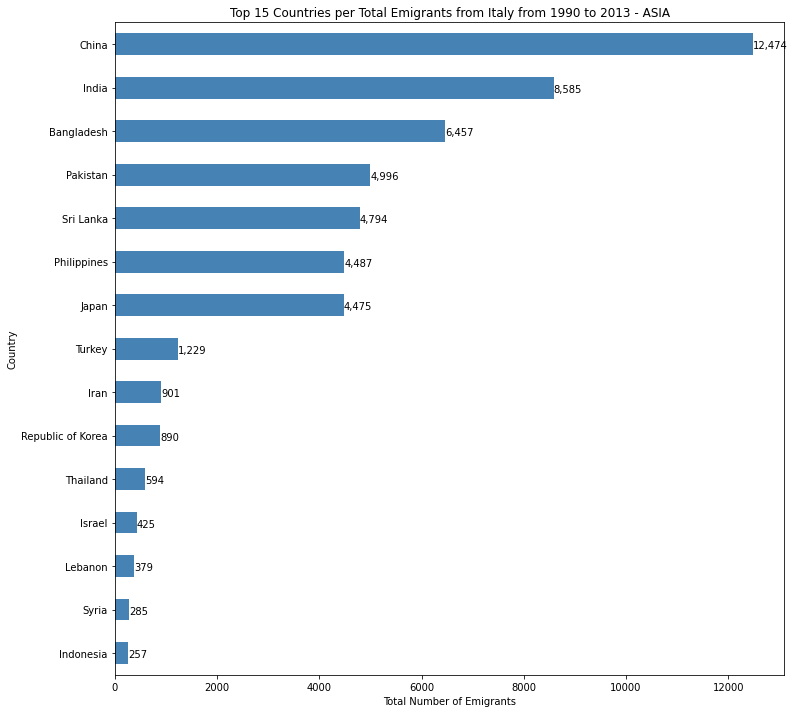

In [212]:
df_top15_e_total_asia.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Italy from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_asia): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [213]:
df_top15_i_asia = df_italy_immigrants[df_italy_immigrants['Continent']=='Asia']
df_top15_i_asia.head(15)

Continent              Region         Development  \
Country                                                                        
China                           Asia        Eastern Asia  Developing regions   
India                           Asia       Southern Asia  Developing regions   
Philippines                     Asia  South-Eastern Asia  Developing regions   
Bangladesh                      Asia       Southern Asia  Developing regions   
Pakistan                        Asia       Southern Asia  Developing regions   
Sri Lanka                       Asia       Southern Asia  Developing regions   
Turkey                          Asia        Western Asia  Developing regions   
Georgia                         Asia        Western Asia  Developing regions   
Iran (Islamic Republic of)      Asia       Southern Asia  Developing regions   
Japan                           Asia        Eastern Asia   Developed regions   
Afghanistan                     Asia       Southern Asia  Developing regions   
Thailand                        Asia  South-Eastern Asia  Developing regions   
Syrian Arab Republic            Asia        Western Asia  Developing regions   
Lebanon                         Asia        Western Asia  Developing regions   
Republic of Korea               Asia        Eastern Asia  Developing regions   

                            1980  1981  1982  1983  1984  1985  1986  ...  \
Country                                                               ...   
China                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
India                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Philippines                  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Bangladesh                   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Pakistan                     0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Sri Lanka                    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Turkey                       0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Georgia                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Iran (Islamic Republic of)   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Japan                        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Afghanistan                  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Thailand                     0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Syrian Arab Republic         0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Lebanon                      0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Republic of Korea            0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

                               2005     2006    2007     2008     2009  \
Country                                                                  
China                       14732.0  13579.0  9719.0  12791.0  16843.0   
India                        7172.0   6292.0  7112.0  12469.0  12769.0   
Philippines                  5546.0   4428.0  3951.0   7849.0   9995.0   
Bangladesh                   5781.0   5631.0  5223.0   9332.0   8902.0   
Pakistan                     6457.0   4088.0  3548.0   5706.0   7858.0   
Sri Lanka                    3924.0   3676.0  3778.0   6610.0   6317.0   
Turkey                       1426.0   1290.0  1326.0   1441.0   1394.0   
Georgia                       111.0    136.0   252.0    509.0   1165.0   
Iran (Islamic Republic of)    395.0    424.0   377.0    483.0    611.0   
Japan                         792.0    616.0   484.0    590.0    660.0   
Afghanistan                   145.0    171.0   856.0   1175.0   1017.0   
Thailand                      435.0    435.0   509.0    572.0    612.0   
Syrian Arab Republic          219.0    225.0   232.0    300.0    271.0   
Lebanon                       288.0    304.0   363.0    404.0    334.0   
Republic of Korea             311.0    262.0   247.0    251.0    282.0   

                               2010     2011     2012     2013     Total  
Country               

In [214]:
df_top15_i_asia = df_top15_i_asia.head(15)
df_top15_i_asia.rename(index={'Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria'}, inplace=True)
df_top15_i_asia

Continent              Region         Development  1980  \
Country                                                                     
China                  Asia        Eastern Asia  Developing regions   0.0   
India                  Asia       Southern Asia  Developing regions   0.0   
Philippines            Asia  South-Eastern Asia  Developing regions   0.0   
Bangladesh             Asia       Southern Asia  Developing regions   0.0   
Pakistan               Asia       Southern Asia  Developing regions   0.0   
Sri Lanka              Asia       Southern Asia  Developing regions   0.0   
Turkey                 Asia        Western Asia  Developing regions   0.0   
Georgia                Asia        Western Asia  Developing regions   0.0   
Iran                   Asia       Southern Asia  Developing regions   0.0   
Japan                  Asia        Eastern Asia   Developed regions   0.0   
Afghanistan            Asia       Southern Asia  Developing regions   0.0   
Thailand               Asia  South-Eastern Asia  Developing regions   0.0   
Syria                  Asia        Western Asia  Developing regions   0.0   
Lebanon                Asia        Western Asia  Developing regions   0.0   
Republic of Korea      Asia        Eastern Asia  Developing regions   0.0   

                   1981  1982  1983  1984  1985  1986  ...     2005     2006  \
Country                                                ...                     
China               0.0   0.0   0.0   0.0   0.0   0.0  ...  14732.0  13579.0   
India               0.0   0.0   0.0   0.0   0.0   0.0  ...   7172.0   6292.0   
Philippines         0.0   0.0   0.0   0.0   0.0   0.0  ...   5546.0   4428.0   
Bangladesh          0.0   0.0   0.0   0.0   0.0   0.0  ...   5781.0   5631.0   
Pakistan            0.0   0.0   0.0   0.0   0.0   0.0  ...   6457.0   4088.0   
Sri Lanka           0.0   0.0   0.0   0.0   0.0   0.0  ...   3924.0   3676.0   
Turkey              0.0   0.0   0.0   0.0   0.0   0.0  ...   1426.0   1290.0   
Georgia             0.0   0.0   0.0   0.0   0.0   0.0  ...    111.0    136.0   
Iran                0.0   0.0   0.0   0.0   0.0   0.0  ...    395.0    424.0   
Japan               0.0   0.0   0.0   0.0   0.0   0.0  ...    792.0    616.0   
Afghanistan         0.0   0.0   0.0   0.0   0.0   0.0  ...    145.0    171.0   
Thailand            0.0   0.0   0.0   0.0   0.0   0.0  ...    435.0    435.0   
Syria               0.0   0.0   0.0   0.0   0.0   0.0  ...    219.0    225.0   
Lebanon             0.0   0.0   0.0   0.0   0.0   0.0  ...    288.0    304.0   
Republic of Korea   0.0   0.0   0.0   0.0   0.0   0.0  ...    311.0    262.0   

                     2007     2008     2009     2010     2011     2012  \
Country                                                                  
China              9719.0  12791.0  16843.0  22866.0  20055.0  20463.0   
India              7112.0  12469.0  12769.0  15246.0  13327.0  11158.0   
Philippines        3951.0   7849.0   9995.0  10745.0  10351.0   9893.0   
Bangladesh         5223.0   9332.0   8902.0   9688.0  10348.0  10144.0   
Pakistan           3548.0   5706.0   7858.0  10816.0   7452.0   8754.0   
Sri Lanka          3778.0   6610.0   6317.0   7105.0   6789.0   7138.0   
Turkey             1326.0   1441.0   1394.0   1483.0   1397.0   1202.0   
Georgia             252.0    509.0   1165.0   4008.0   1772.0   1706.0   
Iran                377.0    483.0    611.0    744.0    940.0   1378.0   
Japan               484.0    590.0    660.0    617.0    593.0    574.0   
Afghanistan         856.0   1175.0   1017.0    694.0    847.0   1109.0   
Thailand            509.0    572.0    612.0    621.0    604.0    540.0   
Syria               232.0    300.0    271.0    350.0    331.0    452.0   
Lebanon             363.0    404.0    334.0    314.0    284.0    286.0   
Republic of Korea   247.0    251.0    282.0    264.0    315.0    315.0   

                      2013     Total  
Country                               
China     

In [215]:
df_top15_i_asia.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_asia = df_top15_i_asia['Total']
df_top15_i_total_asia

Country
Republic of Korea      4170.0
Lebanon                4291.0
Syria                  4350.0
Thailand               6820.0
Afghanistan            7555.0
Japan                  9810.0
Iran                   9882.0
Georgia               12427.0
Turkey                18681.0
Sri Lanka             81685.0
Pakistan              89957.0
Bangladesh           106364.0
Philippines          125759.0
India                136744.0
China                205332.0
Name: Total, dtype: float64

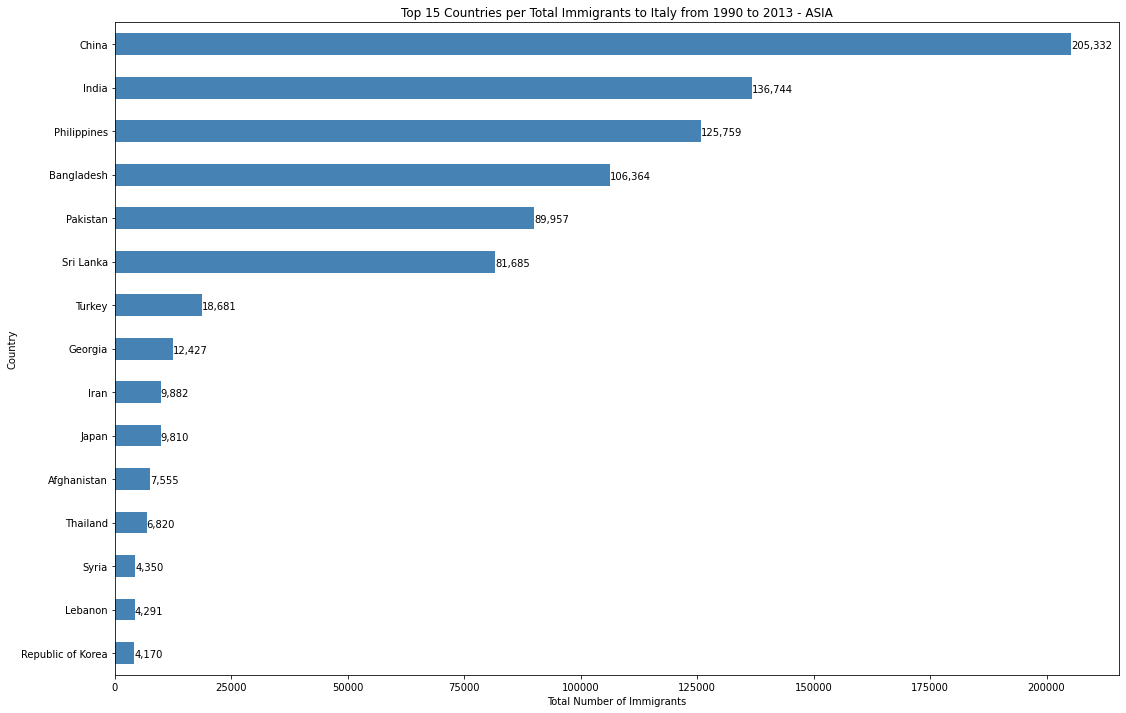

In [216]:
df_top15_i_total_asia.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Italy from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_asia): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### America

In [217]:
df_top15_e_america = df_italy_emigrants[(df_italy_emigrants['Continent']=='Latin America and the Caribbean') | (df_italy_emigrants['Continent']=='Northern America')]
df_top15_e_america.head(15)

Continent  \
Country                                                               
United States of America                           Northern America   
Brazil                              Latin America and the Caribbean   
Argentina                           Latin America and the Caribbean   
Ecuador                             Latin America and the Caribbean   
Peru                                Latin America and the Caribbean   
Colombia                            Latin America and the Caribbean   
Dominican Republic                  Latin America and the Caribbean   
Canada                                             Northern America   
Cuba                                Latin America and the Caribbean   
Venezuela (Bolivarian Republic of)  Latin America and the Caribbean   
Mexico                              Latin America and the Caribbean   
Bolivia (Plurinational State of)    Latin America and the Caribbean   
Chile                               Latin America and the Caribbean   
Uruguay                             Latin America and the Caribbean   
El Salvador                         Latin America and the Caribbean   

                                              Region         Development  \
Country                                                                    
United States of America            Northern America   Developed regions   
Brazil                                 South America  Developing regions   
Argentina                              South America  Developing regions   
Ecuador                                South America  Developing regions   
Peru                                   South America  Developing regions   
Colombia                               South America  Developing regions   
Dominican Republic                         Caribbean  Developing regions   
Canada                              Northern America   Developed regions   
Cuba                                       Caribbean  Developing regions   
Venezuela (Bolivarian Republic of)     South America  Developing regions   
Mexico                               Central America  Developing regions   
Bolivia (Plurinational State of)       South America  Developing regions   
Chile                                  South America  Developing regions   
Uruguay                                South America  Developing regions   
El Salvador                          Central America  Developing regions   

                                    1980  1981  1982  1983  1984  1985  1986  \
Country                                                                        
United States of America             0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Argentina                            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador                              0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Colombia                             0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Dominican Republic                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Canada                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Cuba                                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Venezuela (Bolivarian Republic of)   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Mexico                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Bolivia (Plurinational State of)     0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Chile                                0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Uruguay                              0.0   0.0   0.0   0.0   0.0   0.0   0.0   
El Salvador                          0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                                    ...   2005   2006   2007   2008   2009  \
Country                             ...                                      
United States of America            ... 

In [218]:
df_top15_e_america = df_top15_e_america.head(15)
df_top15_e_america.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top15_e_america

Continent            Region  \
Country                                                                 
USA                                Northern America  Northern America   
Brazil              Latin America and the Caribbean     South America   
Argentina           Latin America and the Caribbean     South America   
Ecuador             Latin America and the Caribbean     South America   
Peru                Latin America and the Caribbean     South America   
Colombia            Latin America and the Caribbean     South America   
Dominican Republic  Latin America and the Caribbean         Caribbean   
Canada                             Northern America  Northern America   
Cuba                Latin America and the Caribbean         Caribbean   
Venezuela           Latin America and the Caribbean     South America   
Mexico              Latin America and the Caribbean   Central America   
Bolivia             Latin America and the Caribbean     South America   
Chile               Latin America and the Caribbean     South America   
Uruguay             Latin America and the Caribbean     South America   
El Salvador         Latin America and the Caribbean   Central America   

                           Development  1980  1981  1982  1983  1984  1985  \
Country                                                                      
USA                  Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Brazil              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Argentina           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador             Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Colombia            Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Dominican Republic  Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Canada               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Cuba                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Venezuela           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Mexico              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Bolivia             Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Chile               Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Uruguay             Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
El Salvador         Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   

                    1986  ...   2005   2006   2007   2008   2009   2010  \
Country                   ...                                             
USA                  0.0  ...  412.0  406.0  344.0  295.0  354.0  423.0   
Brazil               0.0  ...  386.0  478.0  495.0  637.0  758.0  670.0   
Argentina            0.0  ...  274.0  325.0  293.0  261.0  330.0  179.0   
Ecuador              0.0  ...  188.0  189.0  192.0  293.0  334.0  434.0   
Peru                 0.0  ...  148.0  167.0  132.0  163.0  181.0  353.0   
Colombia             0.0  ...  117.0  106.0  169.0  163.0  201.0  145.0   
Dominican Republic   0.0  ...   93.0  103.0  102.0  118.0  147.0  144.0   
Canada               0.0  ...   59.0   59.0   94.0   45.0   56.0   52.0   
Cuba                 0.0  ...   61.0   74.0  121.0  116.0  137.0  120.0   
Venezuela            0.0  ...   79.0   65.0   54.0   75.0   90.0   70.0   
Mexico               0.0  ...   52.0   99.0   81.0   56.0   62.0   73.0   
Bolivia              0.0  ...   11.0   28.0   33.0   47.0   63.0   77.0   
Chile                0.0  ...   41.0   37.0   34.0   38.0   45.0   31.0   
Uruguay              0.0  ...   24.0   33.0   32.0   27.0   30.0   22.0   
El Salvador          0.0  ...   16.0   18.0   10.0    5.0    6.0    8.0   

                     2011   2012   2013   Total  
Country                                          
USA                 419.0  391.0  505.0  9910.0  
Brazil              620.0  753.0  724.0  8008.0

In [219]:
df_top15_e_america.sort_values(by='Total', ascending=True, inplace=True)
df_top15_e_total_america = df_top15_e_america['Total']
df_top15_e_total_america

Country
El Salvador            203.0
Uruguay                285.0
Chile                  576.0
Bolivia                649.0
Mexico                 948.0
Venezuela             1335.0
Cuba                  1392.0
Canada                1521.0
Dominican Republic    1637.0
Colombia              1887.0
Peru                  3368.0
Ecuador               3757.0
Argentina             4297.0
Brazil                8008.0
USA                   9910.0
Name: Total, dtype: float64

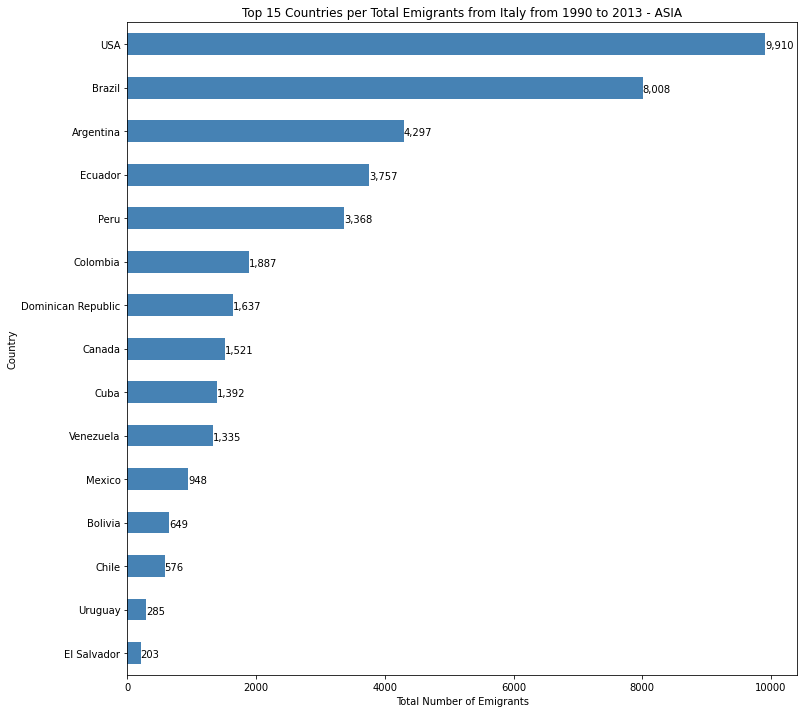

In [220]:
df_top15_e_total_america.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Italy from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_e_total_america): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [221]:
df_top15_i_america = df_italy_immigrants[(df_italy_immigrants['Continent']=='Latin America and the Caribbean') | (df_italy_immigrants['Continent']=='Northern America')]
df_top15_i_america.head(15)

Continent  \
Country                                                               
Brazil                              Latin America and the Caribbean   
Peru                                Latin America and the Caribbean   
Ecuador                             Latin America and the Caribbean   
Argentina                           Latin America and the Caribbean   
Dominican Republic                  Latin America and the Caribbean   
Cuba                                Latin America and the Caribbean   
Colombia                            Latin America and the Caribbean   
United States of America                           Northern America   
Bolivia (Plurinational State of)    Latin America and the Caribbean   
Venezuela (Bolivarian Republic of)  Latin America and the Caribbean   
El Salvador                         Latin America and the Caribbean   
Mexico                              Latin America and the Caribbean   
Canada                                             Northern America   
Chile                               Latin America and the Caribbean   
Uruguay                             Latin America and the Caribbean   

                                              Region         Development  \
Country                                                                    
Brazil                                 South America  Developing regions   
Peru                                   South America  Developing regions   
Ecuador                                South America  Developing regions   
Argentina                              South America  Developing regions   
Dominican Republic                         Caribbean  Developing regions   
Cuba                                       Caribbean  Developing regions   
Colombia                               South America  Developing regions   
United States of America            Northern America   Developed regions   
Bolivia (Plurinational State of)       South America  Developing regions   
Venezuela (Bolivarian Republic of)     South America  Developing regions   
El Salvador                          Central America  Developing regions   
Mexico                               Central America  Developing regions   
Canada                              Northern America   Developed regions   
Chile                                  South America  Developing regions   
Uruguay                                South America  Developing regions   

                                    1980  1981  1982  1983  1984  1985  1986  \
Country                                                                        
Brazil                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador                              0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Argentina                            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Dominican Republic                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Cuba                                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Colombia                             0.0   0.0   0.0   0.0   0.0   0.0   0.0   
United States of America             0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Bolivia (Plurinational State of)     0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Venezuela (Bolivarian Republic of)   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
El Salvador                          0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Mexico                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Canada                               0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Chile                                0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Uruguay                              0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                                    ...    2005     2006     2007     2008  \
Country                             ...                                      
Brazil                              ... 

In [222]:
df_top15_i_america = df_top15_i_america.head(15)
df_top15_i_america.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top15_i_america

Continent            Region  \
Country                                                                 
Brazil              Latin America and the Caribbean     South America   
Peru                Latin America and the Caribbean     South America   
Ecuador             Latin America and the Caribbean     South America   
Argentina           Latin America and the Caribbean     South America   
Dominican Republic  Latin America and the Caribbean         Caribbean   
Cuba                Latin America and the Caribbean         Caribbean   
Colombia            Latin America and the Caribbean     South America   
USA                                Northern America  Northern America   
Bolivia             Latin America and the Caribbean     South America   
Venezuela           Latin America and the Caribbean     South America   
El Salvador         Latin America and the Caribbean   Central America   
Mexico              Latin America and the Caribbean   Central America   
Canada                             Northern America  Northern America   
Chile               Latin America and the Caribbean     South America   
Uruguay             Latin America and the Caribbean     South America   

                           Development  1980  1981  1982  1983  1984  1985  \
Country                                                                      
Brazil              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Peru                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Ecuador             Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Argentina           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Dominican Republic  Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Cuba                Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Colombia            Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
USA                  Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Bolivia             Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Venezuela           Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
El Salvador         Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Mexico              Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Canada               Developed regions   0.0   0.0   0.0   0.0   0.0   0.0   
Chile               Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   
Uruguay             Developing regions   0.0   0.0   0.0   0.0   0.0   0.0   

                    1986  ...    2005     2006     2007     2008     2009  \
Country                   ...                                               
Brazil               0.0  ...  8796.0  10183.0  11863.0  12645.0   9658.0   
Peru                 0.0  ...  5402.0   4879.0   4451.0   7182.0  10421.0   
Ecuador              0.0  ...  8278.0   6047.0   4414.0   6874.0   6324.0   
Argentina            0.0  ...  2746.0   1927.0   1806.0   1937.0   1434.0   
Dominican Republic   0.0  ...  1920.0   1480.0   1853.0   3082.0   3319.0   
Cuba                 0.0  ...  2072.0   2100.0   2176.0   2802.0   2274.0   
Colombia             0.0  ...  1881.0   1682.0   1704.0   2160.0   2068.0   
USA                  0.0  ...  1374.0   1338.0   1246.0   1447.0   1456.0   
Bolivia              0.0  ...   738.0    625.0    842.0   1143.0   1625.0   
Venezuela            0.0  ...   805.0    627.0    790.0    848.0    704.0   
El Salvador          0.0  ...   418.0    328.0    258.0    433.0    691.0   
Mexico               0.0  ...   423.0    384.0    389.0    423.0    518.0   
Canada               0.0  ...   268.0    264.0    271.0    306.0    275.0   
Chile                0.0  ...   300.0    265.0    260.0    339.0    266.0   
Uruguay              0.0  ...   316.0    225.0    275.0    241.0    187.0   

                       2010    2011    2012    2013     Total  
Country                                                        
Brazil               8566.0  7097.0

In [223]:
df_top15_i_america.sort_values(by='Total', ascending=True, inplace=True)
df_top15_i_total_america = df_top15_i_america['Total']
df_top15_i_total_america

Country
Uruguay                 2844.0
Chile                   4119.0
Canada                  5435.0
Mexico                  6211.0
El Salvador             9445.0
Venezuela              12246.0
Bolivia                14868.0
USA                    28407.0
Colombia               28469.0
Cuba                   29949.0
Dominican Republic     31148.0
Argentina              36501.0
Ecuador                94542.0
Peru                  110229.0
Brazil                112664.0
Name: Total, dtype: float64

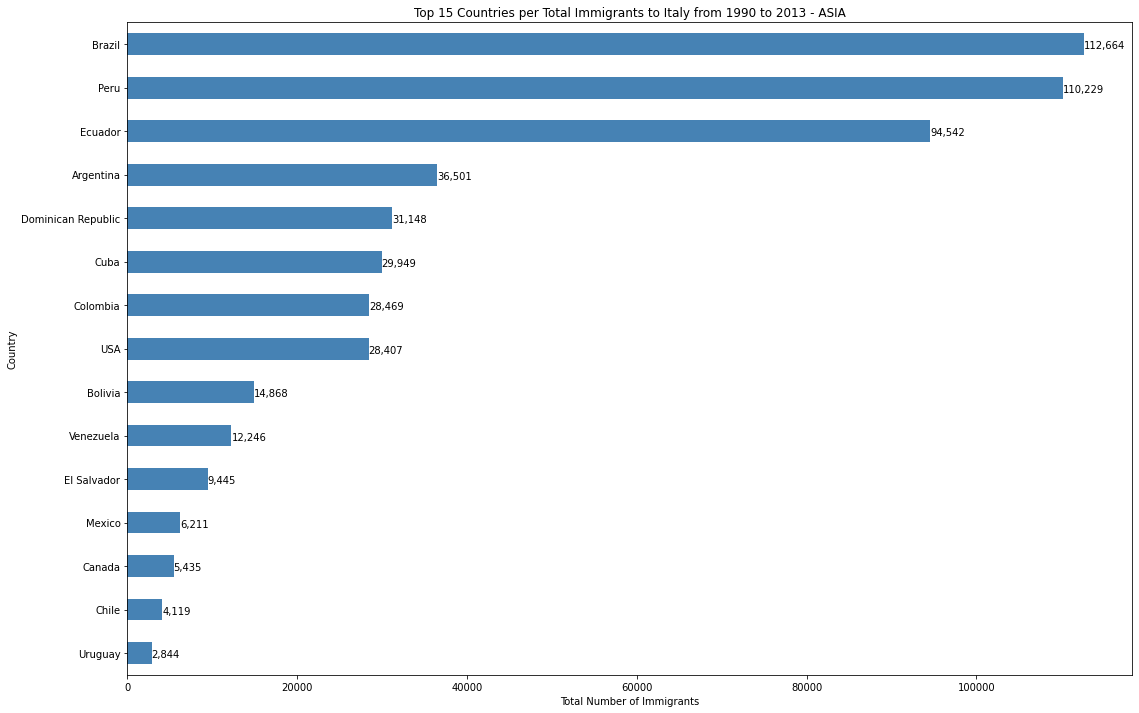

In [224]:
df_top15_i_total_america.plot(kind='barh', figsize=(18, 12), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Italy from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15_i_total_america): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### Oceania

In [225]:
df_top15_e_oceania = df_italy_emigrants[df_italy_emigrants['Continent']=='Oceania']
df_top15_e_oceania.head(15)

Continent                     Region  \
Country                                                          
Australia                   Oceania  Australia and New Zealand   
New Zealand                 Oceania  Australia and New Zealand   
Samoa                       Oceania                  Polynesia   
Fiji                        Oceania                  Melanesia   
Papua New Guinea            Oceania                  Melanesia   
Wallis and Futuna Islands   Oceania                  Polynesia   
Vanuatu                     Oceania                  Melanesia   
Palau                       Oceania                 Micronesia   
Tonga                       Oceania                  Polynesia   

                                  Development  1980  1981  1982  1983  1984  \
Country                                                                       
Australia                   Developed regions   0.0   0.0   0.0   0.0   0.0   
New Zealand                 Developed regions   0.0   0.0   0.0   0.0   0.0   
Samoa                      Developing regions   0.0   0.0   0.0   0.0   0.0   
Fiji                       Developing regions   0.0   0.0   0.0   0.0   0.0   
Papua New Guinea           Developing regions   0.0   0.0   0.0   0.0   0.0   
Wallis and Futuna Islands  Developing regions   0.0   0.0   0.0   0.0   0.0   
Vanuatu                    Developing regions   0.0   0.0   0.0   0.0   0.0   
Palau                      Developing regions   0.0   0.0   0.0   0.0   0.0   
Tonga                      Developing regions   0.0   0.0   0.0   0.0   0.0   

                           1985  1986  ...  2005  2006  2007  2008  2009  \
Country                                ...                                 
Australia                   0.0   0.0  ...  90.0  63.0  58.0  36.0  39.0   
New Zealand                 0.0   0.0  ...   4.0   7.0   9.0  20.0  24.0   
Samoa                       0.0   0.0  ...  10.0   2.0   0.0   5.0   7.0   
Fiji                        0.0   0.0  ...   0.0   0.0   1.0   0.0   0.0   
Papua New Guinea            0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
Wallis and Futuna Islands   0.0   0.0  ...   0.0   0.0   0.0   1.0   1.0   
Vanuatu                     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
Palau                       0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
Tonga                       0.0   0.0  ...   0.0   1.0   0.0   0.0   0.0   

                           2010  2011  2012  2013  Total  
Country                                                   
Australia                  65.0  56.0  55.0  72.0  971.0  
New Zealand                14.0  25.0  19.0  13.0  181.0  
Samoa                       0.0   0.0   0.0   0.0   30.0  
Fiji                        3.0   1.0   0.0   0.0   10.0  
Papua New Guinea            0.0   2.0   1.0   0.0    3.0  
Wallis and Futuna Islands   1.0   0.0   0.0   0.0    3.0  
Vanuatu                     0.0   0.0   0.0   0.0    1.0  
Palau                       0.0   0.0   0.0   0.0    1.0  
Tonga                       0.0   0.0   0.0   0.0    1.0  

[9 rows x 38 columns]

In [226]:
df_top5_e_oceania = df_top15_e_oceania.head(5)
# df_top15_e_oceania.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top5_e_oceania

Continent                     Region         Development  \
Country                                                                     
Australia          Oceania  Australia and New Zealand   Developed regions   
New Zealand        Oceania  Australia and New Zealand   Developed regions   
Samoa              Oceania                  Polynesia  Developing regions   
Fiji               Oceania                  Melanesia  Developing regions   
Papua New Guinea   Oceania                  Melanesia  Developing regions   

                  1980  1981  1982  1983  1984  1985  1986  ...  2005  2006  \
Country                                                     ...               
Australia          0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  90.0  63.0   
New Zealand        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   4.0   7.0   
Samoa              0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  10.0   2.0   
Fiji               0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
Papua New Guinea   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   

                  2007  2008  2009  2010  2011  2012  2013  Total  
Country                                                            
Australia         58.0  36.0  39.0  65.0  56.0  55.0  72.0  971.0  
New Zealand        9.0  20.0  24.0  14.0  25.0  19.0  13.0  181.0  
Samoa              0.0   5.0   7.0   0.0   0.0   0.0   0.0   30.0  
Fiji               1.0   0.0   0.0   3.0   1.0   0.0   0.0   10.0  
Papua New Guinea   0.0   0.0   0.0   0.0   2.0   1.0   0.0    3.0  

[5 rows x 38 columns]

In [227]:
df_top5_e_oceania.sort_values(by='Total', ascending=True, inplace=True)
df_top5_e_total_oceania = df_top5_e_oceania['Total']
df_top5_e_total_oceania

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Papua New Guinea      3.0
Fiji                 10.0
Samoa                30.0
New Zealand         181.0
Australia           971.0
Name: Total, dtype: float64

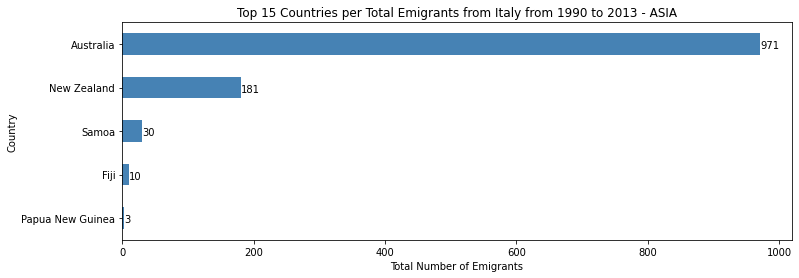

In [228]:
df_top5_e_total_oceania.plot(kind='barh', figsize=(12, 4), color='steelblue')

plt.xlabel('Total Number of Emigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Emigrants from Italy from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top5_e_total_oceania): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

------------

In [229]:
df_top15_i_oceania = df_italy_immigrants[df_italy_immigrants['Continent']=='Oceania']
df_top15_i_oceania.head(15)

Continent                     Region  \
Country                                                                 
Australia                          Oceania  Australia and New Zealand   
New Zealand                        Oceania  Australia and New Zealand   
Samoa                              Oceania                  Polynesia   
Papua New Guinea                   Oceania                  Melanesia   
Fiji                               Oceania                  Melanesia   
Palau                              Oceania                 Micronesia   
Tonga                              Oceania                  Polynesia   
Marshall Islands                   Oceania                 Micronesia   
Vanuatu                            Oceania                  Melanesia   
Kiribati                           Oceania                 Micronesia   
Solomon Islands                    Oceania                  Melanesia   
Micronesia (Federated States of)   Oceania                 Micronesia   
Tuvalu                             Oceania                  Polynesia   
Nauru                              Oceania                 Micronesia   

                                         Development  1980  1981  1982  1983  \
Country                                                                        
Australia                          Developed regions   0.0   0.0   0.0   0.0   
New Zealand                        Developed regions   0.0   0.0   0.0   0.0   
Samoa                             Developing regions   0.0   0.0   0.0   0.0   
Papua New Guinea                  Developing regions   0.0   0.0   0.0   0.0   
Fiji                              Developing regions   0.0   0.0   0.0   0.0   
Palau                             Developing regions   0.0   0.0   0.0   0.0   
Tonga                             Developing regions   0.0   0.0   0.0   0.0   
Marshall Islands                  Developing regions   0.0   0.0   0.0   0.0   
Vanuatu                           Developing regions   0.0   0.0   0.0   0.0   
Kiribati                          Developing regions   0.0   0.0   0.0   0.0   
Solomon Islands                   Developing regions   0.0   0.0   0.0   0.0   
Micronesia (Federated States of)  Developing regions   0.0   0.0   0.0   0.0   
Tuvalu                            Developing regions   0.0   0.0   0.0   0.0   
Nauru                             Developing regions   0.0   0.0   0.0   0.0   

                                  1984  1985  1986  ...   2005   2006   2007  \
Country                                             ...                        
Australia                          0.0   0.0   0.0  ...  290.0  269.0  238.0   
New Zealand                        0.0   0.0   0.0  ...   31.0   38.0   46.0   
Samoa                              0.0   0.0   0.0  ...    3.0    4.0    8.0   
Papua New Guinea                   0.0   0.0   0.0  ...    2.0    0.0    1.0   
Fiji                               0.0   0.0   0.0  ...    1.0    3.0    0.0   
Palau                              0.0   0.0   0.0  ...    2.0    1.0    0.0   
Tonga                              0.0   0.0   0.0  ...    1.0    1.0    0.0   
Marshall Islands                   0.0   0.0   0.0  ...    1.0    0.0    0.0   
Vanuatu                            0.0   0.0   0.0  ...    2.0    0.0    0.0   
Kiribati                           0.0   0.0   0.0  ...    1.0    0.0    1.0   
Solomon Islands                    0.0   0.0   0.0  ...    0.0    0.0    0.0   
Micronesia (Federated States of)   0.0   0.0   0.0  ...    0.0    0.0    4.0   
Tuvalu                             0.0   0.0   0.0  ...    0.0    0.0    0.0   
Nauru                              0.0   0.0   0.0  ...    0.0    0.0    1.0   

                                   2008   2009   2010   2011   2012   2013  \
Country                                                                      
Australia                         215.0  248.0  252.0  226.0  202.0  235.0   
New Zealand                        47.0   36.0   54.0   28.0   41.0 

In [230]:
df_top5_i_oceania = df_top15_i_oceania.head(5)
# df_top5_i_america.rename(index={'United States of America':'USA','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia'}, inplace=True)
df_top5_i_oceania

Continent                     Region         Development  \
Country                                                                     
Australia          Oceania  Australia and New Zealand   Developed regions   
New Zealand        Oceania  Australia and New Zealand   Developed regions   
Samoa              Oceania                  Polynesia  Developing regions   
Papua New Guinea   Oceania                  Melanesia  Developing regions   
Fiji               Oceania                  Melanesia  Developing regions   

                  1980  1981  1982  1983  1984  1985  1986  ...   2005   2006  \
Country                                                     ...                 
Australia          0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  290.0  269.0   
New Zealand        0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   31.0   38.0   
Samoa              0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    3.0    4.0   
Papua New Guinea   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    2.0    0.0   
Fiji               0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    1.0    3.0   

                   2007   2008   2009   2010   2011   2012   2013   Total  
Country                                                                    
Australia         238.0  215.0  248.0  252.0  226.0  202.0  235.0  3436.0  
New Zealand        46.0   47.0   36.0   54.0   28.0   41.0   28.0   561.0  
Samoa               8.0    5.0    3.0    1.0    1.0    4.0    0.0    55.0  
Papua New Guinea    1.0    4.0    0.0   11.0    9.0    3.0    2.0    38.0  
Fiji                0.0    3.0    1.0    4.0    4.0    0.0    8.0    36.0  

[5 rows x 38 columns]

In [231]:
df_top5_i_oceania.sort_values(by='Total', ascending=True, inplace=True)
df_top5_i_total_oceania = df_top5_i_oceania['Total']
df_top5_i_total_oceania

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country
Fiji                  36.0
Papua New Guinea      38.0
Samoa                 55.0
New Zealand          561.0
Australia           3436.0
Name: Total, dtype: float64

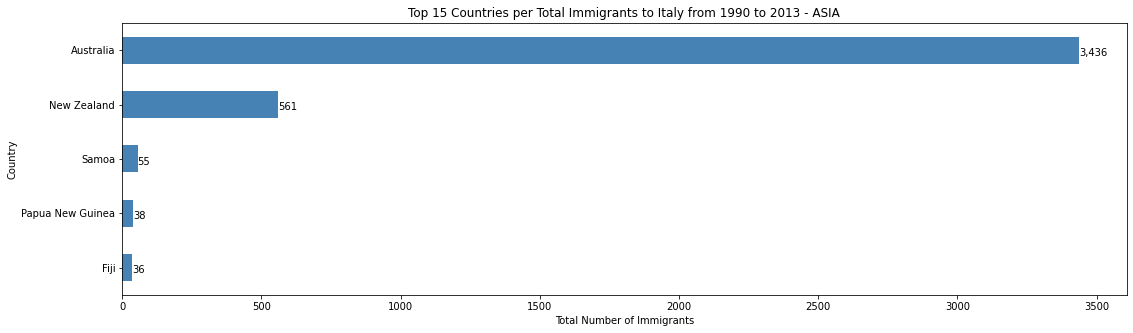

In [232]:
df_top5_i_total_oceania.plot(kind='barh', figsize=(18, 5), color='steelblue')

plt.xlabel('Total Number of Immigrants') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Top 15 Countries per Total Immigrants to Italy from 1990 to 2013 - ASIA') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top5_i_total_oceania): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0, index - 0.10), color='black')


plt.show()

---------------

### 4.2.4 Top 15 Countries - Sorted by Total - ___Word Clouds___<a id="4.2.4"></a>

---------------

### World

In [233]:
df_top15_e_total

Country
Moldova        5892.0
Bangladesh     6457.0
Tunisia        6899.0
Brazil         8008.0
India          8585.0
USA            9910.0
Ukraine       10001.0
UK            10167.0
China         12474.0
France        12739.0
Poland        12854.0
Albania       15395.0
Morocco       19450.0
Germany       20137.0
Romania       61792.0
Name: Total, dtype: float64

In [234]:
total_top15_e = df_top15_e_total.sum()
total_top15_e

220760.0

In [235]:
df_top15_e.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_new = pd.DataFrame(df_top15_e['Total'])
df_top15_e_total_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country            
Romania     61792.0
Germany     20137.0
Morocco     19450.0
Albania     15395.0
Poland      12854.0
France      12739.0
China       12474.0
UK          10167.0
Ukraine     10001.0
USA          9910.0
India        8585.0
Brazil       8008.0
Tunisia      6899.0
Bangladesh   6457.0
Moldova      5892.0

In [236]:
max_words = 40
word_string = ''
for country in df_top15_e_total_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_new.loc[country,'Total']/float(total_top15_e)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Germany Germany Germany Morocco Morocco Morocco Albania Albania Poland Poland France France China China UK Ukraine USA India Brazil Tunisia Bangladesh Moldova '

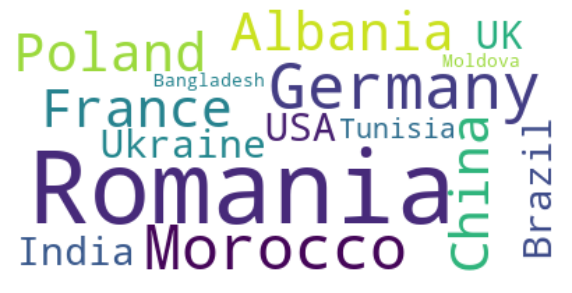

In [237]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

------------------

In [238]:
df_top15_i_total

Country
Ecuador          94542.0
Tunisia          97594.0
Bangladesh      106364.0
Egypt           107291.0
Peru            110229.0
Brazil          112664.0
Philippines     125759.0
Poland          128481.0
India           136744.0
Moldova         160070.0
China           205332.0
Ukraine         253865.0
Albania         435426.0
Morocco         446187.0
Romania        1172278.0
Name: Total, dtype: float64

In [239]:
total_top15_i = df_top15_i_total.sum()
total_top15_i

3692826.0

In [240]:
df_top15_i.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_new = pd.DataFrame(df_top15_i['Total'])
df_top15_i_total_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country               
Romania      1172278.0
Morocco       446187.0
Albania       435426.0
Ukraine       253865.0
China         205332.0
Moldova       160070.0
India         136744.0
Poland        128481.0
Philippines   125759.0
Brazil        112664.0
Peru          110229.0
Egypt         107291.0
Bangladesh    106364.0
Tunisia        97594.0
Ecuador        94542.0

In [241]:
max_words = 40
word_string = ''
for country in df_top15_i_total_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_new.loc[country, 'Total']/float(total_top15_i)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Morocco Morocco Morocco Morocco Albania Albania Albania Albania Ukraine Ukraine China China Moldova India Poland Philippines Brazil Peru Egypt Bangladesh Tunisia Ecuador '

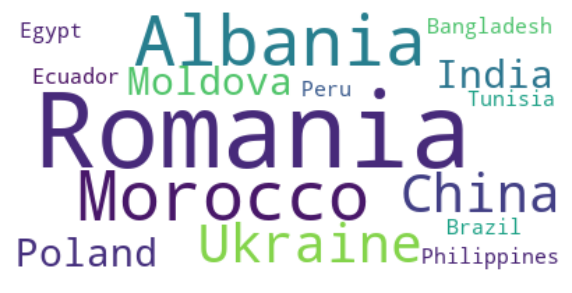

In [242]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Europe

In [243]:
df_top15_e_total_europe

Country
Serbia          2964.0
Croatia         3626.0
Netherlands     3690.0
Bulgaria        3910.0
Spain           4940.0
Switzerland     4954.0
Macedonia       5093.0
Moldova         5892.0
Ukraine        10001.0
UK             10167.0
France         12739.0
Poland         12854.0
Albania        15395.0
Germany        20137.0
Romania        61792.0
Name: Total, dtype: float64

In [244]:
total_top15_e_europe = df_top15_e_total_europe.sum()
total_top15_e_europe

178154.0

In [245]:
df_top15_e_europe.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_europe_new = pd.DataFrame(df_top15_e_europe['Total'])
df_top15_e_total_europe_new

Total
Country             
Romania      61792.0
Germany      20137.0
Albania      15395.0
Poland       12854.0
France       12739.0
UK           10167.0
Ukraine      10001.0
Moldova       5892.0
Macedonia     5093.0
Switzerland   4954.0
Spain         4940.0
Bulgaria      3910.0
Netherlands   3690.0
Croatia       3626.0
Serbia        2964.0

In [246]:
max_words = 80
word_string = ''
for country in df_top15_e_total_europe_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_europe_new.loc[country,'Total']/float(total_top15_e_europe)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Germany Germany Germany Germany Germany Germany Germany Germany Germany Albania Albania Albania Albania Albania Albania Poland Poland Poland Poland Poland France France France France France UK UK UK UK Ukraine Ukraine Ukraine Ukraine Moldova Moldova Macedonia Macedonia Switzerland Switzerland Spain Spain Bulgaria Netherlands Croatia Serbia '

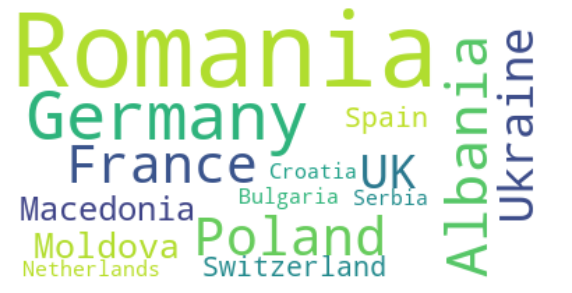

In [247]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [248]:
df_top15_i_total_europe

Country
Croatia                     15062.0
Bosnia and Herzegovina      18744.0
Spain                       21334.0
Serbia                      24102.0
UK                          34347.0
France                      43367.0
Germany                     50462.0
Russian Federation          55769.0
Macedonia                   62515.0
Bulgaria                    64663.0
Poland                     128481.0
Moldova                    160070.0
Ukraine                    253865.0
Albania                    435426.0
Romania                   1172278.0
Name: Total, dtype: float64

In [249]:
total_top15_i_europe = df_top15_i_total_europe.sum()
total_top15_i_europe

2540485.0

In [250]:
df_top15_i_europe.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_europe_new = pd.DataFrame(df_top15_i_europe['Total'])
df_top15_i_total_europe_new

Total
Country                          
Romania                 1172278.0
Albania                  435426.0
Ukraine                  253865.0
Moldova                  160070.0
Poland                   128481.0
Bulgaria                  64663.0
Macedonia                 62515.0
Russian Federation        55769.0
Germany                   50462.0
France                    43367.0
UK                        34347.0
Serbia                    24102.0
Spain                     21334.0
Bosnia and Herzegovina    18744.0
Croatia                   15062.0

In [251]:
df_top15_i_total_europe_new.rename(index={'Russian Federation':'Russia','Bosnia and Herzegovina':'Bosnia'}, inplace=True)
df_top15_i_total_europe_new

Total
Country             
Romania    1172278.0
Albania     435426.0
Ukraine     253865.0
Moldova     160070.0
Poland      128481.0
Bulgaria     64663.0
Macedonia    62515.0
Russia       55769.0
Germany      50462.0
France       43367.0
UK           34347.0
Serbia       24102.0
Spain        21334.0
Bosnia       18744.0
Croatia      15062.0

In [252]:
max_words = 170
word_string = ''
for country in df_top15_i_total_europe_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_europe_new.loc[country,'Total']/float(total_top15_i_europe)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Romania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Albania Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Ukraine Moldova Moldova

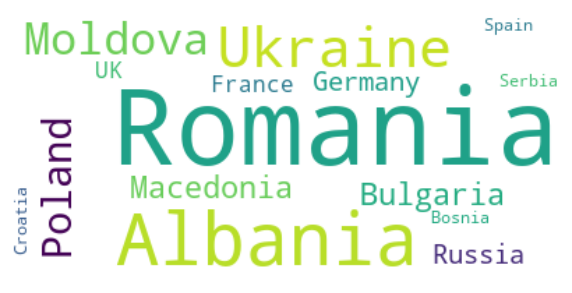

In [253]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Africa

In [254]:
df_top15_e_total_africa

Country
Mauritius          275.0
Congo              322.0
Eritrea            401.0
Burkina Faso       445.0
Cameroon           457.0
Ethiopia           604.0
Somalia            972.0
Côte d'Ivoire     1025.0
Algeria           1448.0
Nigeria           1816.0
Ghana             2735.0
Egypt             3336.0
Senegal           3419.0
Tunisia           6899.0
Morocco          19450.0
Name: Total, dtype: float64

In [255]:
total_top15_e_africa = df_top15_e_total_africa.sum()
total_top15_e_africa

43604.0

In [256]:
df_top15_e_africa.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_africa_new = pd.DataFrame(df_top15_e_africa['Total'])
df_top15_e_total_africa_new

Total
Country               
Morocco        19450.0
Tunisia         6899.0
Senegal         3419.0
Egypt           3336.0
Ghana           2735.0
Nigeria         1816.0
Algeria         1448.0
Côte d'Ivoire   1025.0
Somalia          972.0
Ethiopia         604.0
Cameroon         457.0
Burkina Faso     445.0
Eritrea          401.0
Congo            322.0
Mauritius        275.0

In [257]:
df_top15_e_total_africa_new.rename(index={"Côte d'Ivoire":'CoteIvoire','Burkina Faso':'BurkinaFaso'}, inplace=True)
df_top15_e_total_africa_new

Total
Country             
Morocco      19450.0
Tunisia       6899.0
Senegal       3419.0
Egypt         3336.0
Ghana         2735.0
Nigeria       1816.0
Algeria       1448.0
CoteIvoire    1025.0
Somalia        972.0
Ethiopia       604.0
Cameroon       457.0
BurkinaFaso    445.0
Eritrea        401.0
Congo          322.0
Mauritius      275.0

In [258]:
max_words = 300
word_string = ''
for country in df_top15_e_total_africa_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_africa_new.loc[country,'Total']/float(total_top15_e_africa)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco

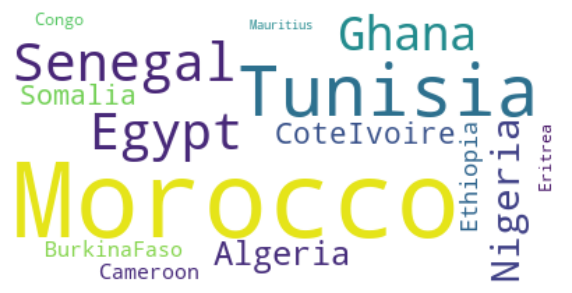

In [259]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [260]:
df_top15_i_total_africa

Country
Congo              4674.0
Togo               5070.0
Cameroon          11524.0
Burkina Faso      12488.0
Ethiopia          12926.0
Eritrea           13875.0
Somalia           14861.0
Algeria           20082.0
Côte d'Ivoire     22497.0
Ghana             46224.0
Nigeria           61652.0
Senegal           78893.0
Tunisia           97594.0
Egypt            107291.0
Morocco          446187.0
Name: Total, dtype: float64

In [261]:
total_top15_i_africa = df_top15_i_total_africa.sum()
total_top15_i_africa

955838.0

In [262]:
df_top15_i_africa.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_africa_new = pd.DataFrame(df_top15_i_africa['Total'])
df_top15_i_total_africa_new

Total
Country                
Morocco        446187.0
Egypt          107291.0
Tunisia         97594.0
Senegal         78893.0
Nigeria         61652.0
Ghana           46224.0
Côte d'Ivoire   22497.0
Algeria         20082.0
Somalia         14861.0
Eritrea         13875.0
Ethiopia        12926.0
Burkina Faso    12488.0
Cameroon        11524.0
Togo             5070.0
Congo            4674.0

In [263]:
df_top15_i_total_africa_new.rename(index={"Côte d'Ivoire":'CoteIvoire','Burkina Faso':'BurkinaFaso'}, inplace=True)
df_top15_i_total_africa_new

Total
Country              
Morocco      446187.0
Egypt        107291.0
Tunisia       97594.0
Senegal       78893.0
Nigeria       61652.0
Ghana         46224.0
CoteIvoire    22497.0
Algeria       20082.0
Somalia       14861.0
Eritrea       13875.0
Ethiopia      12926.0
BurkinaFaso   12488.0
Cameroon      11524.0
Togo           5070.0
Congo          4674.0

In [264]:
max_words = 300
word_string = ''
for country in df_top15_i_total_africa_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_africa_new.loc[country,'Total']/float(total_top15_i_africa)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco Morocco

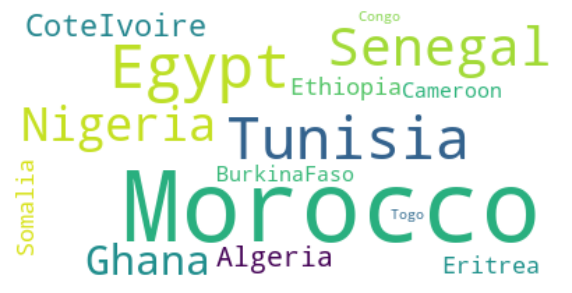

In [265]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Asia

In [266]:
df_top15_e_total_asia

Country
Indonesia              257.0
Syria                  285.0
Lebanon                379.0
Israel                 425.0
Thailand               594.0
Republic of Korea      890.0
Iran                   901.0
Turkey                1229.0
Japan                 4475.0
Philippines           4487.0
Sri Lanka             4794.0
Pakistan              4996.0
Bangladesh            6457.0
India                 8585.0
China                12474.0
Name: Total, dtype: float64

In [267]:
total_top15_e_asia = df_top15_e_total_asia.sum()
total_top15_e_asia

51228.0

In [268]:
df_top15_e_asia.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_asia_new = pd.DataFrame(df_top15_e_asia['Total'])
df_top15_e_total_asia_new

Total
Country                   
China              12474.0
India               8585.0
Bangladesh          6457.0
Pakistan            4996.0
Sri Lanka           4794.0
Philippines         4487.0
Japan               4475.0
Turkey              1229.0
Iran                 901.0
Republic of Korea    890.0
Thailand             594.0
Israel               425.0
Lebanon              379.0
Syria                285.0
Indonesia            257.0

In [269]:
df_top15_e_total_asia_new.rename(index={'Sri Lanka':'SriLanka','Republic of Korea':'Korea'}, inplace=True)
df_top15_e_total_asia_new

Total
Country             
China        12474.0
India         8585.0
Bangladesh    6457.0
Pakistan      4996.0
SriLanka      4794.0
Philippines   4487.0
Japan         4475.0
Turkey        1229.0
Iran           901.0
Korea          890.0
Thailand       594.0
Israel         425.0
Lebanon        379.0
Syria          285.0
Indonesia      257.0

In [270]:
max_words = 300
word_string = ''
for country in df_top15_e_total_asia_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_asia_new.loc[country,'Total']/float(total_top15_e_asia)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Banglade

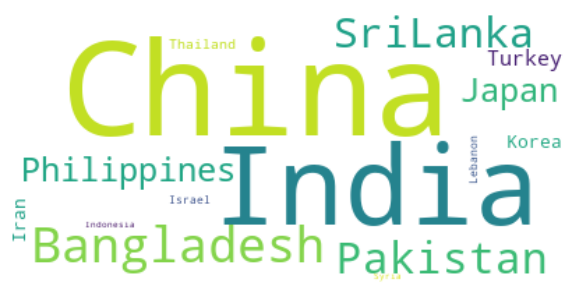

In [271]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [272]:
df_top15_i_total_asia

Country
Republic of Korea      4170.0
Lebanon                4291.0
Syria                  4350.0
Thailand               6820.0
Afghanistan            7555.0
Japan                  9810.0
Iran                   9882.0
Georgia               12427.0
Turkey                18681.0
Sri Lanka             81685.0
Pakistan              89957.0
Bangladesh           106364.0
Philippines          125759.0
India                136744.0
China                205332.0
Name: Total, dtype: float64

In [273]:
total_top15_i_asia = df_top15_i_total_asia.sum()
total_top15_i_asia

823827.0

In [274]:
df_top15_i_asia.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_asia_new = pd.DataFrame(df_top15_i_asia['Total'])
df_top15_i_total_asia_new

Total
Country                    
China              205332.0
India              136744.0
Philippines        125759.0
Bangladesh         106364.0
Pakistan            89957.0
Sri Lanka           81685.0
Turkey              18681.0
Georgia             12427.0
Iran                 9882.0
Japan                9810.0
Afghanistan          7555.0
Thailand             6820.0
Syria                4350.0
Lebanon              4291.0
Republic of Korea    4170.0

In [275]:
df_top15_i_total_asia_new.rename(index={'Sri Lanka':'SriLanka','Republic of Korea':'Korea'}, inplace=True)
df_top15_i_total_asia_new

Total
Country              
China        205332.0
India        136744.0
Philippines  125759.0
Bangladesh   106364.0
Pakistan      89957.0
SriLanka      81685.0
Turkey        18681.0
Georgia       12427.0
Iran           9882.0
Japan          9810.0
Afghanistan    7555.0
Thailand       6820.0
Syria          4350.0
Lebanon        4291.0
Korea          4170.0

In [276]:
max_words = 300
word_string = ''
for country in df_top15_i_total_asia_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_asia_new.loc[country,'Total']/float(total_top15_i_asia)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippin

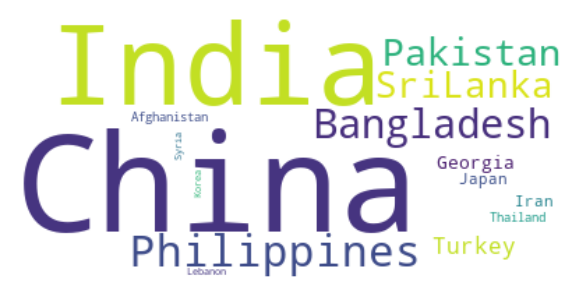

In [277]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### America

In [278]:
df_top15_e_total_america

Country
El Salvador            203.0
Uruguay                285.0
Chile                  576.0
Bolivia                649.0
Mexico                 948.0
Venezuela             1335.0
Cuba                  1392.0
Canada                1521.0
Dominican Republic    1637.0
Colombia              1887.0
Peru                  3368.0
Ecuador               3757.0
Argentina             4297.0
Brazil                8008.0
USA                   9910.0
Name: Total, dtype: float64

In [279]:
total_top15_e_america = df_top15_e_total_america.sum()
total_top15_e_america

39773.0

In [280]:
df_top15_e_america.sort_values(by='Total', ascending=False, inplace=True)
df_top15_e_total_america_new = pd.DataFrame(df_top15_e_america['Total'])
df_top15_e_total_america_new

Total
Country                   
USA                 9910.0
Brazil              8008.0
Argentina           4297.0
Ecuador             3757.0
Peru                3368.0
Colombia            1887.0
Dominican Republic  1637.0
Canada              1521.0
Cuba                1392.0
Venezuela           1335.0
Mexico               948.0
Bolivia              649.0
Chile                576.0
Uruguay              285.0
El Salvador          203.0

In [281]:
df_top15_e_total_america_new.rename(index={'Dominican Republic':'Dominican','El Salvador':'ElSalvador'}, inplace=True)
df_top15_e_total_america_new

Total
Country           
USA         9910.0
Brazil      8008.0
Argentina   4297.0
Ecuador     3757.0
Peru        3368.0
Colombia    1887.0
Dominican   1637.0
Canada      1521.0
Cuba        1392.0
Venezuela   1335.0
Mexico       948.0
Bolivia      649.0
Chile        576.0
Uruguay      285.0
ElSalvador   203.0

In [282]:
max_words = 300
word_string = ''
for country in df_top15_e_total_america_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_e_total_america_new.loc[country,'Total']/float(total_top15_e_america)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA USA Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Argentina Arg

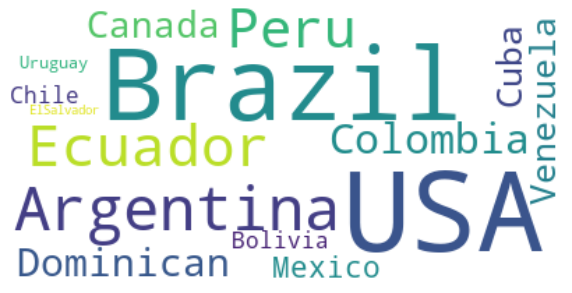

In [283]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [284]:
df_top15_i_total_america

Country
Uruguay                 2844.0
Chile                   4119.0
Canada                  5435.0
Mexico                  6211.0
El Salvador             9445.0
Venezuela              12246.0
Bolivia                14868.0
USA                    28407.0
Colombia               28469.0
Cuba                   29949.0
Dominican Republic     31148.0
Argentina              36501.0
Ecuador                94542.0
Peru                  110229.0
Brazil                112664.0
Name: Total, dtype: float64

In [285]:
total_top15_i_america = df_top15_i_total_america.sum()
total_top15_i_america

527077.0

In [286]:
df_top15_i_america.sort_values(by='Total', ascending=False, inplace=True)
df_top15_i_total_america_new = pd.DataFrame(df_top15_i_america['Total'])
df_top15_i_total_america_new

Total
Country                     
Brazil              112664.0
Peru                110229.0
Ecuador              94542.0
Argentina            36501.0
Dominican Republic   31148.0
Cuba                 29949.0
Colombia             28469.0
USA                  28407.0
Bolivia              14868.0
Venezuela            12246.0
El Salvador           9445.0
Mexico                6211.0
Canada                5435.0
Chile                 4119.0
Uruguay               2844.0

In [287]:
df_top15_i_total_america_new.rename(index={'Dominican Republic':'Dominican','El Salvador':'ElSalvador'}, inplace=True)
df_top15_i_total_america_new

Total
Country             
Brazil      112664.0
Peru        110229.0
Ecuador      94542.0
Argentina    36501.0
Dominican    31148.0
Cuba         29949.0
Colombia     28469.0
USA          28407.0
Bolivia      14868.0
Venezuela    12246.0
ElSalvador    9445.0
Mexico        6211.0
Canada        5435.0
Chile         4119.0
Uruguay       2844.0

In [288]:
max_words = 300
word_string = ''
for country in df_top15_i_total_america_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top15_i_total_america_new.loc[country,'Total']/float(total_top15_i_america)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Brazil Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Peru Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador Ecuador E

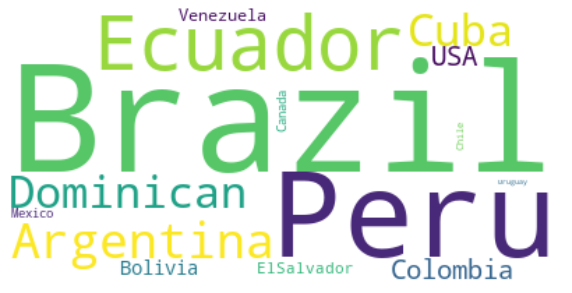

In [289]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

### Oceania

In [290]:
df_top5_e_total_oceania

Country
Papua New Guinea      3.0
Fiji                 10.0
Samoa                30.0
New Zealand         181.0
Australia           971.0
Name: Total, dtype: float64

In [291]:
total_top5_e_oceania = df_top5_e_total_oceania.sum()
total_top5_e_oceania

1195.0

In [292]:
df_top5_e_oceania.sort_values(by='Total', ascending=False, inplace=True)
df_top5_e_total_oceania_new = pd.DataFrame(df_top5_e_oceania['Total'])
df_top5_e_total_oceania_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country                
Australia         971.0
New Zealand       181.0
Samoa              30.0
Fiji               10.0
Papua New Guinea    3.0

In [293]:
df_top5_e_total_oceania_new.rename(index={'New Zealand':'NewZealand','Papua New Guinea':'Guinea'}, inplace=True)
df_top5_e_total_oceania_new

Total
Country          
Australia   971.0
NewZealand  181.0
Samoa        30.0
Fiji         10.0
Guinea        3.0

In [294]:
max_words = 400
word_string = ''
for country in df_top5_e_total_oceania_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top5_e_total_oceania_new.loc[country,'Total']/float(total_top5_e_oceania)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia

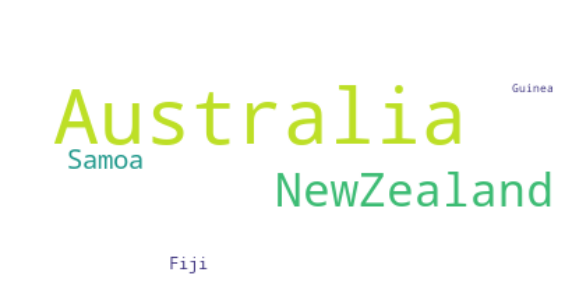

In [295]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------

In [296]:
df_top5_i_total_oceania

Country
Fiji                  36.0
Papua New Guinea      38.0
Samoa                 55.0
New Zealand          561.0
Australia           3436.0
Name: Total, dtype: float64

In [297]:
total_top5_i_oceania = df_top5_i_total_oceania.sum()
total_top5_i_oceania

4126.0

In [298]:
df_top5_i_oceania.sort_values(by='Total', ascending=False, inplace=True)
df_top5_i_total_oceania_new = pd.DataFrame(df_top5_i_oceania['Total'])
df_top5_i_total_oceania_new

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total
Country                 
Australia         3436.0
New Zealand        561.0
Samoa               55.0
Papua New Guinea    38.0
Fiji                36.0

In [299]:
df_top5_i_total_oceania_new.rename(index={'New Zealand':'NewZealand','Papua New Guinea':'Guinea'}, inplace=True)
df_top5_i_total_oceania_new

Total
Country           
Australia   3436.0
NewZealand   561.0
Samoa         55.0
Guinea        38.0
Fiji          36.0

In [300]:
max_words = 300
word_string = ''
for country in df_top5_i_total_oceania_new.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_top5_i_total_oceania_new.loc[country,'Total']/float(total_top5_i_oceania)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia Australia

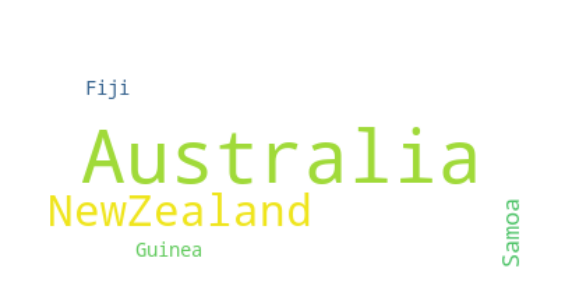

In [301]:
# create the word cloud
wordcloud = WordCloud(background_color='white',collocations=False).generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------------

## 4.3 Emigration and Immigration Trends<a id="4.3"></a>

### 4.3.1 Total Trends Per Year<a id="4.3.1"></a>

----------------

In [302]:
df_italy_emigrants.head()

Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Total       World            World               World   0.0   0.0   0.0   
Italy      Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Romania    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Germany    Europe   Western Europe   Developed regions   0.0   0.0   0.0   
Morocco    Africa  Northern Africa  Developing regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006     2007     2008  \
Country                          ...                                       
Total     0.0   0.0   0.0   0.0  ...  65029.0  75230.0  65196.0  80947.0   
Italy     0.0   0.0   0.0   0.0  ...  49078.0  58256.0  44880.0  53924.0   
Romania   0.0   0.0   0.0   0.0  ...   1028.0   1251.0   3742.0   8308.0   
Germany   0.0   0.0   0.0   0.0  ...    970.0    872.0   1087.0   1353.0   
Morocco   0.0   0.0   0.0   0.0  ...   1029.0   1098.0   1010.0   1046.0   

            2009     2010     2011      2012      2013      Total  
Country                                                            
Total    80597.0  78771.0  82461.0  106216.0  125735.0  1519023.0  
Italy    48327.0  45954.0  50057.0   67998.0   82095.0  1158473.0  
Romania   9924.0   7488.0   7693.0    9131.0   11014.0    61792.0  
Germany   1639.0   1142.0   1249.0    1330.0    1291.0    20137.0  
Morocco   1178.0   2179.0   1761.0    1960.0    2418.0    19450.0  

[5 rows x 38 columns]

In [303]:
df_italy_emigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [304]:
df_italy_emigrants.index.to_list()

['Total',
 'Italy',
 'Romania',
 'Germany',
 'Morocco',
 'Unknown',
 'Albania',
 'Poland',
 'France',
 'China (including Hong Kong Special Administrative Region)',
 'United Kingdom of Great Britain and Northern Ireland',
 'Ukraine',
 'United States of America',
 'India',
 'Brazil',
 'Tunisia',
 'Bangladesh',
 'Republic of Moldova',
 'The former Yugoslav Republic of Macedonia',
 'Pakistan',
 'Switzerland',
 'Spain',
 'Sri Lanka',
 'Philippines',
 'Japan',
 'Argentina',
 'Bulgaria',
 'Ecuador',
 'Netherlands',
 'Croatia',
 'Senegal',
 'Peru',
 'Egypt',
 'Serbia',
 'Slovakia',
 'Ghana',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Russian Federation',
 'Hungary',
 'Colombia',
 'Sweden',
 'Nigeria',
 'Dominican Republic',
 'Portugal',
 'Canada',
 'Algeria',
 'Cuba',
 'Greece',
 'Venezuela (Bolivarian Republic of)',
 'Turkey',
 'Slovenia',
 'Denmark',
 'Czech Republic',
 "Côte d'Ivoire",
 'Somalia',
 'Australia',
 'Mexico',
 'Finland',
 'Iran (Islamic Republic of)',
 'Republic of Ko

In [305]:
df_italy_emigrants.loc['Total',years[11:]].head()

1991    55086
1992    54223
1993    58778
1994    62676
1995    39984
Name: Total, dtype: object

In [306]:
df_tot_py_e = pd.DataFrame(df_italy_emigrants.loc['Total',years[11:]])

# change the years to type float (useful for regression later on)
df_tot_py_e.index = map(int, df_tot_py_e.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot_py_e.reset_index(inplace=True)

# rename columns
df_tot_py_e.columns = ['year', 'total']

# view the final dataframe
df_tot_py_e

year   total
0   1991   55086
1   1992   54223
2   1993   58778
3   1994   62676
4   1995   39984
5   1996   44060
6   1997   43392
7   1998   45889
8   1999   64873
9   2000   56601
10  2001   56077
11  2002   49383
12  2003   62970
13  2004   64849
14  2005   65029
15  2006   75230
16  2007   65196
17  2008   80947
18  2009   80597
19  2010   78771
20  2011   82461
21  2012  106216
22  2013  125735

In [307]:
df_tot_py_e.dtypes

year      int64
total    object
dtype: object

In [308]:
df_tot_py_e['total'] = df_tot_py_e['total'].astype("float")

In [309]:
df_tot_py_e.dtypes

year       int64
total    float64
dtype: object

(1990.5, 2013.5)

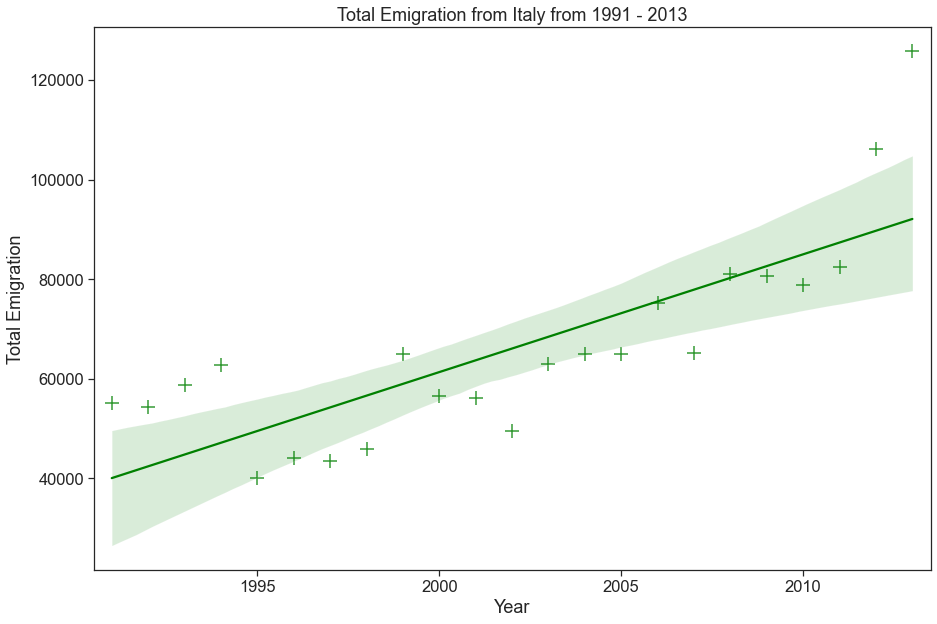

In [310]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot_py_e, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Emigration')
ax.set_title('Total Emigration from Italy from 1991 - 2013')
ax.set_xlim(1990.5,2013.5)

----------------

In [311]:
df_italy_immigrants.head()

Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Romania    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Italy      Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Morocco    Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Albania    Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Ukraine    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006      2007      2008  \
Country                          ...                                         
Romania   0.0   0.0   0.0   0.0  ...  45338.0  39715.0  271443.0  174554.0   
Italy     0.0   0.0   0.0   0.0  ...  42893.0  43052.0   42818.0   38163.0   
Morocco   0.0   0.0   0.0   0.0  ...  26057.0  21784.0   23483.0   37275.0   
Albania   0.0   0.0   0.0   0.0  ...  28358.0  23099.0   23292.0   35715.0   
Ukraine   0.0   0.0   0.0   0.0  ...  15675.0  14821.0   15487.0   24039.0   

             2009     2010     2011     2012     2013      Total  
Country                                                           
Romania  105597.0  92116.0  90096.0  81666.0  58227.0  1172278.0  
Italy     36215.0  34357.0  31466.0  29467.0  28433.0   909461.0  
Morocco   33128.0  29960.0  23885.0  19590.0  19568.0   446187.0  
Albania   27493.0  22591.0  16613.0  14118.0  12165.0   435426.0  
Ukraine   22594.0  30416.0  17889.0  11510.0  12814.0   253865.0  

[5 rows x 38 columns]

In [312]:
df_italy_immigrants.columns

Index(['Continent', 'Region', 'Development', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [313]:
df_italy_immigrants.index.to_list()

['Romania',
 'Italy',
 'Morocco',
 'Albania',
 'Ukraine',
 'China',
 'Republic of Moldova',
 'India',
 'Poland',
 'Philippines',
 'Brazil',
 'Peru',
 'Egypt',
 'Bangladesh',
 'Tunisia',
 'Ecuador',
 'Pakistan',
 'Sri Lanka',
 'Senegal',
 'Bulgaria',
 'The former Yugoslav Republic of Macedonia',
 'Nigeria',
 'Russian Federation',
 'Germany',
 'Ghana',
 'France',
 'Argentina',
 'United Kingdom of Great Britain and Northern Ireland',
 'Dominican Republic',
 'Cuba',
 'Colombia',
 'United States of America',
 'Serbia',
 "Côte d'Ivoire",
 'Spain',
 'Algeria',
 'Bosnia and Herzegovina',
 'Turkey',
 'Croatia',
 'Bolivia (Plurinational State of)',
 'Somalia',
 'Eritrea',
 'Ethiopia',
 'Burkina Faso',
 'Georgia',
 'Slovakia',
 'Venezuela (Bolivarian Republic of)',
 'Cameroon',
 'Switzerland',
 'Hungary',
 'Belarus',
 'Iran (Islamic Republic of)',
 'Japan',
 'El Salvador',
 'Netherlands',
 'Czech Republic',
 'Afghanistan',
 'Greece',
 'Thailand',
 'Lithuania',
 'Mexico',
 'Portugal',
 'Belgium',


In [314]:
df_tot_py_i = pd.DataFrame(df_italy_immigrants[years[11:]].sum(axis=0))

In [315]:
# change the years to type float (useful for regression later on)
df_tot_py_i.index = map(int, df_tot_py_i.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot_py_i.reset_index(inplace=True)

# rename columns
df_tot_py_i.columns = ['year', 'total']

# view the final dataframe
df_tot_py_i

year     total
0   1991   85198.0
1   1992   78023.0
2   1993   66309.0
3   1994   62588.0
4   1995   65648.0
5   1996  137949.0
6   1997  134433.0
7   1998  146429.0
8   1999  172577.0
9   2000  212470.0
10  2001   35416.0
11  2002  219161.0
12  2003  464606.0
13  2004  437746.0
14  2005  320123.0
15  2006  292186.0
16  2007  557953.0
17  2008  534153.0
18  2009  442859.0
19  2010  458789.0
20  2011  382853.0
21  2012  348128.0
22  2013  305191.0

In [316]:
df_tot_py_i.dtypes

year       int64
total    float64
dtype: object

In [317]:
# df_tot_py_i['total'] = df_tot_py_e['total'].astype("float")

In [318]:
df_tot_py_i.dtypes

year       int64
total    float64
dtype: object

(1990.5, 2013.5)

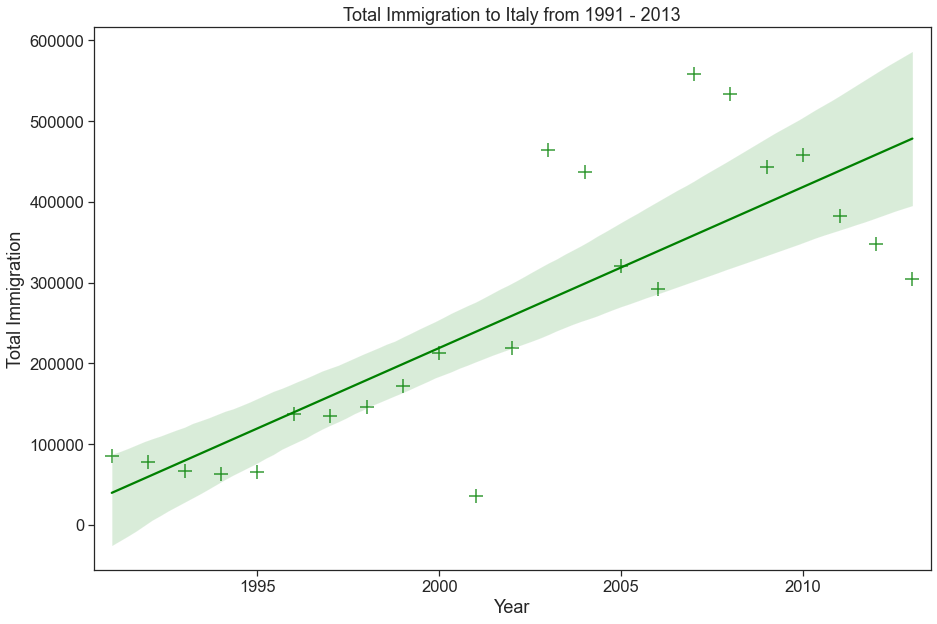

In [319]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot_py_i, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Italy from 1991 - 2013')
ax.set_xlim(1990.5,2013.5)

--------------------

## 4.4 Choropleth Maps<a id="4.4"></a>

----------------

In [320]:
# download countries geojson file
# !wget --quiet /Users/Angelo/Data Science Projects/Emigration Immigration/world_countries.json -O world_countries.json
# world_geo = r'world_countries.json' # geojson file

import os

# world_geo = os.path.join('path', 'world_countries.json')
world_geo = os.path.join('', 'world_countries.json')


---------------

In [321]:
df_italy_emigrants.head()

Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Total       World            World               World   0.0   0.0   0.0   
Italy      Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Romania    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Germany    Europe   Western Europe   Developed regions   0.0   0.0   0.0   
Morocco    Africa  Northern Africa  Developing regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006     2007     2008  \
Country                          ...                                       
Total     0.0   0.0   0.0   0.0  ...  65029.0  75230.0  65196.0  80947.0   
Italy     0.0   0.0   0.0   0.0  ...  49078.0  58256.0  44880.0  53924.0   
Romania   0.0   0.0   0.0   0.0  ...   1028.0   1251.0   3742.0   8308.0   
Germany   0.0   0.0   0.0   0.0  ...    970.0    872.0   1087.0   1353.0   
Morocco   0.0   0.0   0.0   0.0  ...   1029.0   1098.0   1010.0   1046.0   

            2009     2010     2011      2012      2013      Total  
Country                                                            
Total    80597.0  78771.0  82461.0  106216.0  125735.0  1519023.0  
Italy    48327.0  45954.0  50057.0   67998.0   82095.0  1158473.0  
Romania   9924.0   7488.0   7693.0    9131.0   11014.0    61792.0  
Germany   1639.0   1142.0   1249.0    1330.0    1291.0    20137.0  
Morocco   1178.0   2179.0   1761.0    1960.0    2418.0    19450.0  

[5 rows x 38 columns]

In [322]:
df_italy_emigrants_years = df_italy_emigrants[years[11:]]
df_italy_emigrants_years.head()

1991     1992     1993     1994     1995     1996     1997  \
Country                                                                  
Total    55086.0  54223.0  58778.0  62676.0  39984.0  44060.0  43392.0   
Italy    51478.0  50226.0  54980.0  59402.0  34886.0  39017.0  38984.0   
Romania      0.0      0.0      0.0      0.0     71.0     87.0    109.0   
Germany    714.0    810.0    606.0    501.0    959.0    663.0    503.0   
Morocco    177.0    193.0    455.0    299.0    351.0    336.0    434.0   

            1998     1999     2000  ...     2004     2005     2006     2007  \
Country                             ...                                       
Total    45889.0  64873.0  56601.0  ...  64849.0  65029.0  75230.0  65196.0   
Italy    37952.0  56283.0  47480.0  ...  50830.0  49078.0  58256.0  44880.0   
Romania    119.0    142.0    195.0  ...    673.0   1028.0   1251.0   3742.0   
Germany    566.0    683.0    774.0  ...    939.0    970.0    872.0   1087.0   
Morocco    369.0    450.0    572.0  ...    777.0   1029.0   1098.0   1010.0   

            2008     2009     2010     2011      2012      2013  
Country                                                          
Total    80947.0  80597.0  78771.0  82461.0  106216.0  125735.0  
Italy    53924.0  48327.0  45954.0  50057.0   67998.0   82095.0  
Romania   8308.0   9924.0   7488.0   7693.0    9131.0   11014.0  
Germany   1353.0   1639.0   1142.0   1249.0    1330.0    1291.0  
Morocco   1046.0   1178.0   2179.0   1761.0    1960.0    2418.0  

[5 rows x 23 columns]

In [323]:
df_italy_emigrants_years.drop(['Total','Unknown'], axis=0, inplace=True)

df_italy_emigrants_years.reset_index(inplace=True)
df_italy_emigrants_years.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country     1991     1992     1993     1994     1995     1996     1997  \
0    Italy  51478.0  50226.0  54980.0  59402.0  34886.0  39017.0  38984.0   
1  Romania      0.0      0.0      0.0      0.0     71.0     87.0    109.0   
2  Germany    714.0    810.0    606.0    501.0    959.0    663.0    503.0   
3  Morocco    177.0    193.0    455.0    299.0    351.0    336.0    434.0   
4  Albania      0.0      0.0      0.0      0.0    147.0    206.0    197.0   

      1998     1999  ...     2004     2005     2006     2007     2008  \
0  37952.0  56283.0  ...  50830.0  49078.0  58256.0  44880.0  53924.0   
1    119.0    142.0  ...    673.0   1028.0   1251.0   3742.0   8308.0   
2    566.0    683.0  ...    939.0    970.0    872.0   1087.0   1353.0   
3    369.0    450.0  ...    777.0   1029.0   1098.0   1010.0   1046.0   
4    305.0    327.0  ...    674.0    929.0    910.0    836.0    925.0   

      2009     2010     2011     2012     2013  
0  48327.0  45954.0  50057.0  67998.0  82095.0  
1   9924.0   7488.0   7693.0   9131.0  11014.0  
2   1639.0   1142.0   1249.0   1330.0   1291.0  
3   1178.0   2179.0   1761.0   1960.0   2418.0  
4   1110.0   1495.0   1525.0   1794.0   2296.0  

[5 rows x 24 columns]

---------------

In [324]:
df_italy_emigrants_total = df_italy_emigrants[['Total']]
df_italy_emigrants_total.head()

Total
Country           
Total    1519023.0
Italy    1158473.0
Romania    61792.0
Germany    20137.0
Morocco    19450.0

In [325]:
df_italy_emigrants_total.index.tolist()

['Total',
 'Italy',
 'Romania',
 'Germany',
 'Morocco',
 'Unknown',
 'Albania',
 'Poland',
 'France',
 'China (including Hong Kong Special Administrative Region)',
 'United Kingdom of Great Britain and Northern Ireland',
 'Ukraine',
 'United States of America',
 'India',
 'Brazil',
 'Tunisia',
 'Bangladesh',
 'Republic of Moldova',
 'The former Yugoslav Republic of Macedonia',
 'Pakistan',
 'Switzerland',
 'Spain',
 'Sri Lanka',
 'Philippines',
 'Japan',
 'Argentina',
 'Bulgaria',
 'Ecuador',
 'Netherlands',
 'Croatia',
 'Senegal',
 'Peru',
 'Egypt',
 'Serbia',
 'Slovakia',
 'Ghana',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Russian Federation',
 'Hungary',
 'Colombia',
 'Sweden',
 'Nigeria',
 'Dominican Republic',
 'Portugal',
 'Canada',
 'Algeria',
 'Cuba',
 'Greece',
 'Venezuela (Bolivarian Republic of)',
 'Turkey',
 'Slovenia',
 'Denmark',
 'Czech Republic',
 "Côte d'Ivoire",
 'Somalia',
 'Australia',
 'Mexico',
 'Finland',
 'Iran (Islamic Republic of)',
 'Republic of Ko

In [326]:
df_italy_emigrants_total.drop(['Total','Unknown','Italy'], axis=0, inplace=True)

df_italy_emigrants_total.rename(index={'Bolivia (Plurinational State of)':'Bolivia','Venezuela (Bolivarian Republic of)':'Venezuela','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria','China (including Hong Kong Special Administrative Region)':'China','Russian Federation':'Russia','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia','Republic of Korea':'South Korea','Serbia':'Republic of Serbia','China, Taiwan Province of China':'Taiwan',"Democratic People's Republic of Korea":'North Korea',"Lao People's Democratic Republic":'Laos','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Guinea-Bissau':'Guinea Bissau',"Côte d'Ivoire":'Ivory Coast'}, inplace=True)

df_italy_emigrants_total.reset_index(inplace=True)
df_italy_emigrants_total.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country    Total
0  Romania  61792.0
1  Germany  20137.0
2  Morocco  19450.0
3  Albania  15395.0
4   Poland  12854.0

-------------------------

In [327]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [328]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_italy_emigrants_total['Total'].min(),
                              df_italy_emigrants_total['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_italy_emigrants_total,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Emigration from Italy',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


--------------------

In [329]:
df_italy_emigrants_total_no_Romania = df_italy_emigrants_total
df_italy_emigrants_total_no_Romania.drop([0], axis=0, inplace=True)
df_italy_emigrants_total_no_Romania.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country    Total
1  Germany  20137.0
2  Morocco  19450.0
3  Albania  15395.0
4   Poland  12854.0
5   France  12739.0

In [330]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [331]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_italy_emigrants_total_no_Romania['Total'].min(),
                              df_italy_emigrants_total_no_Romania['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_italy_emigrants_total_no_Romania,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Emigration from Italy',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


--------------------

--------------------

In [332]:
df_italy_immigrants.head()

Continent           Region         Development  1980  1981  1982  \
Country                                                                    
Romania    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   
Italy      Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Morocco    Africa  Northern Africa  Developing regions   0.0   0.0   0.0   
Albania    Europe  Southern Europe   Developed regions   0.0   0.0   0.0   
Ukraine    Europe   Eastern Europe   Developed regions   0.0   0.0   0.0   

         1983  1984  1985  1986  ...     2005     2006      2007      2008  \
Country                          ...                                         
Romania   0.0   0.0   0.0   0.0  ...  45338.0  39715.0  271443.0  174554.0   
Italy     0.0   0.0   0.0   0.0  ...  42893.0  43052.0   42818.0   38163.0   
Morocco   0.0   0.0   0.0   0.0  ...  26057.0  21784.0   23483.0   37275.0   
Albania   0.0   0.0   0.0   0.0  ...  28358.0  23099.0   23292.0   35715.0   
Ukraine   0.0   0.0   0.0   0.0  ...  15675.0  14821.0   15487.0   24039.0   

             2009     2010     2011     2012     2013      Total  
Country                                                           
Romania  105597.0  92116.0  90096.0  81666.0  58227.0  1172278.0  
Italy     36215.0  34357.0  31466.0  29467.0  28433.0   909461.0  
Morocco   33128.0  29960.0  23885.0  19590.0  19568.0   446187.0  
Albania   27493.0  22591.0  16613.0  14118.0  12165.0   435426.0  
Ukraine   22594.0  30416.0  17889.0  11510.0  12814.0   253865.0  

[5 rows x 38 columns]

In [333]:
df_italy_immigrants_years = df_italy_immigrants[years[11:]]
df_italy_immigrants_years.head()

1991     1992     1993     1994     1995     1996     1997  \
Country                                                                  
Romania      0.0      0.0      0.0      0.0   2321.0   6701.0   6755.0   
Italy    56004.0  54849.0  49261.0  46761.0  28472.0  28816.0  30352.0   
Morocco   9612.0   6657.0   5231.0   4575.0   4937.0  22289.0  14957.0   
Albania      0.0      0.0      0.0      0.0   3411.0  20508.0  15009.0   
Ukraine      0.0      0.0      0.0      0.0    161.0    430.0    436.0   

            1998     1999     2000  ...     2004     2005     2006      2007  \
Country                             ...                                        
Romania   6818.0  10651.0  19332.0  ...  66098.0  45338.0  39715.0  271443.0   
Italy    29771.0  32152.0  34411.0  ...  49810.0  42893.0  43052.0   42818.0   
Morocco  12816.0  19350.0  20093.0  ...  34792.0  26057.0  21784.0   23483.0   
Albania  19813.0  28668.0  31992.0  ...  38807.0  28358.0  23099.0   23292.0   
Ukraine    741.0   1401.0   2702.0  ...  34990.0  15675.0  14821.0   15487.0   

             2008      2009     2010     2011     2012     2013  
Country                                                          
Romania  174554.0  105597.0  92116.0  90096.0  81666.0  58227.0  
Italy     38163.0   36215.0  34357.0  31466.0  29467.0  28433.0  
Morocco   37275.0   33128.0  29960.0  23885.0  19590.0  19568.0  
Albania   35715.0   27493.0  22591.0  16613.0  14118.0  12165.0  
Ukraine   24039.0   22594.0  30416.0  17889.0  11510.0  12814.0  

[5 rows x 23 columns]

In [334]:
df_italy_immigrants_years.drop(['Italy'], axis=0, inplace=True)

df_italy_immigrants_years.reset_index(inplace=True)
df_italy_immigrants_years.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country    1991    1992    1993    1994    1995     1996     1997     1998  \
0  Romania     0.0     0.0     0.0     0.0  2321.0   6701.0   6755.0   6818.0   
1  Morocco  9612.0  6657.0  5231.0  4575.0  4937.0  22289.0  14957.0  12816.0   
2  Albania     0.0     0.0     0.0     0.0  3411.0  20508.0  15009.0  19813.0   
3  Ukraine     0.0     0.0     0.0     0.0   161.0    430.0    436.0    741.0   
4    China     0.0     0.0     0.0     0.0  1448.0   4500.0   7305.0      0.0   

      1999  ...     2004     2005     2006      2007      2008      2009  \
0  10651.0  ...  66098.0  45338.0  39715.0  271443.0  174554.0  105597.0   
1  19350.0  ...  34792.0  26057.0  21784.0   23483.0   37275.0   33128.0   
2  28668.0  ...  38807.0  28358.0  23099.0   23292.0   35715.0   27493.0   
3   1401.0  ...  34990.0  15675.0  14821.0   15487.0   24039.0   22594.0   
4      0.0  ...  19305.0  14732.0  13579.0    9719.0   12791.0   16843.0   

      2010     2011     2012     2013  
0  92116.0  90096.0  81666.0  58227.0  
1  29960.0  23885.0  19590.0  19568.0  
2  22591.0  16613.0  14118.0  12165.0  
3  30416.0  17889.0  11510.0  12814.0  
4  22866.0  20055.0  20463.0  17592.0  

[5 rows x 24 columns]

---------------

In [335]:
df_italy_immigrants_total = df_italy_immigrants[['Total']]
df_italy_immigrants_total.head()

Total
Country           
Romania  1172278.0
Italy     909461.0
Morocco   446187.0
Albania   435426.0
Ukraine   253865.0

In [336]:
df_italy_immigrants_total.index.tolist()

['Romania',
 'Italy',
 'Morocco',
 'Albania',
 'Ukraine',
 'China',
 'Republic of Moldova',
 'India',
 'Poland',
 'Philippines',
 'Brazil',
 'Peru',
 'Egypt',
 'Bangladesh',
 'Tunisia',
 'Ecuador',
 'Pakistan',
 'Sri Lanka',
 'Senegal',
 'Bulgaria',
 'The former Yugoslav Republic of Macedonia',
 'Nigeria',
 'Russian Federation',
 'Germany',
 'Ghana',
 'France',
 'Argentina',
 'United Kingdom of Great Britain and Northern Ireland',
 'Dominican Republic',
 'Cuba',
 'Colombia',
 'United States of America',
 'Serbia',
 "Côte d'Ivoire",
 'Spain',
 'Algeria',
 'Bosnia and Herzegovina',
 'Turkey',
 'Croatia',
 'Bolivia (Plurinational State of)',
 'Somalia',
 'Eritrea',
 'Ethiopia',
 'Burkina Faso',
 'Georgia',
 'Slovakia',
 'Venezuela (Bolivarian Republic of)',
 'Cameroon',
 'Switzerland',
 'Hungary',
 'Belarus',
 'Iran (Islamic Republic of)',
 'Japan',
 'El Salvador',
 'Netherlands',
 'Czech Republic',
 'Afghanistan',
 'Greece',
 'Thailand',
 'Lithuania',
 'Mexico',
 'Portugal',
 'Belgium',


In [337]:
df_italy_immigrants_total.drop(['Italy'], axis=0, inplace=True)

df_italy_immigrants_total.rename(index={'Bolivia (Plurinational State of)':'Bolivia','Venezuela (Bolivarian Republic of)':'Venezuela','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria','China (including Hong Kong Special Administrative Region)':'China','Russian Federation':'Russia','Republic of Moldova':'Moldova','The former Yugoslav Republic of Macedonia':'Macedonia','Republic of Korea':'South Korea','Serbia':'Republic of Serbia','China, Taiwan Province of China':'Taiwan',"Democratic People's Republic of Korea":'North Korea',"Lao People's Democratic Republic":'Laos','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Guinea-Bissau':'Guinea Bissau',"Côte d'Ivoire":'Ivory Coast'}, inplace=True)

df_italy_immigrants_total.reset_index(inplace=True)
df_italy_immigrants_total.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country      Total
0  Romania  1172278.0
1  Morocco   446187.0
2  Albania   435426.0
3  Ukraine   253865.0
4    China   205332.0

-------------------------

In [338]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [339]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_italy_immigrants_total['Total'].min(),
                              df_italy_immigrants_total['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_italy_immigrants_total,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Italy',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


---------------------

In [340]:
df_italy_immigrants_total_no_Romania = df_italy_immigrants_total
df_italy_immigrants_total_no_Romania.drop([0], axis=0, inplace=True)
df_italy_immigrants_total_no_Romania.head()

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country     Total
1  Morocco  446187.0
2  Albania  435426.0
3  Ukraine  253865.0
4    China  205332.0
5  Moldova  160070.0

In [341]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

In [342]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_italy_immigrants_total_no_Romania['Total'].min(),
                              df_italy_immigrants_total_no_Romania['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_italy_immigrants_total_no_Romania,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Italy without Romania',
    reset=True
)
folium.LayerControl().add_to(world_map)
# display map
world_map

/Users/Angelo/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


-----------------

## Testing New Features

In [343]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_italy_immigrants_total_no_Romania['Total'].min(),
                              df_italy_immigrants_total_no_Romania['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration



choropleth = folium.Choropleth(
    geo_data=world_geo,
    data=df_italy_immigrants_total_no_Romania,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.4,
    legend_name='Immigration to Italy without Romania',
    reset=True,
    highlight = True,     # to set highlightning when hovering
    line_color='black',   # to set color of borders
    line_weight=1,        # to set thickness of borders
    nan_fill_color='grey',    # to set NaN data color
    nan_fill_opacity=0.4
).add_to(world_map)

folium.LayerControl().add_to(world_map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(fields=['name'],
                                   style=('background-color: white; color: black; font-family: courier new; font-size: 15px; padding: 10px;'),
                                   labels=False,
                                   aliases=['Country'],
                                   localize=True,
                                  )
)

# choropleth.add_child(
#     folium.map.Tooltip(df_italy_immigrants_total_no_Romania.iloc[0,0])
# )


# display map
world_map

----------------

In [344]:
from folium.plugins import MarkerCluster

In [345]:
df_countries_coord = pd.read_csv('/Users/Angelo/Data Science Projects/Emigration Immigration/world-countries_coordinates.csv')
df_countries_coord.head()

country   latitude  longitude                  name
0      AD  42.546245   1.601554               Andorra
1      AE  23.424076  53.847818  United Arab Emirates
2      AF  33.939110  67.709953           Afghanistan
3      AG  17.060816 -61.796428   Antigua and Barbuda
4      AI  18.220554 -63.068615              Anguilla

In [346]:
df_countries_coord.shape

(245, 4)

In [347]:
df_countries_coord['latitude'][2],df_countries_coord['longitude'][2]

(33.93911, 67.709953)

In [348]:
df_countries_coord = df_countries_coord.head(30)

In [349]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
# tiles='Mapbox Bright'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_italy_immigrants_total_no_Romania['Total'].min(),
                              df_italy_immigrants_total_no_Romania['Total'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration



choropleth = folium.Choropleth(
    geo_data=world_geo,
    data=df_italy_immigrants_total_no_Romania,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.4,
    legend_name='Immigration to Italy without Romania',
    reset=True,
    highlight = True,     # to set highlightning when hovering
    line_color='black',   # to set color of borders
    line_weight=1,        # to set thickness of borders
    nan_fill_color='grey',    # to set NaN data color
    nan_fill_opacity=0.4
).add_to(world_map)

folium.LayerControl().add_to(world_map)

# choropleth.geojson.add_child(
#     folium.features.GeoJsonTooltip(fields=['name'],
#                                    style=('background-color: white; color: black; font-family: courier new; font-size: 15px; padding: 10px;'),
#                                    labels=False,
#                                    aliases=['Country'],
#                                    localize=True,
#                                   )
# )

# add a marker for every record in the filtered data, use a clustered view
marker_cluster = MarkerCluster().add_to(choropleth) # create marker clusters

for i in range(df_countries_coord.shape[0]):
    location = [df_countries_coord['latitude'][i],df_countries_coord['longitude'][i]]
#     folium.Marker(location,popup='hello').add_to(marker_cluster)
# #     tooltip = "Country:{}<br> Total:{}<br> Click for more".format(df_italy_immigrants_total_no_Romania["Country"][i], df_italy_immigrants_total_no_Romania['Total'][i])

#     folium.Marker(location, # adding more details to the popup screen using HTML
#                   popup='mean total units:', df_italy_immigrants_total_no_Romania['Country'][i]).add_to(marker_cluster)
    folium.Marker(location, # adding more details to the popup screen using HTML
                  popup=""" 
                  <i>mean total units: </i><b><br>{}</b><br>
                  <i>mean square feet: </i><b><br>{}</b><br>""".format(df_italy_immigrants_total_no_Romania['Country'][i],df_italy_immigrants_total_no_Romania['Total'][i]).add_to(marker_cluster)


#     folium.Marker(location, # adding more details to the popup screen using HTML
#                   popup=""" 
#                   <i>mean total units: </i><b><br>{}</b><br>
#                   <i>mean square feet: </i><b><br>{}</b><br>""".format( 
#                     round(df_italy_immigrants_total_no_Romania['Country'][i],2), 
#                     round(df_italy_immigrants_total_no_Romania['Total'][i],2)), 
#                   tooltip=tooltip).add_to(marker_cluster)


# display map
world_map

SyntaxError: invalid syntax (<ipython-input-349-4a5be4a73a3c>, line 69)